## Lending Club Credit Risk Modeling
- In this project, I will build three **machine learning** models to predict the three components of expected loss in the context of **credit risk modeling** at the **Lending Club** (a peer-to-peer credit company): **Probability of Default (PD), Exposure at Default (EAD) and Loss Given Default (LGD)**. The expected loss will be the product of these elements: **Expected Loss (EL) = PD * EAD * LGD**. These models will be used to stablish a credit policy, deciding wheter to grant a loan or not for new applicants (application model) based on their credit scores and expected losses on loans. By estimating the Expected Loss (EL) from each loan, the Lending Club can also assess the required capital to hold to protect itself against defaults.
- The PD modelling encompasses an imbalanced binary classification problem with target being 1 in case of non-default and 0 in case of default (minority class). A Logistic Regression model will be built. 
- The LGD and EAD modelling encompasses a beta regression problem, that is, a regression task in which the dependent variables are beta distributed, the recovery rate and credit conversion factor, respectively.
- The **solution pipeline** is based on the **crisp-dm** framework:
    1. Business understanding.
    2. Data understanding.
    3. Data preparation.
    4. Modelling.
    5. Validation.
    6. Deployment.
- Below, I will introduce **information** about the **company**, the **business problem**, the **project objectives and benefits**, and some important **concepts** to have in mind, given that I am dealing with a credit risk problem.

## Lending Club
- **What is the Lending Club?:**
    - LendingClub is a **peer-to-peer lending platform** that facilitates the borrowing and lending of money directly between individuals, without the need for traditional financial institutions such as banks. The platform operates as an online marketplace, connecting borrowers seeking personal loans with investors willing to fund those loans.

## Business Problem: Managing Default Risks and Optimizing Returns
- **What is the business problem?**
    - LendingClub faces a significant business challenge related to **managing default risks effectively** while **optimizing returns** for its investors. The platform facilitates peer-to-peer lending, connecting borrowers with investors, and relies on **accurate risk assessments to maintain a sustainable and profitable lending ecosystem.** Thus, the CEO wants us to provide insights about which factors are associated with credit risk in Lending Club's operations, and to construct models capable of predicting the probability of default for new applicants and possible losses on its loans in order to establish a credit policy, deciding when to grant a loan or not for an applicant. An important observation is that the CEO wants these models to be easy to understand. Since our company works on the internet, making customers happy and being clear is really important. So, we need to be able to explain why we decide to approve or deny a loan.
- **Which are the project objectives and benefits?**
    1. Identify the factors associated with **credit risk** in the form of business **insights.**
    2. Develop an accurate **Probability of Default (PD) Model**, constructing a scorecard. This will allow Lending Club to decide wheter to grant a loan or not to a new applicant (**application model**), based on **credit scores.**
    3. Develop **Exposure at Default (EAD) and Loss Given Default (LGD) Models**, to estimate the **Expected Loss** in loans. This will allow Lending Club to **hold** sufficient **capital** to protect itself against default in each loan.
    4. Improve **risk management** and optimize **returns** by establishing a **credit policy**, trying to balance risk and **ROI** of Lending Club's assets.
    5. Apply **model monitoring** and maintenance techniques to safeguard our results from population instability, characterized by significant changes in loan applicants' characteristics. This will allow us to understand whether the built model is still useful in the future or whether the loan applicants characteristics changed significantly, such that we will need to redevelop it.

## Credit Risk Modeling Concepts: The Context of the Problem
- **Financial institutions**, like LendingClub and online lending platforms, **make money by lending to people and businesses.** When they lend money, they **charge interest**, which is a significant source of their **profits**. **Managing credit risk well is crucial** for these institutions. This means ensuring that borrowers pay back their loans on time to avoid losses.
- **Credit risk** is the possibility that a borrower might not fulfill their financial obligations, leading to a loss for the lender. If a borrower fails to meet the agreed-upon terms, it's called a "default," and it can result in financial losses for the lender. The **default** definition is associated with a time horizon. For example, if a borrower hasn't paid their debt within 90 days of the due date, they are considered in default.
- In the credit market, important **rules** help keep things honest and clear. **Basel III** is one such set of rules, making sure banks have **enough money (capital requirements)** and follow **guidelines for assessing loan risks**. The **Internal Rating-Based Approach (IRB-A)** lets banks figure out credit risks using concepts like Probability of Default (PD), Exposure at Default (EAD), and Loss Given Default (LGD). Another rule, **International Financial Reporting Standard 9 (IFRS 9)**, gives standards for measuring financial assets. It's special because it looks at the chance of a loan not being paid back over its entire life, unlike Basel, which checks it for one year. These rules help banks have enough money, handle risks well, and keep the credit market steady and trustworthy.
- The **"expected loss (EL)"** is the average estimated loss that a lender can expect from loans that default. It involves three factors: the **probability of default (likelihood of a borrower defaulting)**, **loss given default (portion of the amount the bank is exposed to that can't be recovered in case of default)**, and **exposure at default (potential loss at the time of default, considering the outstanding loan amount and other factors)**.
- **LendingClub**, operating as a peer-to-peer lending platform, uses a **"PD Model/Credit Scoring Model" to assess borrowers' creditworthiness using credit scores**. This helps determine the **likelihood of loan repayment**, guiding the decision to **approve or deny the loan.** The **required capital to guard against default** for each loan is calculated using **EAD and LGD Models** to estimate the **Expected Loss (EL)**, contributing to minimizing risk in credit operations.
- When creating a Credit Scoring Model, which assesses creditworthiness for loan approval, using data available at the time of the application is considered an **"application model."** It is distinct from a "behavior model." This is the model I will build here.
- A **"credit policy"** is a set of guidelines that financial institutions follow to evaluate and manage lending risk. Factors such as the expected ROI for each loan application, credit scores, risk classes, expected losses, and so on, are included.
- **"Return on Investment (ROI)"** is a key measure of loan profitability. Balancing ROI with risk is vital for effective credit policy management. While higher-risk loans may offer more significant potential returns, they also come with a higher chance of default.

In **this notebook** I intend to perform an **exploratory data analysis**, necessary to obtain valuable insights about credit risk in Lending Club's operations, encompassing the first and second steps of crisp-dm framework. The objective here is to find these insights and investigate the information we have through univariate, bivariate and multivariate analysis of the available features, describing Lending Club's current investment portfolio and deciding preprocessing techniques to be applied (mainly to the PD Model). Finally, the rationale behind each decision is explained in detail below.

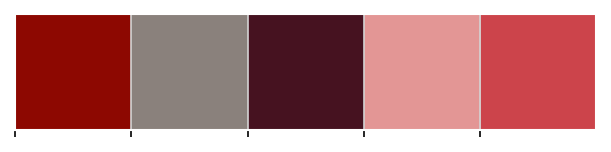

In [51]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Utils.
from src.eda_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

In [53]:
parquet_file_path = "C:\\Users\\raoha\\quant\\CREDIT RISK MODELING\\clean_loan_data.parquet"
df = pd.read_parquet(parquet_file_path)

In [55]:
df.head()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d                                        loan_status             purpose addr_state        dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee   recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor
0      25000        25000    36     11.89   829.099976     B        B4           0           RENT     85000.0            Verified 2009-08-01                                         Fully Paid  debt_consolidation         CA  19.480000            0               0                     NaN        10        0      28854   52.099998         42                   f        0.0  29324.320312     25000.000000    4324.319824            0.000000     0.000000                 0.000000      7392.080078                         0.0               0           NaN          NaN               NaN                          281        1       0.000000                  0.000000
1       1000         1000    36     16.08    35.200001     F        F2           0           RENT     30000.0        Not Verified 2008-07-01  Does not meet the credit policy. Status:Fully ...  debt_consolidation         IL  23.840000            0               1                     NaN         9        0      10125   90.400002         15                   f        0.0   1207.760010       999.989990     207.770004            0.000000     0.000000                 0.000000       538.969971                         0.0               0           NaN          NaN               NaN                          192        1       0.000000                  0.000010
2       7000         7000    36     10.71   228.220001     B        B5           0           RENT     65000.0        Not Verified 2008-05-01                                         Fully Paid         credit_card         NY  14.290000            0               0                     NaN         7        0      33623   76.699997          7                   f        0.0   8215.450195      7000.000000    1215.449951            0.000000     0.000000                 0.000000       228.479996                         0.0               0           NaN          NaN               NaN                          202        1       0.000000                  0.000000
3       7000         7000    36     16.08   246.380005     F        F2          10       MORTGAGE    189500.0            Verified 2008-04-01  Does not meet the credit policy. Status:Charge...  debt_consolidation         CA  22.469999            0               4                     0.0        16        0     150971   92.300003         31                   f        0.0   1231.900024       783.460022     448.190002            0.000000     0.250000                 0.045000       246.380005                         0.0               0           NaN          NaN               NaN                          347        0       0.000036                  0.888077
4      25000        25000    36     16.99   891.200012     D        D3           1           RENT     70000.0            Verified 2014-08-01                                        Charged Off  debt_consolidation         NY  10.500000            0               0                    41.0        10        0      19878   66.300003         17                   f        0.0   6073.100098      1634.650024    1038.949951           44.560001  3354.939941               603.889221       935.760010                         0.0               0           0.0      34561.0           30000.0                          206        0       0.134198                  0.934614

In [57]:
df.tail()

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d loan_status             purpose addr_state        dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status     out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor
466280       4000         4000    36      8.19   125.699997     A        A5           0       MORTGAGE     24000.0        Not Verified 2014-12-01     Current    home_improvement         SD  10.000000            0               0                     NaN         9        3       7245   32.099998         13                   f   2773.850098   1505.670044      1226.150024     279.519989                 0.0         0.0                      0.0       125.699997                         0.0               0         652.0      62585.0           22600.0                          331        1            0.0                  0.693462
466281      12000        12000    36     11.44   395.369995     B        B4           3           RENT     68000.0        Not Verified 2014-12-01  Fully Paid  debt_consolidation         OR  12.970000            1               0                     9.0         6        0       6989   42.400002         21                   f      0.000000  13100.910156     12000.000000    1100.910034                 0.0         0.0                      0.0      9158.650391                         0.0               0        2867.0       6989.0           17400.0                          221        1            0.0                  0.000000
466282       2000         2000    36     15.99    70.309998     D        D2           7           RENT     37000.0        Not Verified 2014-12-01     Current               other         AZ  16.190001            2               1                     5.0         9        0       4533   20.100000         22                   f   1435.930054    839.280029       564.070007     275.209991                 0.0         0.0                      0.0        70.309998                         0.0               0           0.0      19342.0           22500.0                          283        1            0.0                  0.717965
466283      16000        16000    60     11.44   351.399994     B        B4           6            OWN    109777.0            Verified 2014-12-01     Current  debt_consolidation         VA  11.630000            1               0                    12.0         7        0       7253   60.400002         14                   w  13484.410156   4191.379883      2515.590088    1675.790039                 0.0         0.0                      0.0       351.399994                         0.0               0           0.0     373743.0           12000.0                          166        1            0.0                  0.842776
466284      15000        15000    60     12.39   336.640015     C        C1          10           RENT     78000.0     Source Verified 2014-12-01     Current  debt_consolidation         VA  12.030000            0               0                     NaN         6        0     138008   29.000000         17                   w  12690.599609   4028.000000      2309.399902    1718.599976                 0.0         0.0                      0.0       336.640015                         0.0               0           0.0     149140.0          184500.0                          275        1            0.0                  0.846040

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 42 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_amnt                    int32         
 1   funded_amnt                  int32         
 2   term                         int8          
 3   int_rate                     float32       
 4   installment                  float32       
 5   grade                        category      
 6   sub_grade                    category      
 7   emp_length                   int16         
 8   home_ownership               category      
 9   annual_inc                   float32       
 10  verification_status          category      
 11  issue_d                      datetime64[ns]
 12  loan_status                  category      
 13  purpose                      category      
 14  addr_state                   category      
 15  dti                          float32       
 16  delinq_

In [63]:
missing_df = df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / df.shape[0] * 100, 3)
missing_df.head(10)

count     pct
mths_since_last_delinq      250322  53.688
total_rev_hi_lim             70247  15.066
tot_cur_bal                  70247  15.066
tot_coll_amt                 70247  15.066
revol_util                     311   0.067
collections_12_mths_ex_med     116   0.025
loan_amnt                        0   0.000
total_rec_late_fee               0   0.000
initial_list_status              0   0.000
out_prncp                        0   0.000

In [65]:
# Out-of-time split. 80% training, 20% testing.
train, test = np.split(df, [int(.80 * len(df))])
train['set'] = 'train'
test['set'] = 'test'

In [67]:
# Observe train and test default rates.
print(f"Train default rate: {train['default'].value_counts(normalize=True)}.")
print()
print(f"Test default rate: {test['default'].value_counts(normalize=True)}.")

Train default rate: default
1    0.880151
0    0.119849
Name: proportion, dtype: float64.

Test default rate: default
1    0.932859
0    0.067141
Name: proportion, dtype: float64.


In [69]:




# Assess train and test sets dimensions.
print(f'Train set has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test set has {test.shape[0]} rows and {test.shape[1]} columns.')

Train set has 373004 rows and 43 columns.
Test set has 93252 rows and 43 columns.


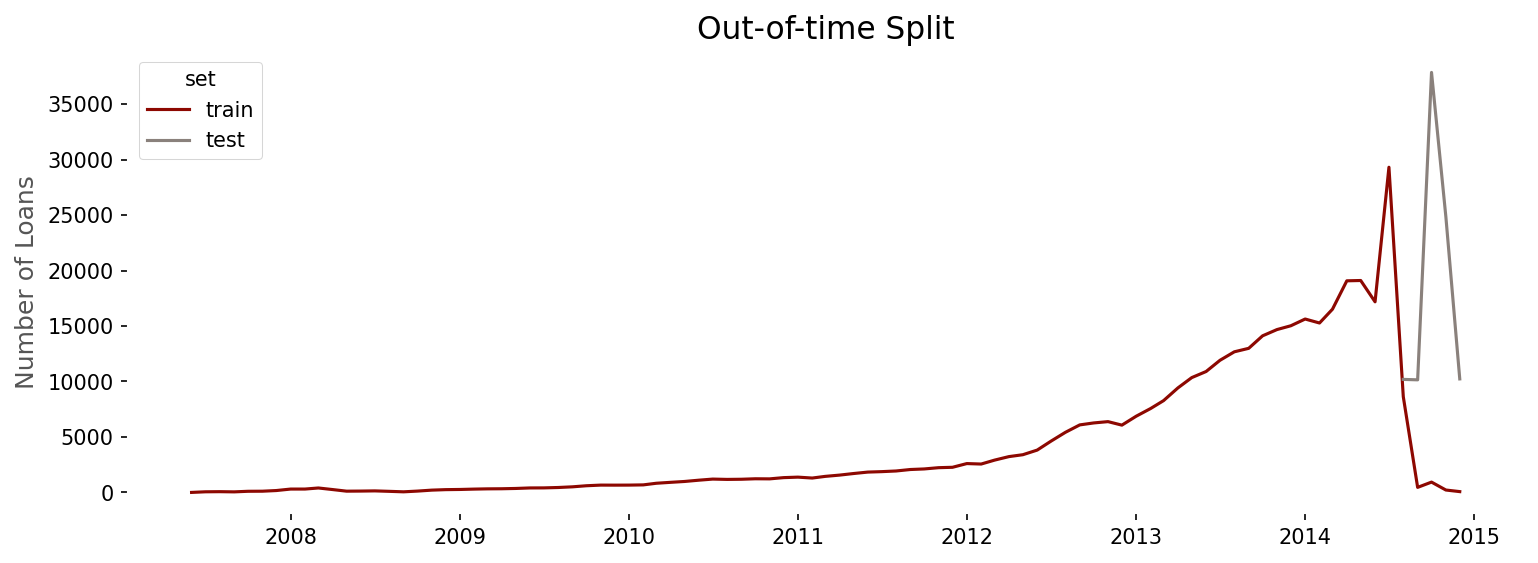

In [71]:
# Plot the out-of-time split.
train_test = pd.concat([train, test])
train_test = train_test.groupby(['issue_d', 'set'])['default'].count().reset_index().rename(columns={'default': 'loans'})

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Out-of-time Split', fontsize=15)
sns.lineplot(train_test, x='issue_d', y='loans', hue='set', ax=ax)
plt.xlabel('')
plt.ylabel('Number of Loans')
plt.grid(False)
plt.show()

In [72]:
train.describe().T

count                           mean                  min                  25%                  50%                  75%                  max           std
loan_amnt                    373004.0                    14187.79363                500.0               8000.0              12000.0              20000.0              35000.0   8225.843831
funded_amnt                  373004.0                   14155.951612                500.0               8000.0              12000.0              20000.0              35000.0   8210.035411
term                         373004.0                      42.355878                 36.0                 36.0                 36.0                 60.0                 60.0     10.589815
int_rate                     373004.0                        13.9716                 5.42                10.99                13.98            16.780001            26.059999      4.341332
installment                  373004.0                     431.151672                15.67           255.330002           380.559998           565.219971           1409.98999    243.260803
emp_length                   373004.0                       5.716738                  0.0                  2.0                  6.0                 10.0                 10.0      3.736419
annual_inc                   373004.0                     72970.6875               1896.0              45000.0              62435.0              88000.0            7446395.0  54009.789062
issue_d                        373004  2013-05-13 17:31:12.250163200  2007-06-01 00:00:00  2012-12-01 00:00:00  2013-09-01 00:00:00  2014-04-01 00:00:00  2014-12-01 00:00:00           NaN
dti                          373004.0                      16.823301                  0.0                11.14            16.559999                22.32            39.950001       7.60903
delinq_2yrs                  373004.0                       0.269453                  0.0                  0.0                  0.0                  0.0                 29.0      0.766153
inq_last_6mths               373004.0                       0.853149                  0.0                  0.0                  0.0                  1.0                 33.0      1.129467
mths_since_last_delinq       167864.0                      34.273674                  0.0                 16.0                 31.0                 50.0                188.0     21.799265
open_acc                     373004.0                      11.029799                  0.0                  8.0                 10.0                 14.0                 76.0      4.849608
pub_rec                      373004.0                       0.146578                  0.0                  0.0                  0.0                  0.0                 63.0      0.488131
revol_bal                    373004.0                   15907.546305                  0.0               6418.0              11731.0              20109.0            2568995.0  19532.250563
revol_util                   372747.0                      56.362419                  0.0            39.599998                 58.0                 75.0           892.299988     23.789276
total_acc                    373004.0                      24.828702                  1.0                 16.0                 23.0                 32.0                118.0     11.427309
out_prncp                    373004.0                    3401.784424                  0.0                  0.0                  0.0          4951.899902         31681.539062   5601.688477
total_pymnt                  373004.0                   12482.793945                  0.0          6283.367554          10551.14502         16578.676758         57777.578125   8471.147461
total_rec_prncp              373004.0                    9625.954102                  0.0          4380.477661               7800.0          12874.36499          35000.03125   7142.544434
total_rec_int                373004.0                    2756.856689                

In [73]:
# Assess which are the numerical and categorical features.
numerical_features = train.select_dtypes('number').columns.tolist()
numerical_features.remove('default')
categorical_features = train.select_dtypes('category').columns.tolist()
categorical_features.remove('loan_status')
target = 'default'
print(f'There are {len(numerical_features)} numerical variables in the data. They are: {numerical_features}.')
print(f'There are {len(categorical_features)} categorical variables in the data. They are: {categorical_features}.')

There are 32 numerical variables in the data. They are: ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'mths_since_earliest_cr_line', 'recovery_rate', 'credit_conversion_factor'].
There are 7 categorical variables in the data. They are: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status'].


In [75]:
# Assess categorical features cardinality.
for feature in categorical_features:
    print(f'{feature} - cardinality = {df[feature].nunique()}')
    print()
    print(df[feature].unique())
    print('-' * 150)

grade - cardinality = 7

['B', 'F', 'D', 'C', 'A', 'E', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
------------------------------------------------------------------------------------------------------------------------------------------------------
sub_grade - cardinality = 35

['B4', 'F2', 'B5', 'D3', 'C2', ..., 'G4', 'E1', 'G3', 'G5', 'G1']
Length: 35
Categories (35, object): ['A1', 'A2', 'A3', 'A4', ..., 'G2', 'G3', 'G4', 'G5']
------------------------------------------------------------------------------------------------------------------------------------------------------
home_ownership - cardinality = 6

['RENT', 'MORTGAGE', 'OWN', 'NONE', 'OTHER', 'ANY']
Categories (6, object): ['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']
------------------------------------------------------------------------------------------------------------------------------------------------------
verification_status - cardinality = 3

['Verified', 'Not Verified', 'Source Ve

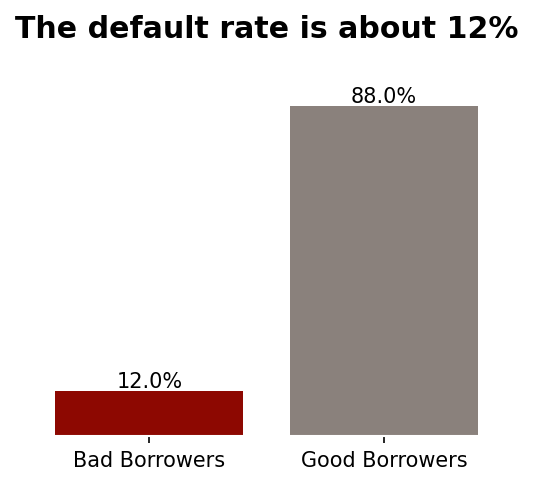

In [79]:
fig, ax = plt.subplots(figsize=(4, 3))

default_grouped = train.groupby(['default'])[['default']].count().rename(columns={'default': 'count'}).reset_index()
default_grouped['pct'] = default_grouped['count'] / default_grouped['count'].sum() * 100

bars = ax.bar(x=default_grouped['default'], height=default_grouped['pct'], color=instyle_palette, width=0.8)
for bar, pct in zip(bars, default_grouped['pct']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')
ax.set_title('The default rate is about 12%', pad=25, fontweight='bold')
ax.set_xticks(ticks=default_grouped['default'], labels=['Bad Borrowers', 'Good Borrowers'])
ax.yaxis.set_visible(False)
ax.grid(False)

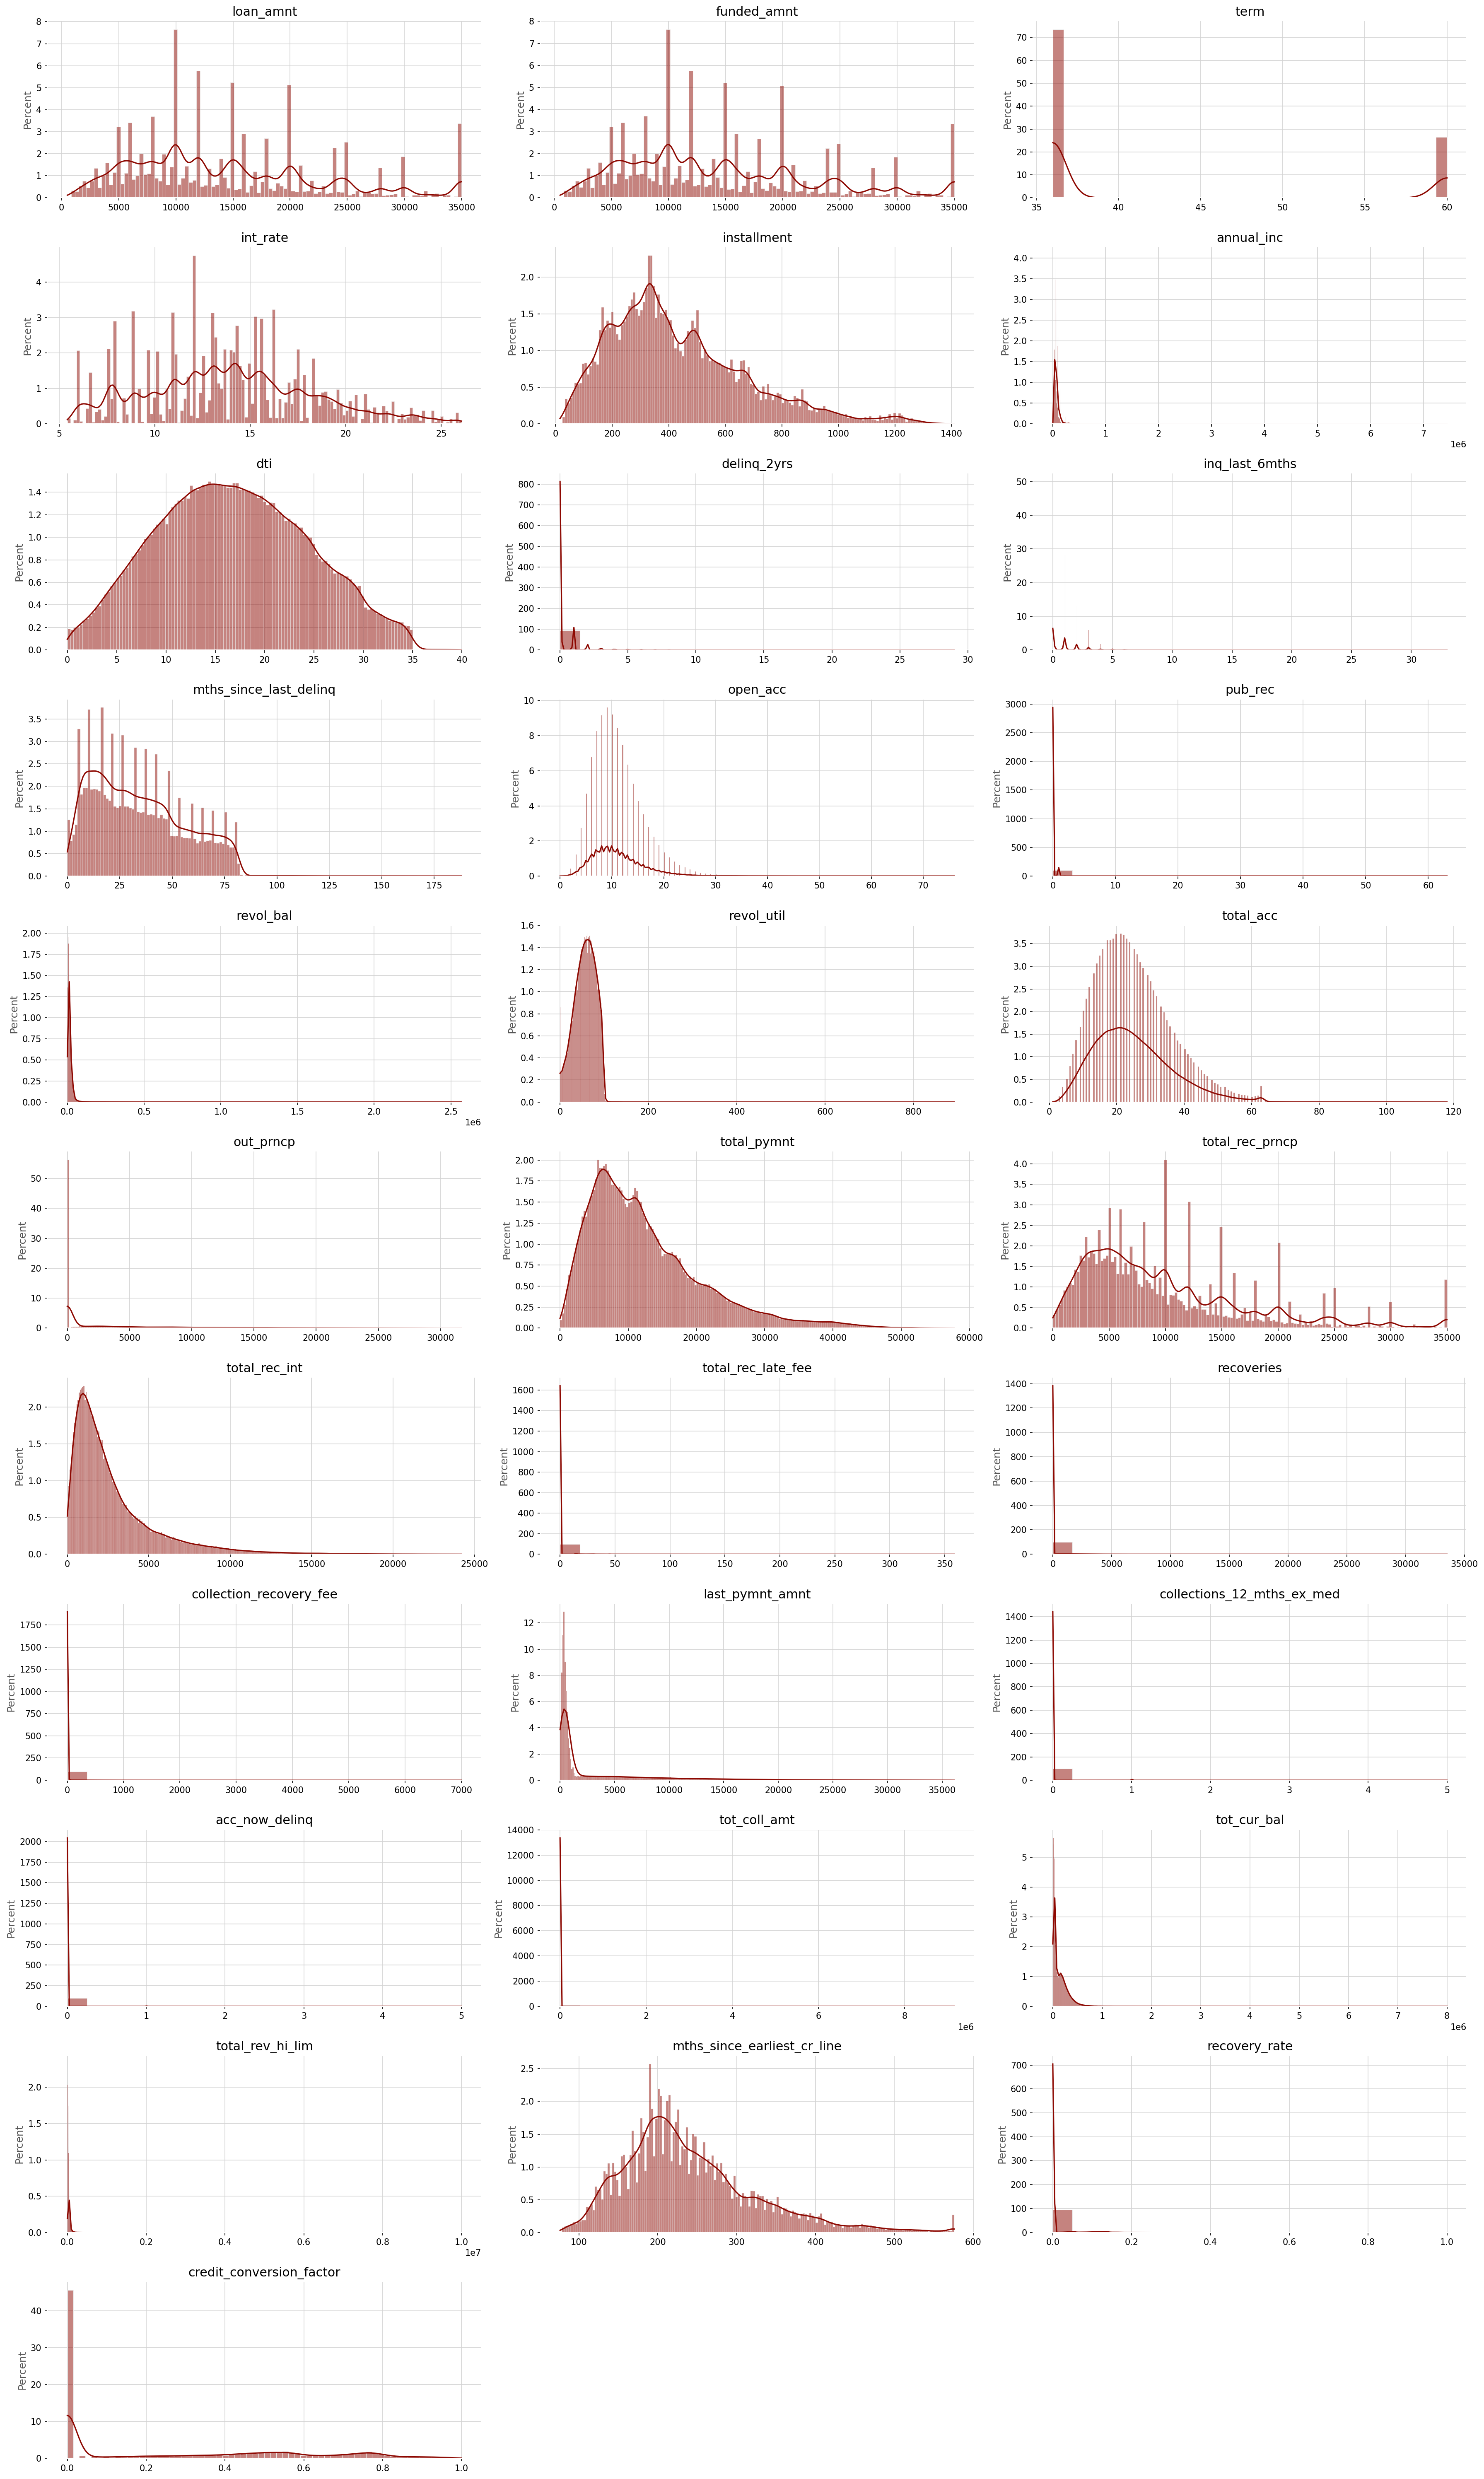

In [81]:
# Separate numerical features that can be better visualized in a countplot from numerical features to be visualized in a histogram.
histogram_features = [x for x in numerical_features if x not in set(['emp_length'])]

# Plot numerical features distributions.
univariate_analysis_plots(train, histogram_features, kde=True, figsize=(24, 40))

In [82]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=histogram_features)

There are 485889 outliers in the dataset.

Number (percentage) of outliers per feature: 

loan_amnt: 0 (0.0)%
funded_amnt: 0 (0.0)%
term: 0 (0.0)%
int_rate: 2081 (0.56)%
installment: 9207 (2.47)%
annual_inc: 15814 (4.24)%
dti: 24 (0.01)%
delinq_2yrs: 64005 (17.16)%
inq_last_6mths: 32692 (8.76)%
mths_since_last_delinq: 66 (0.02)%
open_acc: 7088 (1.9)%
pub_rec: 45658 (12.24)%
revol_bal: 17213 (4.61)%
revol_util: 10 (0.0)%
total_acc: 4933 (1.32)%
out_prncp: 33778 (9.06)%
total_pymnt: 13301 (3.57)%
total_rec_prncp: 13965 (3.74)%
total_rec_int: 25279 (6.78)%
total_rec_late_fee: 9389 (2.52)%
recoveries: 23246 (6.23)%
collection_recovery_fee: 22086 (5.92)%
last_pymnt_amnt: 46358 (12.43)%
collections_12_mths_ex_med: 2454 (0.66)%
acc_now_delinq: 1185 (0.32)%
tot_coll_amt: 35536 (9.53)%
tot_cur_bal: 9083 (2.44)%
total_rev_hi_lim: 15965 (4.28)%
mths_since_earliest_cr_line: 12227 (3.28)%
recovery_rate: 23246 (6.23)%
credit_conversion_factor: 0 (0.0)%


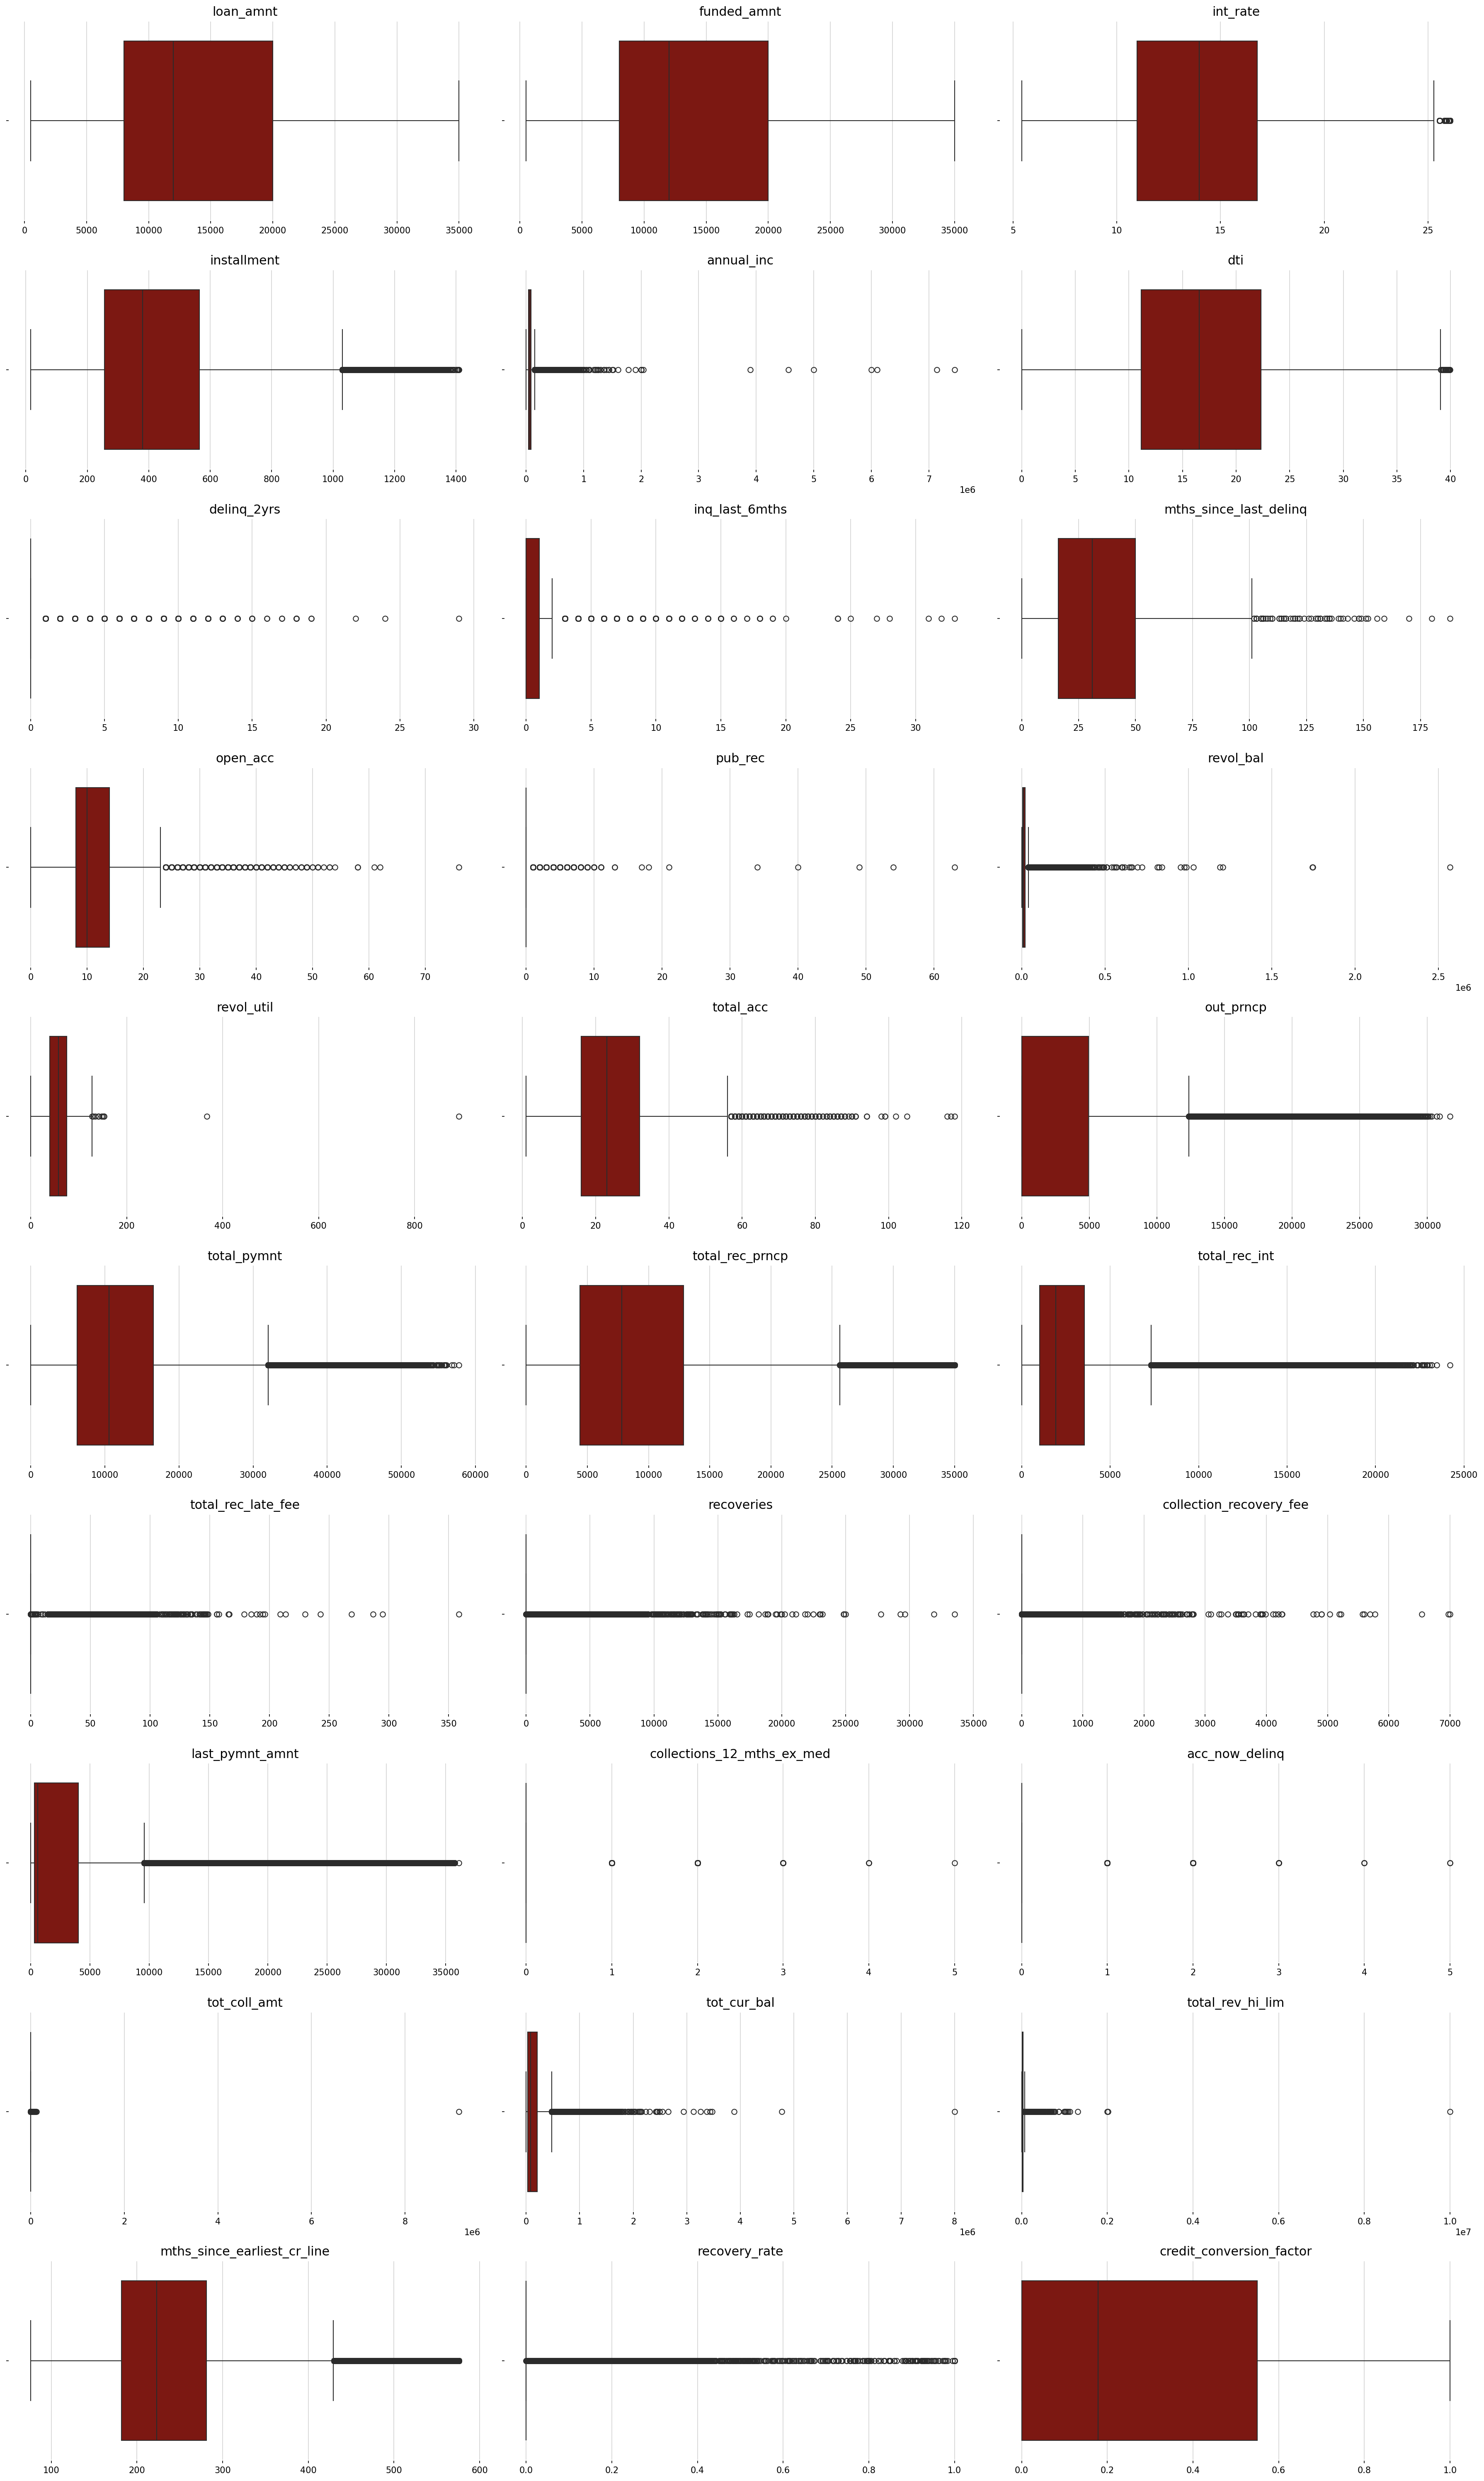

In [85]:
outliers_features = [x for x in numerical_features if x not in set(['term', 'emp_length'])]
univariate_analysis_plots(data=train, features=outliers_features, outliers=True, figsize=(24, 40))

In [87]:
# Investigate outliers in annual income.
train.loc[train['annual_inc'] > 3e6]

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d loan_status             purpose addr_state   dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status     out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor    set
11855        5000         5000    36     12.73   167.839996     C        C1          10       MORTGAGE   6000000.0     Source Verified 2010-05-01  Fully Paid    home_improvement         CA  0.01            0               1                    80.0         2        0       1434   37.700001         10                   f      0.000000   5511.859863      5000.000000     511.859985                 0.0         0.0                      0.0      3845.250000                         0.0               0           NaN          NaN               NaN                          199        1            0.0                  0.000000  train
12351       25000        15500    60     10.62   334.079987     B        B3           3       MORTGAGE   3900000.0        Not Verified 2010-06-01  Fully Paid    home_improvement         NM  0.20            0               3                     NaN        12        0       3270   10.200000         32                   f      0.000000  20037.019531     15500.000000    4537.020020                 0.0         0.0                      0.0       353.140015                         0.0               0           NaN          NaN               NaN                          215        1            0.0                  0.000000  train
95050       35000        35000    36     15.31  1218.609985     C        C2          10       MORTGAGE   5000000.0            Verified 2012-12-01  Fully Paid         credit_card         NY  2.36            1               2                    12.0        13        0     975800    0.000000         36                   w      0.000000  43114.628906     35000.000000    8114.629883                 0.0         0.0                      0.0        58.029999                         0.0               0           0.0    8000078.0          988000.0                          279        1            0.0                  0.000000  train
97298       14825        14825    36     13.11   500.299988     B        B4          10       MORTGAGE   7141778.0     Source Verified 2012-12-01  Fully Paid  debt_consolidation         GA  0.25            0               2                    26.0        17        0      11351   70.900002         31                   w      0.000000  17229.330078     14825.000000    2404.330078                 0.0         0.0                      0.0      8223.929688                         0.0               0           0.0      69548.0           16000.0                          256        1            0.0                  0.000000  train
106294      30000        30000    36     12.12   998.150024     B        B3          10       MORTGAGE   6100000.0            Verified 2013-02-01  Fully Paid  debt_consolidation         MD  0.22            0               0                     NaN         8        0      15219   94.500000         19                   w      0.000000  34146.179688     30000.000000    4146.180176                 0.0         0.0                      0.0     18175.779297                         0.0               0           0.0     329254.0           16100.0                          164        1            0.0                  0.000000  train
248207      20000        20000    36      7.62   623.229980     A        A3           5           RENT   7446395.0     Source Verified 2014-02-01     Current  debt_consolidation         NY  0.13            0               0     

In [89]:
# Investigate outliers in total_rev_hi_lim 
train.loc[train['total_rev_hi_lim'] > 2e6]

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d loan_status             purpose addr_state    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status    out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor    set
96097       35000        35000    36     11.14  1148.180054     B        B2          10       MORTGAGE    400000.0            Verified 2013-01-01  Fully Paid  debt_consolidation         FL  33.48            0               4                     NaN        28        0    1743266        29.5         59                   f     0.000000  35951.800781     35000.000000     951.799988                 0.0         0.0                      0.0     33656.699219                         0.0               0           0.0    3471522.0         2013133.0                          394        1            0.0                  0.000000  train
144326      28000        28000    36      8.90   889.090027     A        A5           1       MORTGAGE   1000000.0            Verified 2013-06-01     Current         credit_card         CT  12.54            0               2                    39.0        13        0    2568995        20.4         28                   f  4351.810059  27557.230469     23648.189453    3909.040039                 0.0         0.0                      0.0       889.090027                         0.0               0           0.0    3881449.0         9999999.0                          371        1            0.0                  0.155422  train

In [91]:
# Investigate outliers in revol_bal.
train.loc[train['revol_bal'] > 1.5e6]

loan_amnt  funded_amnt  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d  loan_status             purpose addr_state        dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status    out_prncp   total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  mths_since_earliest_cr_line  default  recovery_rate  credit_conversion_factor    set
96097       35000        35000    36     11.14  1148.180054     B        B2          10       MORTGAGE    400000.0            Verified 2013-01-01   Fully Paid  debt_consolidation         FL  33.480000            0               4                     NaN        28        0    1743266   29.500000         59                   f     0.000000  35951.800781     35000.000000     951.799988                 0.0         0.0                      0.0     33656.699219                         0.0               0           0.0    3471522.0         2013133.0                          394        1            0.0                  0.000000  train
144326      28000        28000    36      8.90   889.090027     A        A5           1       MORTGAGE   1000000.0            Verified 2013-06-01      Current         credit_card         CT  12.540000            0               2                    39.0        13        0    2568995   20.400000         28                   f  4351.810059  27557.230469     23648.189453    3909.040039                 0.0         0.0                      0.0       889.090027                         0.0               0           0.0    3881449.0         9999999.0                          371        1            0.0                  0.155422  train
215770      35000        35000    36     14.30  1201.329956     C        C1          10       MORTGAGE    400000.0            Verified 2013-11-01  Charged Off               other         FL  32.799999            0               3                     NaN        28        0    1746716   38.599998         55                   f     0.000000  34268.398438     29874.429688    4393.970215                 0.0         0.0                      0.0      1201.329956                         0.0               0           0.0    3437283.0         1998700.0                          399        0            0.0                  0.146445  train

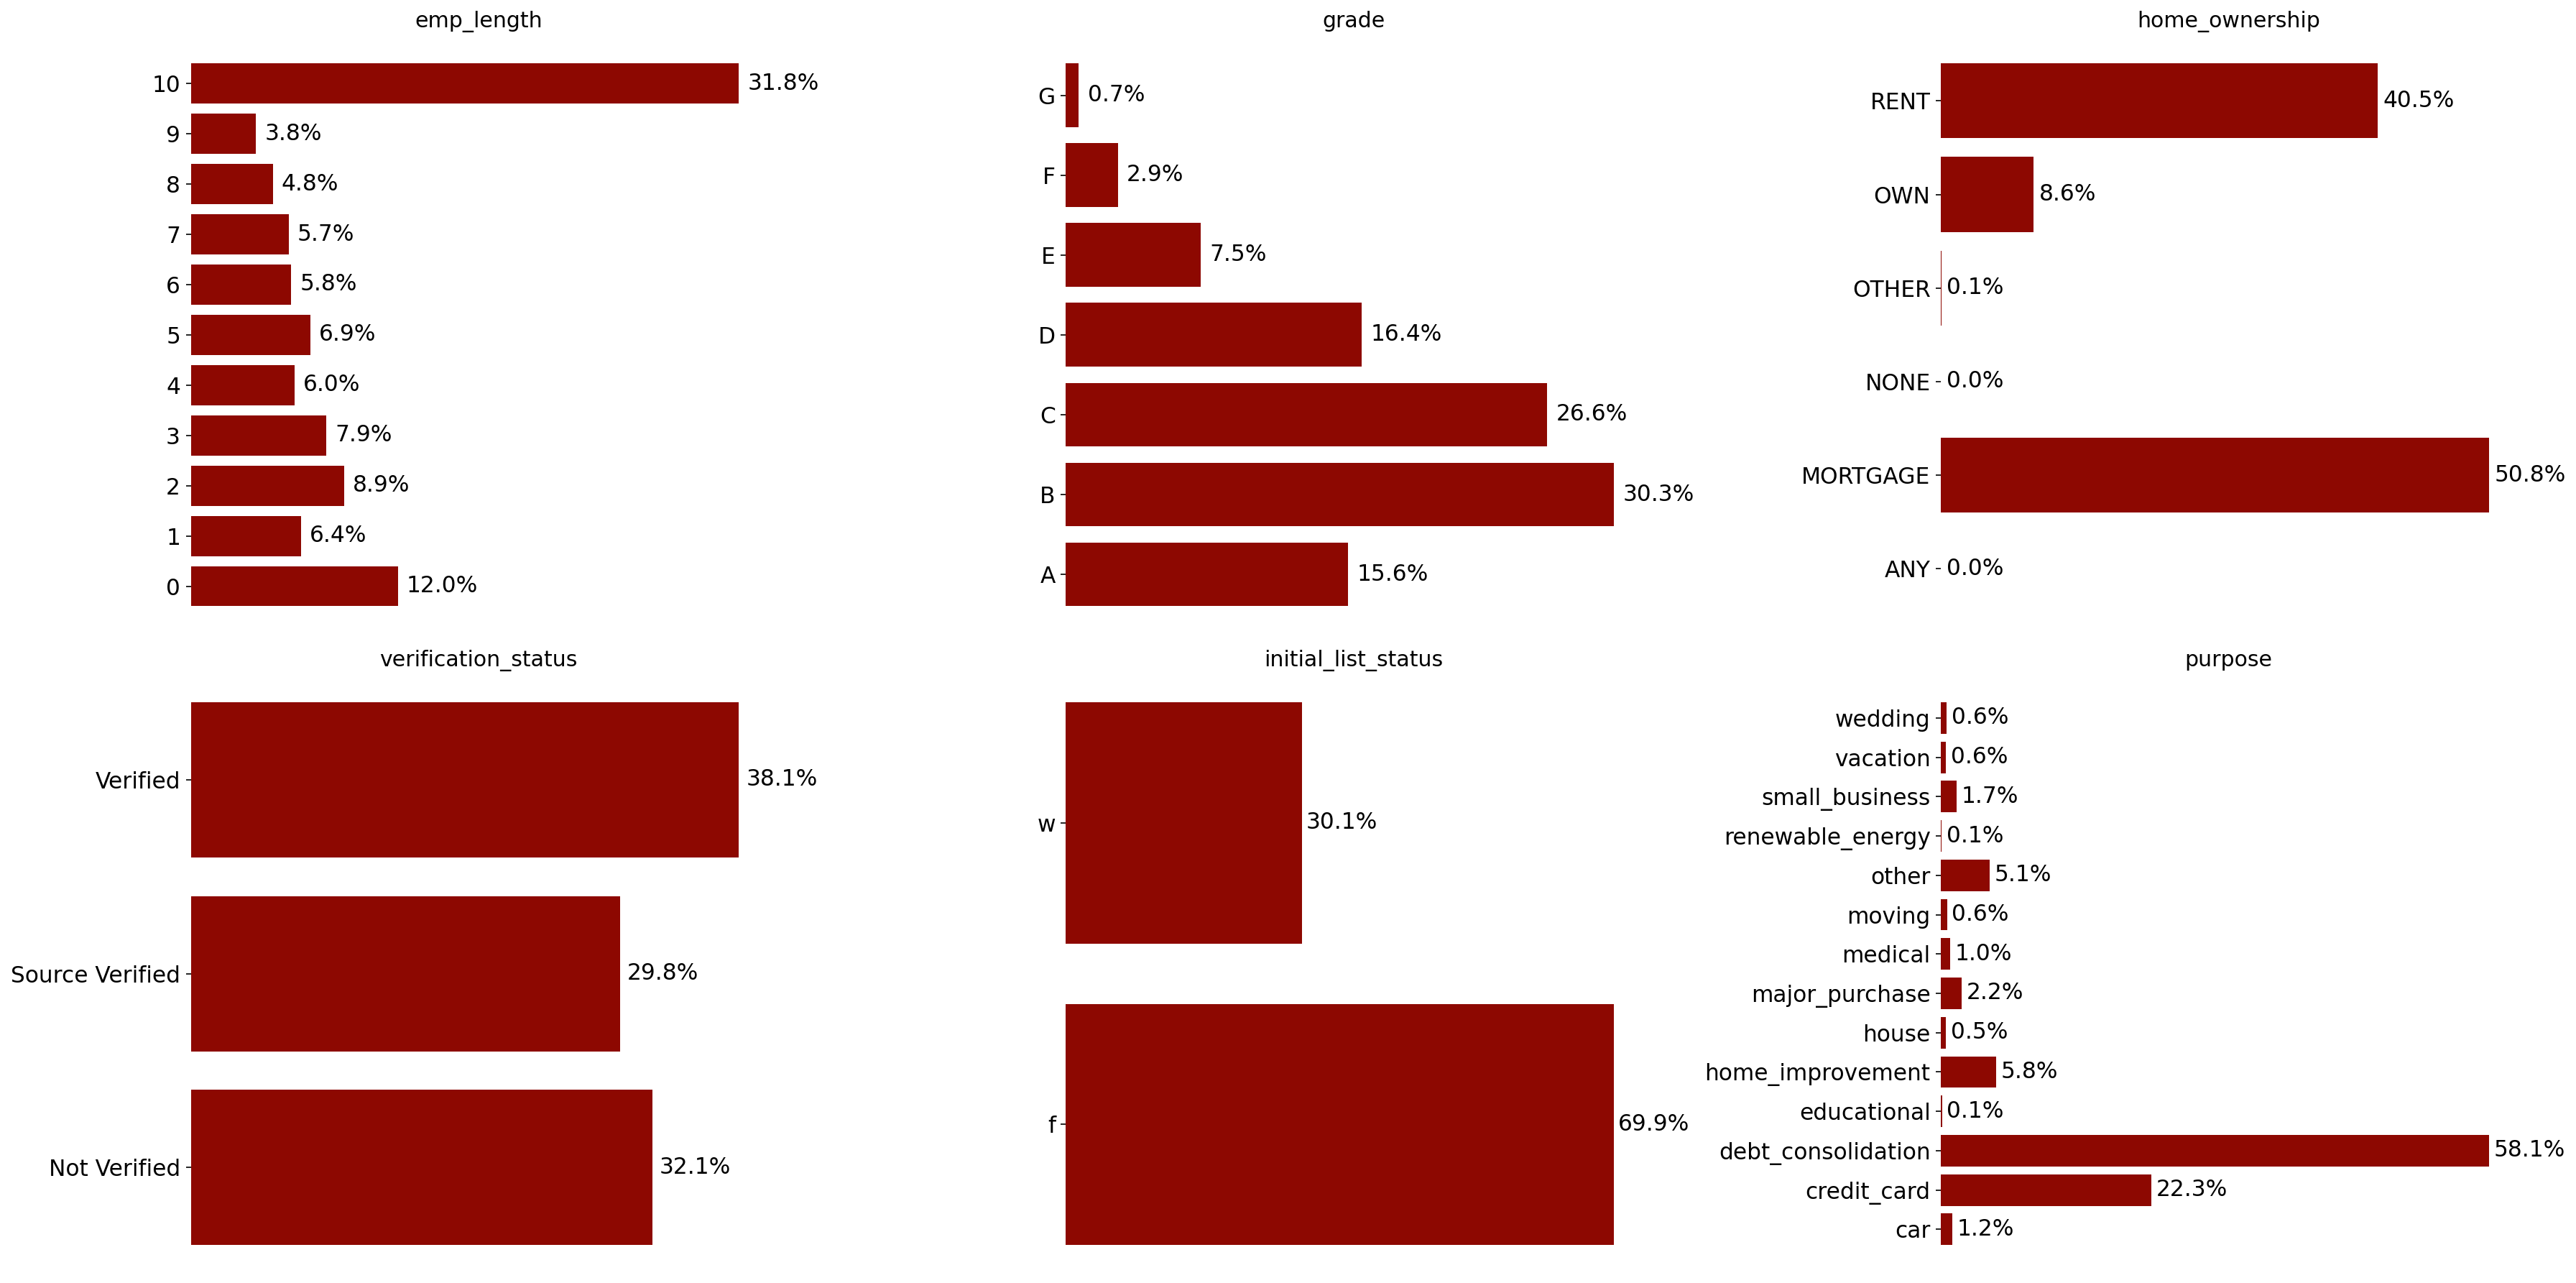

In [93]:
barplot_features = ['emp_length', 'grade', 'home_ownership', 'verification_status', 'initial_list_status', 'purpose']
univariate_analysis_plots(data=train, features=barplot_features, barplot=True, figsize=(24, 12))

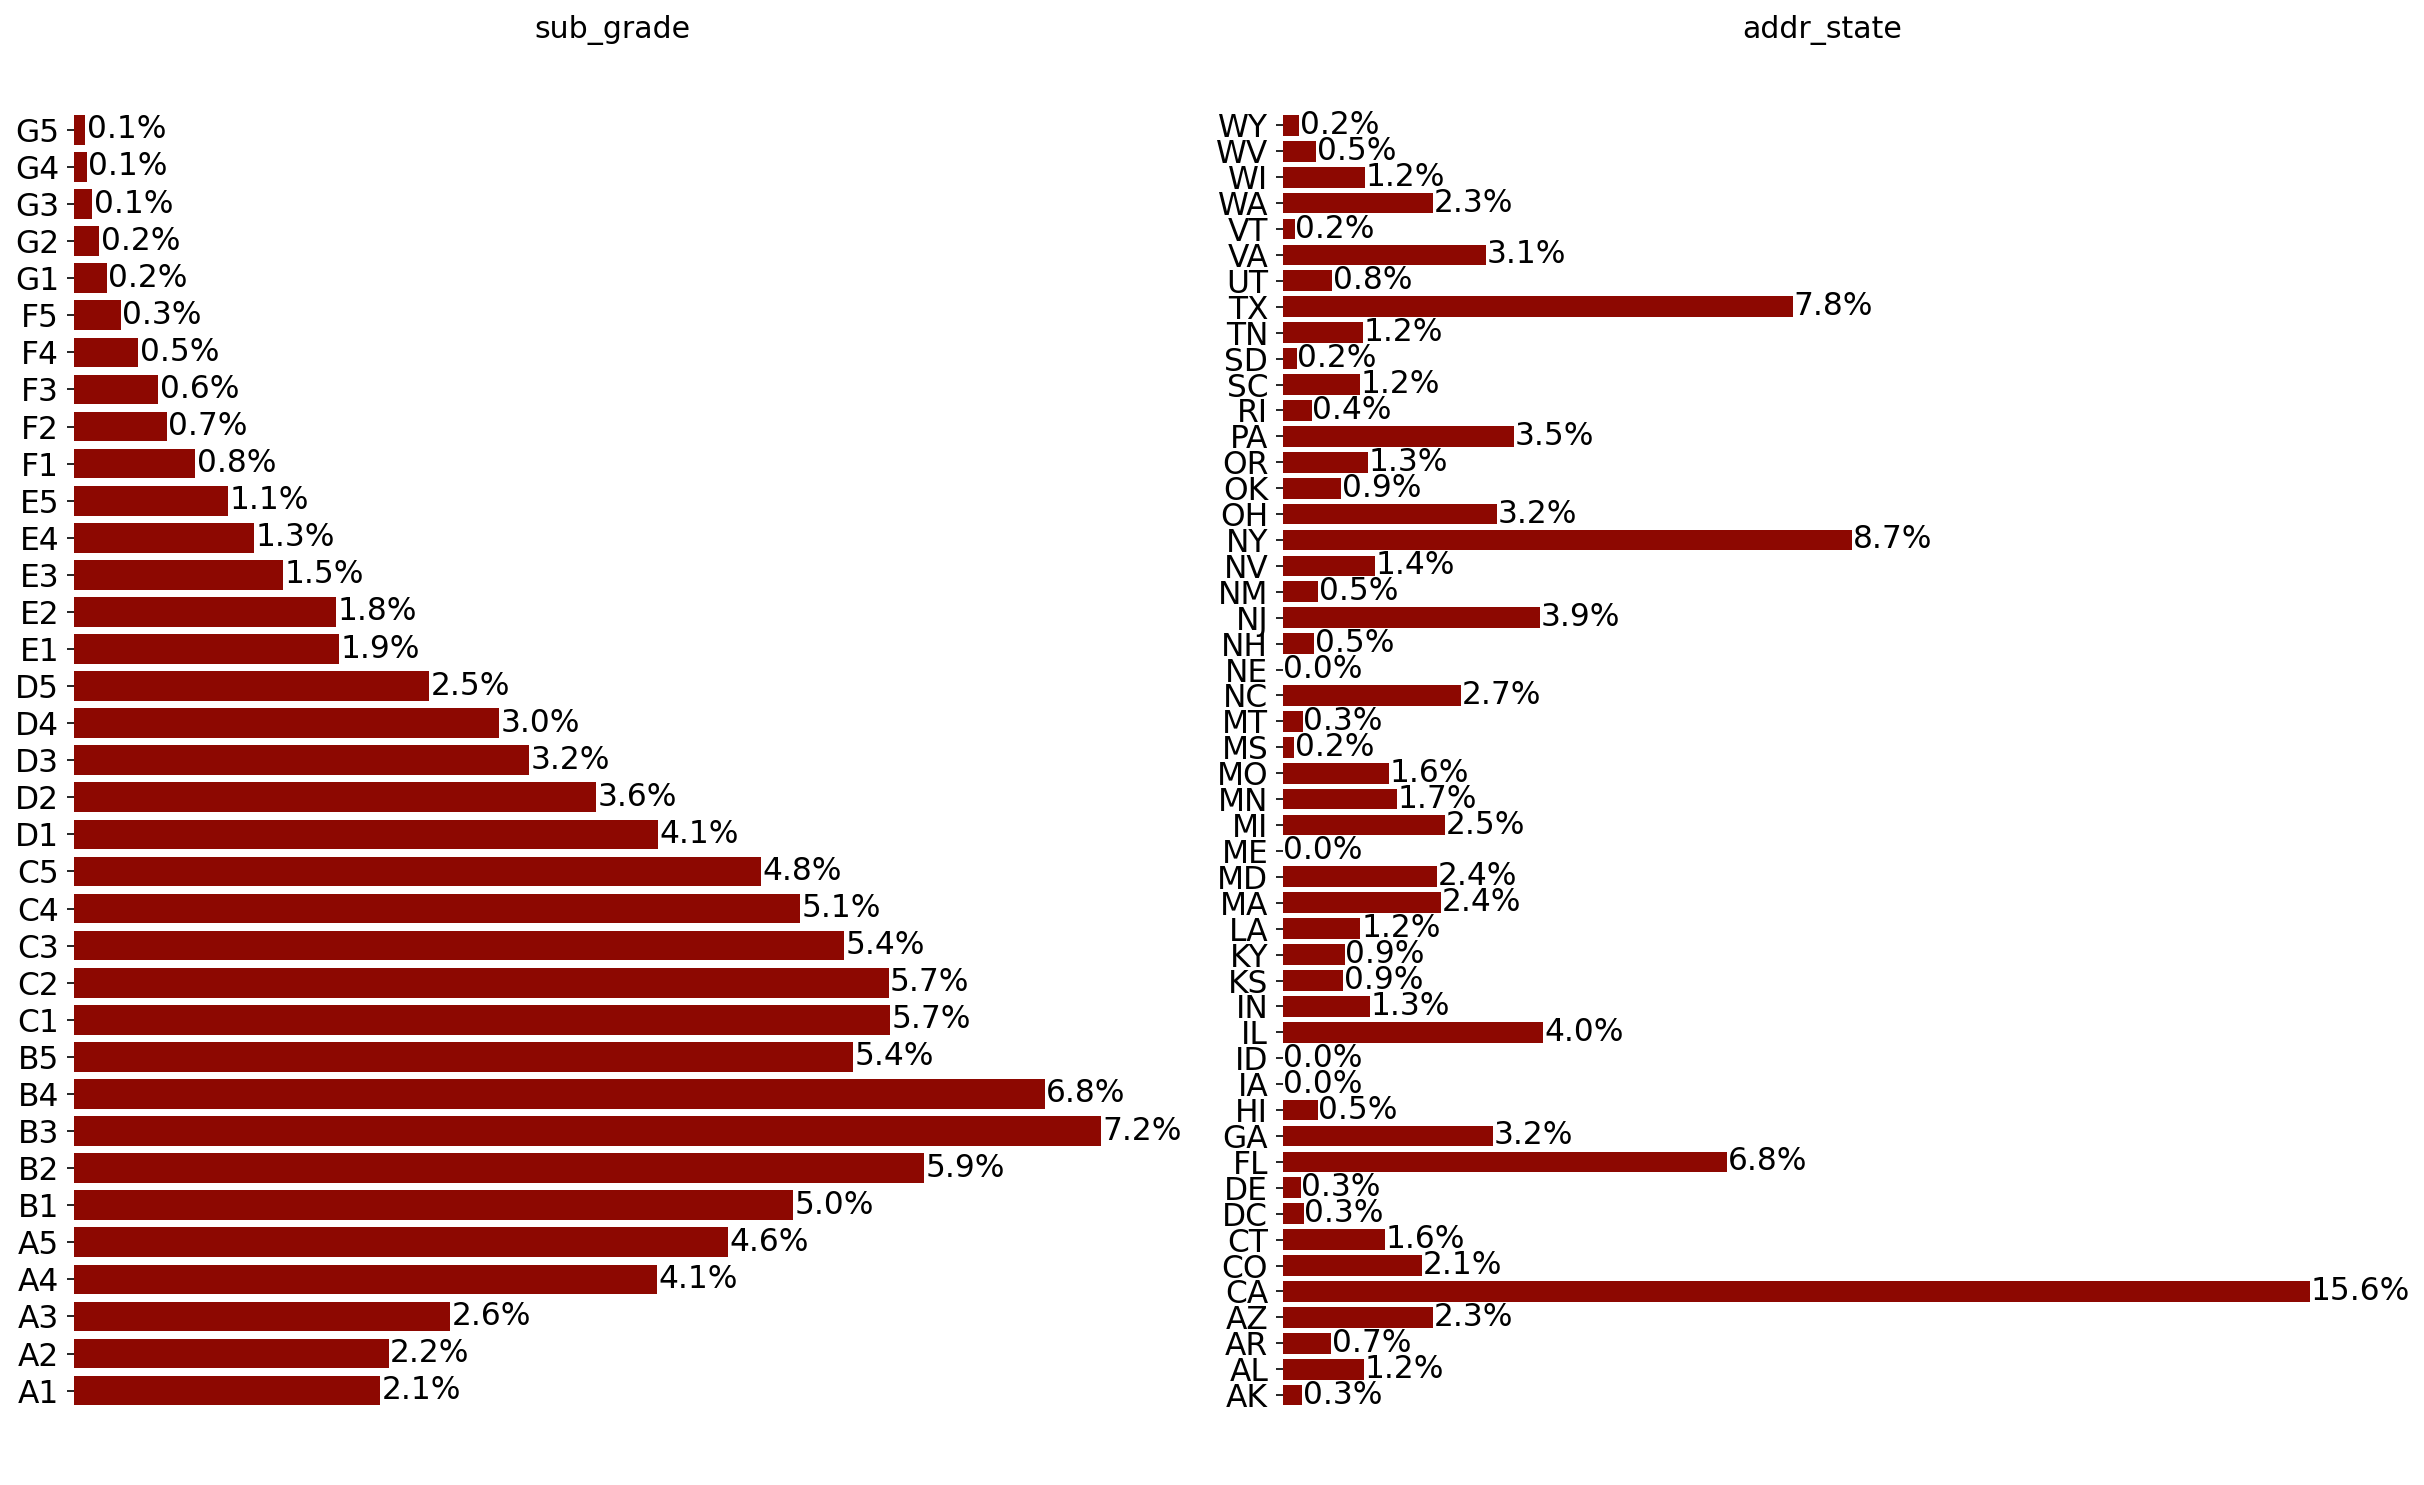

In [95]:
barplot_features = ['sub_grade', 'addr_state']
univariate_analysis_plots(data=train, features=barplot_features, barplot=True, figsize=(24, 10), text_y=0.01)

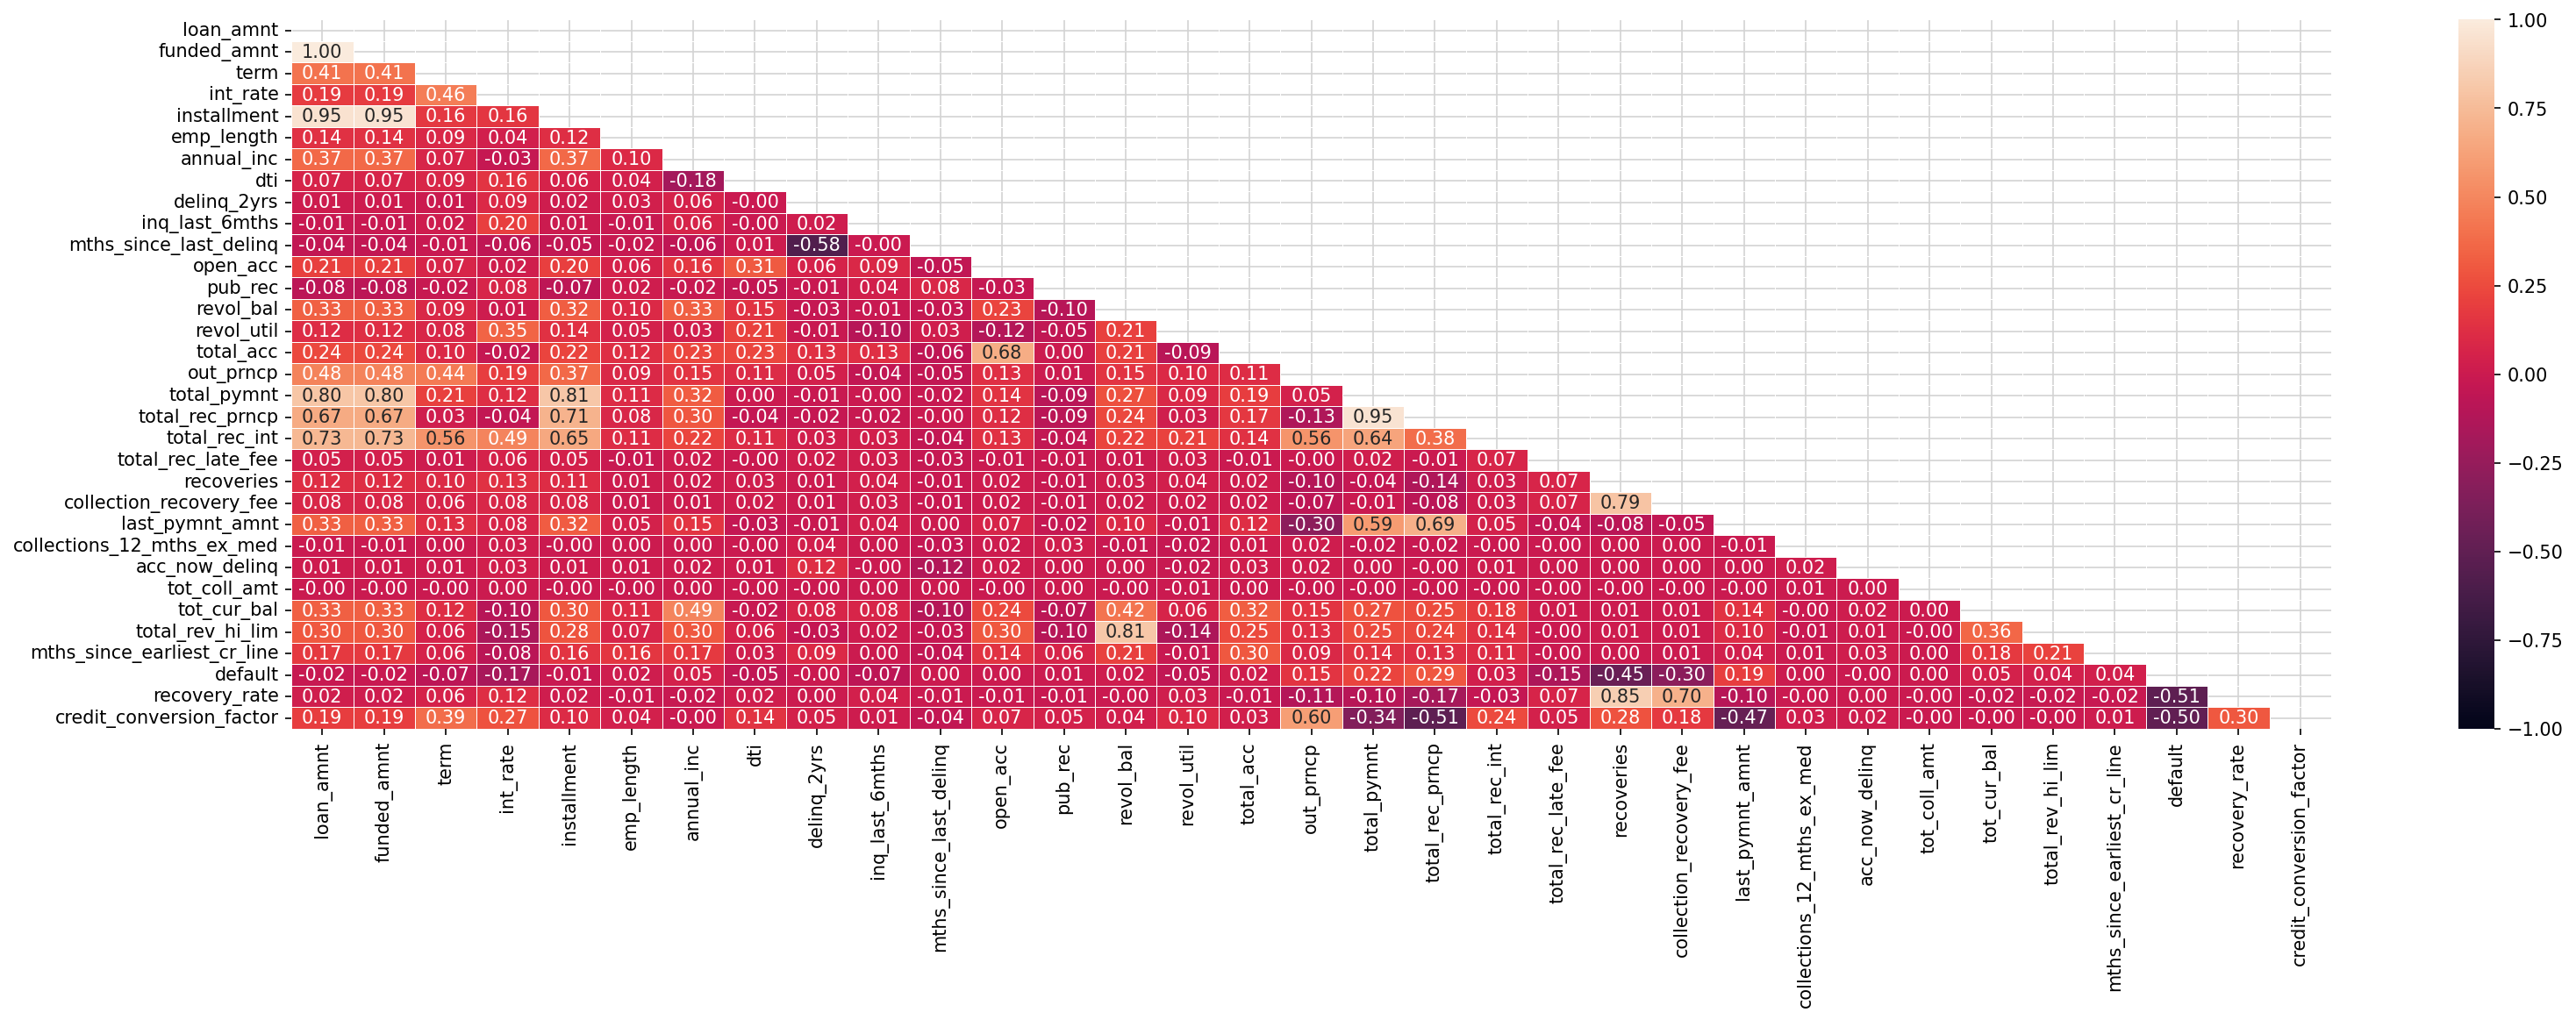

In [97]:
# Mask to remove the upper triangle.
mask = np.zeros_like(train.corr(method='pearson', numeric_only=True), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

# Correlation matrix.
corr_matrix = train.corr(method='pearson', numeric_only=True)

# Heatmap
plt.figure(figsize=(25, 7))
sns.heatmap(corr_matrix,linewidths=0.25, fmt=".2f", annot=True, vmin=-1, vmax=1, mask=mask)
plt.show()

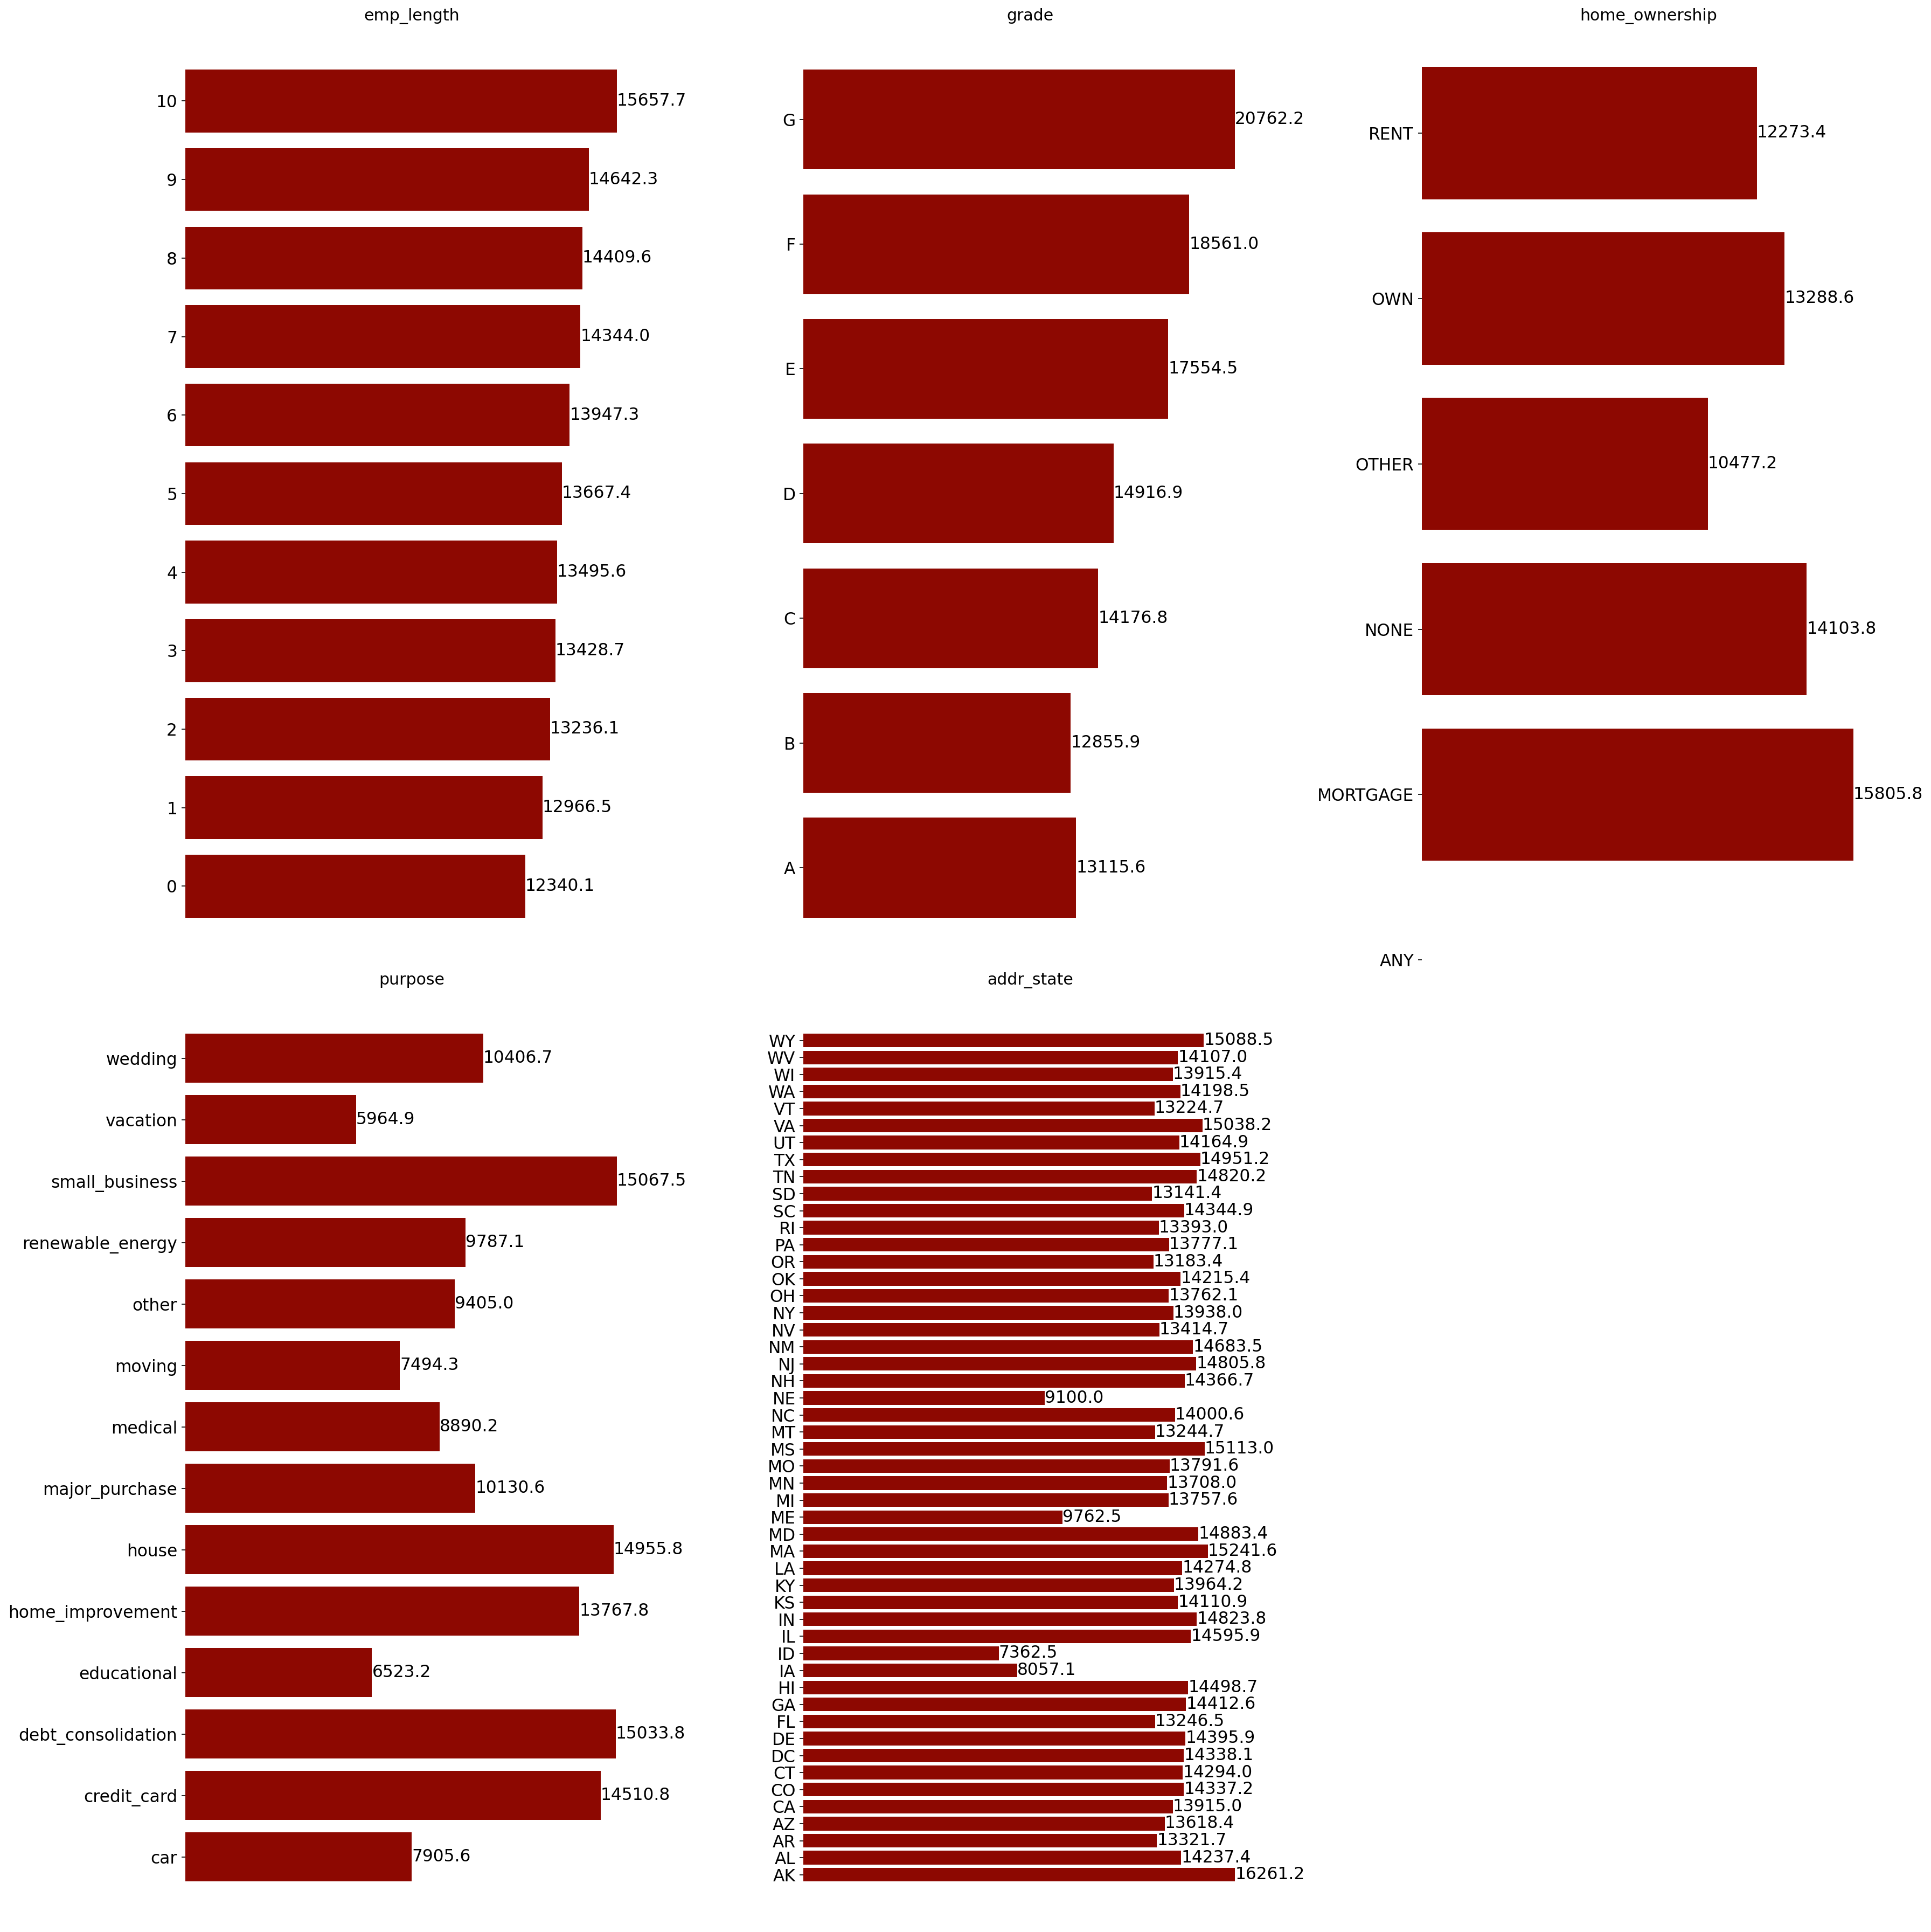

In [99]:
mean_barplot_features = ['emp_length', 'grade', 'home_ownership', 'purpose', 'addr_state']
univariate_analysis_plots(data=train, features=mean_barplot_features, 
                          barplot=True, mean='funded_amnt', figsize=(24, 24))

In [101]:
train.groupby(['term'])['funded_amnt'].mean()

term
36    12141.276046
60    19748.755593
Name: funded_amnt, dtype: float64

In [103]:
grade_df = default_analysis(train['grade'], 'grade', train, continuous=False, not_ordered=True)
grade_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)    g/b   woe    iv
grade_cat                                                                                                                        
G            2618                0.70         71.01        28.99    1859.0    759.0          0.57         1.70   2.45  -1.1  0.01
F           10700                2.87         74.64        25.36    7987.0   2713.0          2.43         6.07   2.94 -0.91  0.03
E           27880                7.47         79.07        20.93   22046.0   5834.0          6.72        13.05   3.78 -0.66  0.04
D           61044               16.37         83.27        16.73   50831.0  10213.0         15.48        22.85   4.98 -0.39  0.03
C           99372               26.64         87.30        12.70   86756.0  12616.0         26.43        28.22   6.88 -0.07  0.00
B          113166               30.34         91.21         8.79  103223.0   9943.0         31.44        22.24  10.38  0.35  0.03
A           58224               15.61         95.49         4.51   55598.0   2626.0         16.94         5.87  21.17  1.06  0.12
total      373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00      -     -  0.26

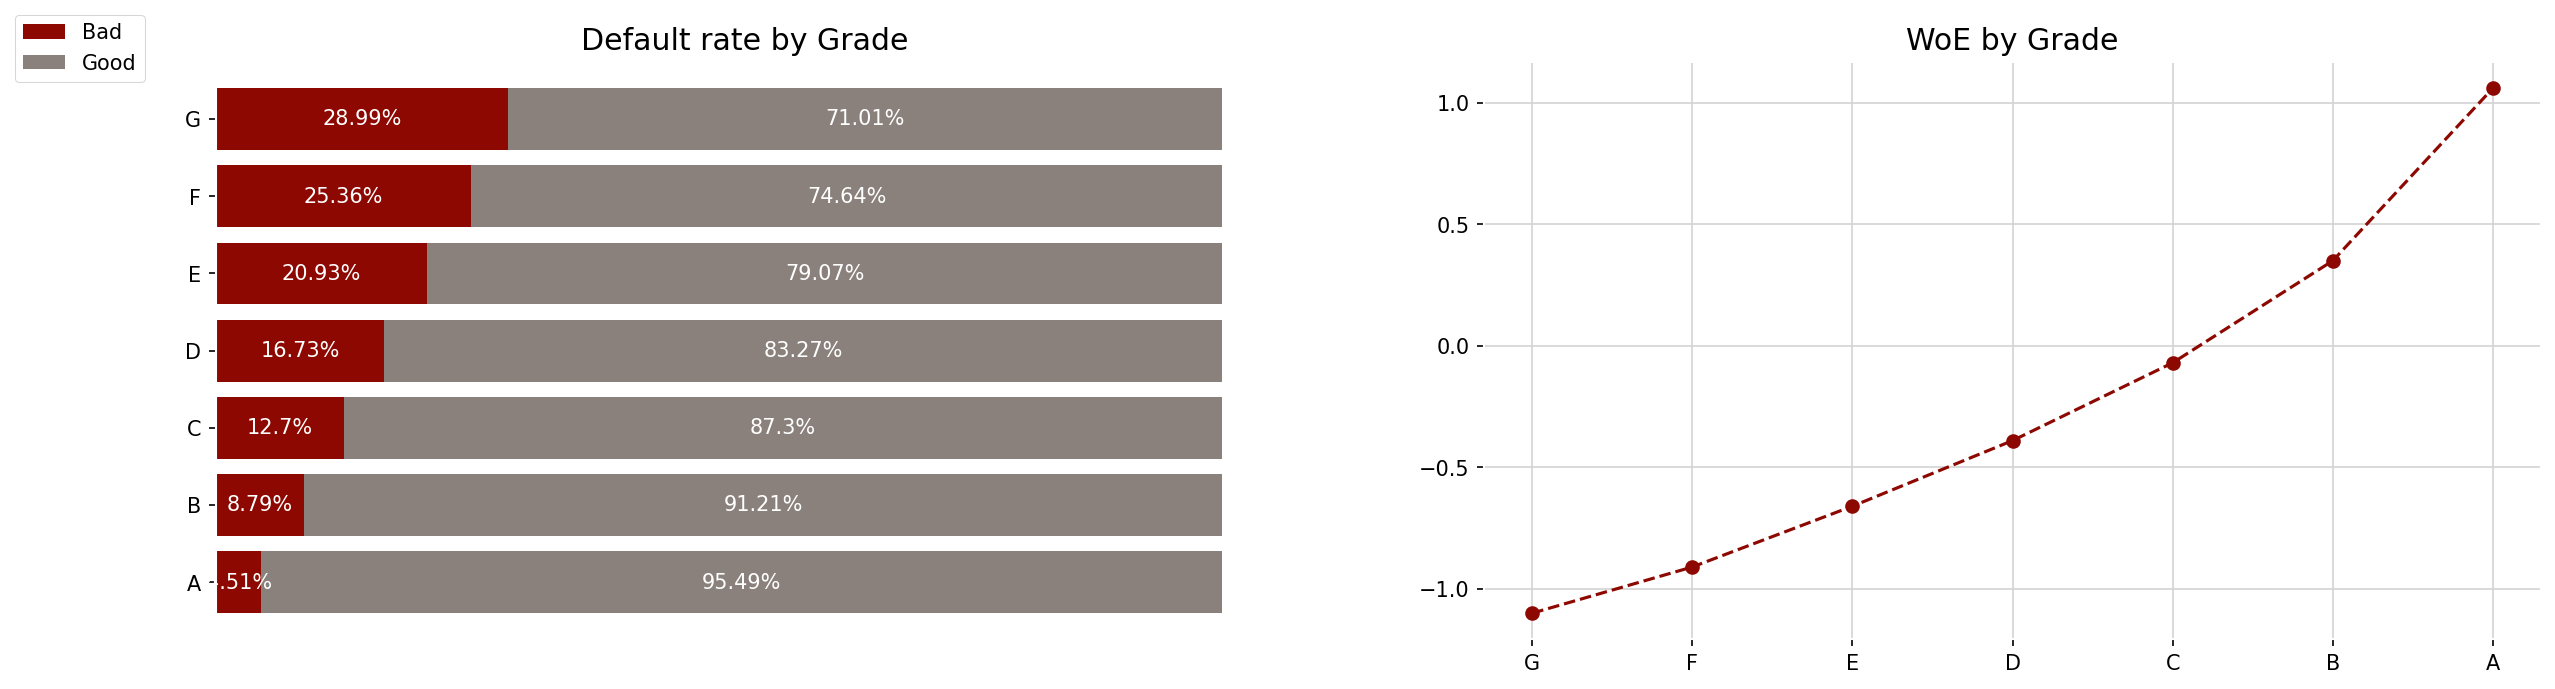

In [105]:
plot_woe_bad_rate_by_variable(grade_df, 'Grade')


In [107]:
home_own_df = default_analysis(train['home_ownership'], 'home_ownership', train, continuous=False, not_ordered=True)
home_own_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
home_ownership_cat                                                                                                                       
OTHER                  182                0.05         79.12        20.88     144.0     38.0          0.04         0.09  3.79 -0.66  0.00
NONE                    46                0.01         82.61        17.39      38.0      8.0          0.01         0.02  4.75 -0.44  0.00
RENT                151095               40.51         86.24        13.76  130310.0  20785.0         39.69        46.49  6.27 -0.16  0.01
OWN                  32033                8.59         87.92        12.08   28165.0   3868.0          8.58         8.65  7.28 -0.01  0.00
MORTGAGE            189648               50.84         89.45        10.55  169643.0  20005.0         51.67        44.75  8.48  0.14  0.01
ANY                      0                0.00           NaN          NaN       NaN      NaN           NaN          NaN   NaN   NaN   NaN
total               373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.02

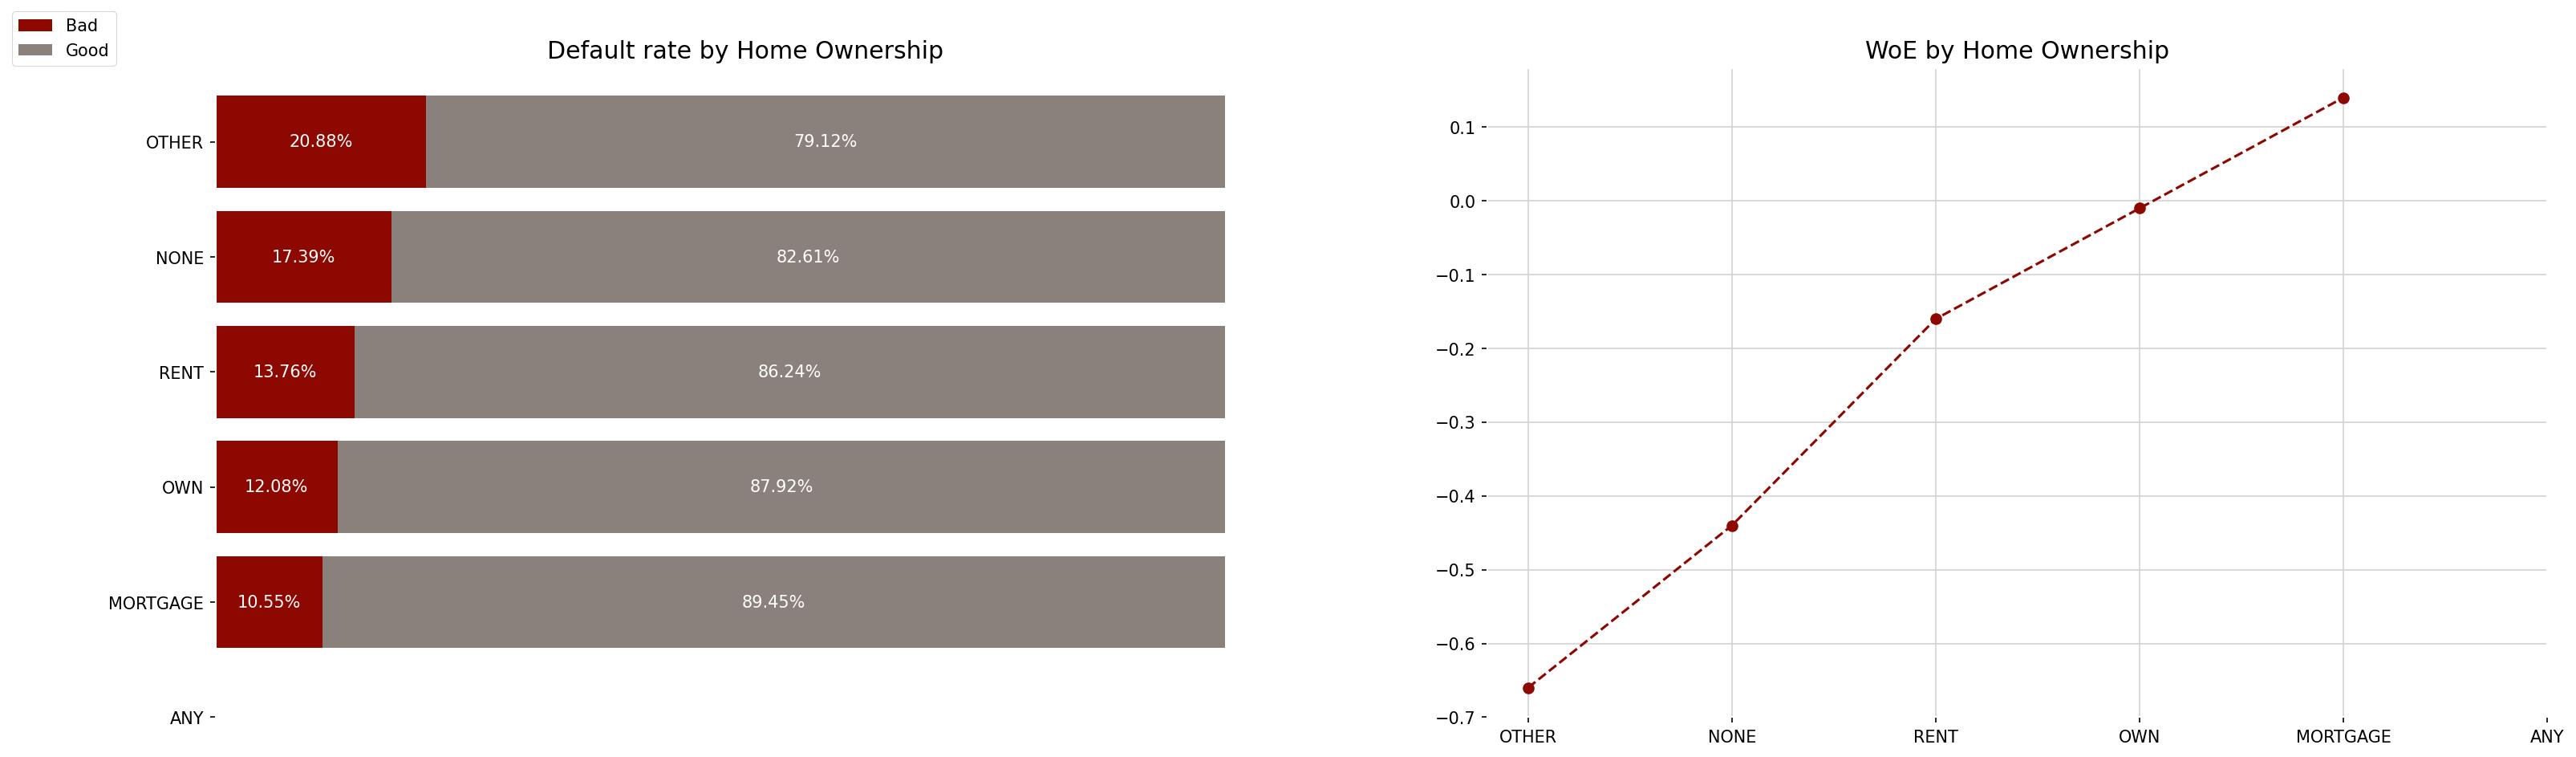

In [109]:
plot_woe_bad_rate_by_variable(home_own_df, 'Home Ownership', figsize=(25, 7))

In [111]:
purpose_df = default_analysis(train['purpose'], 'purpose', train, continuous=False, not_ordered=True)
purpose_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
purpose_cat                                                                                                                              
small_business        6178                1.66         77.08        22.92    4762.0   1416.0          1.45         3.17  3.36 -0.78  0.01
educational            422                0.11         79.15        20.85     334.0     88.0          0.10         0.20   3.8 -0.66  0.00
renewable_energy       292                0.08         82.88        17.12     242.0     50.0          0.07         0.11  4.84 -0.42  0.00
moving                2380                0.64         84.20        15.80    2004.0    376.0          0.61         0.84  5.33 -0.32  0.00
other                19138                5.13         84.84        15.16   16237.0   2901.0          4.95         6.49   5.6 -0.27  0.00
house                 1974                0.53         85.36        14.64    1685.0    289.0          0.51         0.65  5.83 -0.23  0.00
medical               3691                0.99         85.64        14.36    3161.0    530.0          0.96         1.19  5.96 -0.21  0.00
vacation              2037                0.55         87.33        12.67    1779.0    258.0          0.54         0.58   6.9 -0.06  0.00
debt_consolidation  216613               58.07         87.54        12.46  189614.0  26999.0         57.76        60.40  7.02 -0.04  0.00
wedding               2343                0.63         87.84        12.16    2058.0    285.0          0.63         0.64  7.22 -0.02  0.00
home_improvement     21739                5.83         89.46        10.54   19448.0   2291.0          5.92         5.12  8.49  0.14  0.00
major_purchase        8267                2.22         89.85        10.15    7428.0    839.0          2.26         1.88  8.85  0.19  0.00
car                   4643                1.24         90.42         9.58    4198.0    445.0          1.28         1.00  9.43  0.25  0.00
credit_card          83287               22.33         90.47         9.53   75350.0   7937.0         22.95        17.75  9.49  0.26  0.01
total               373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.02

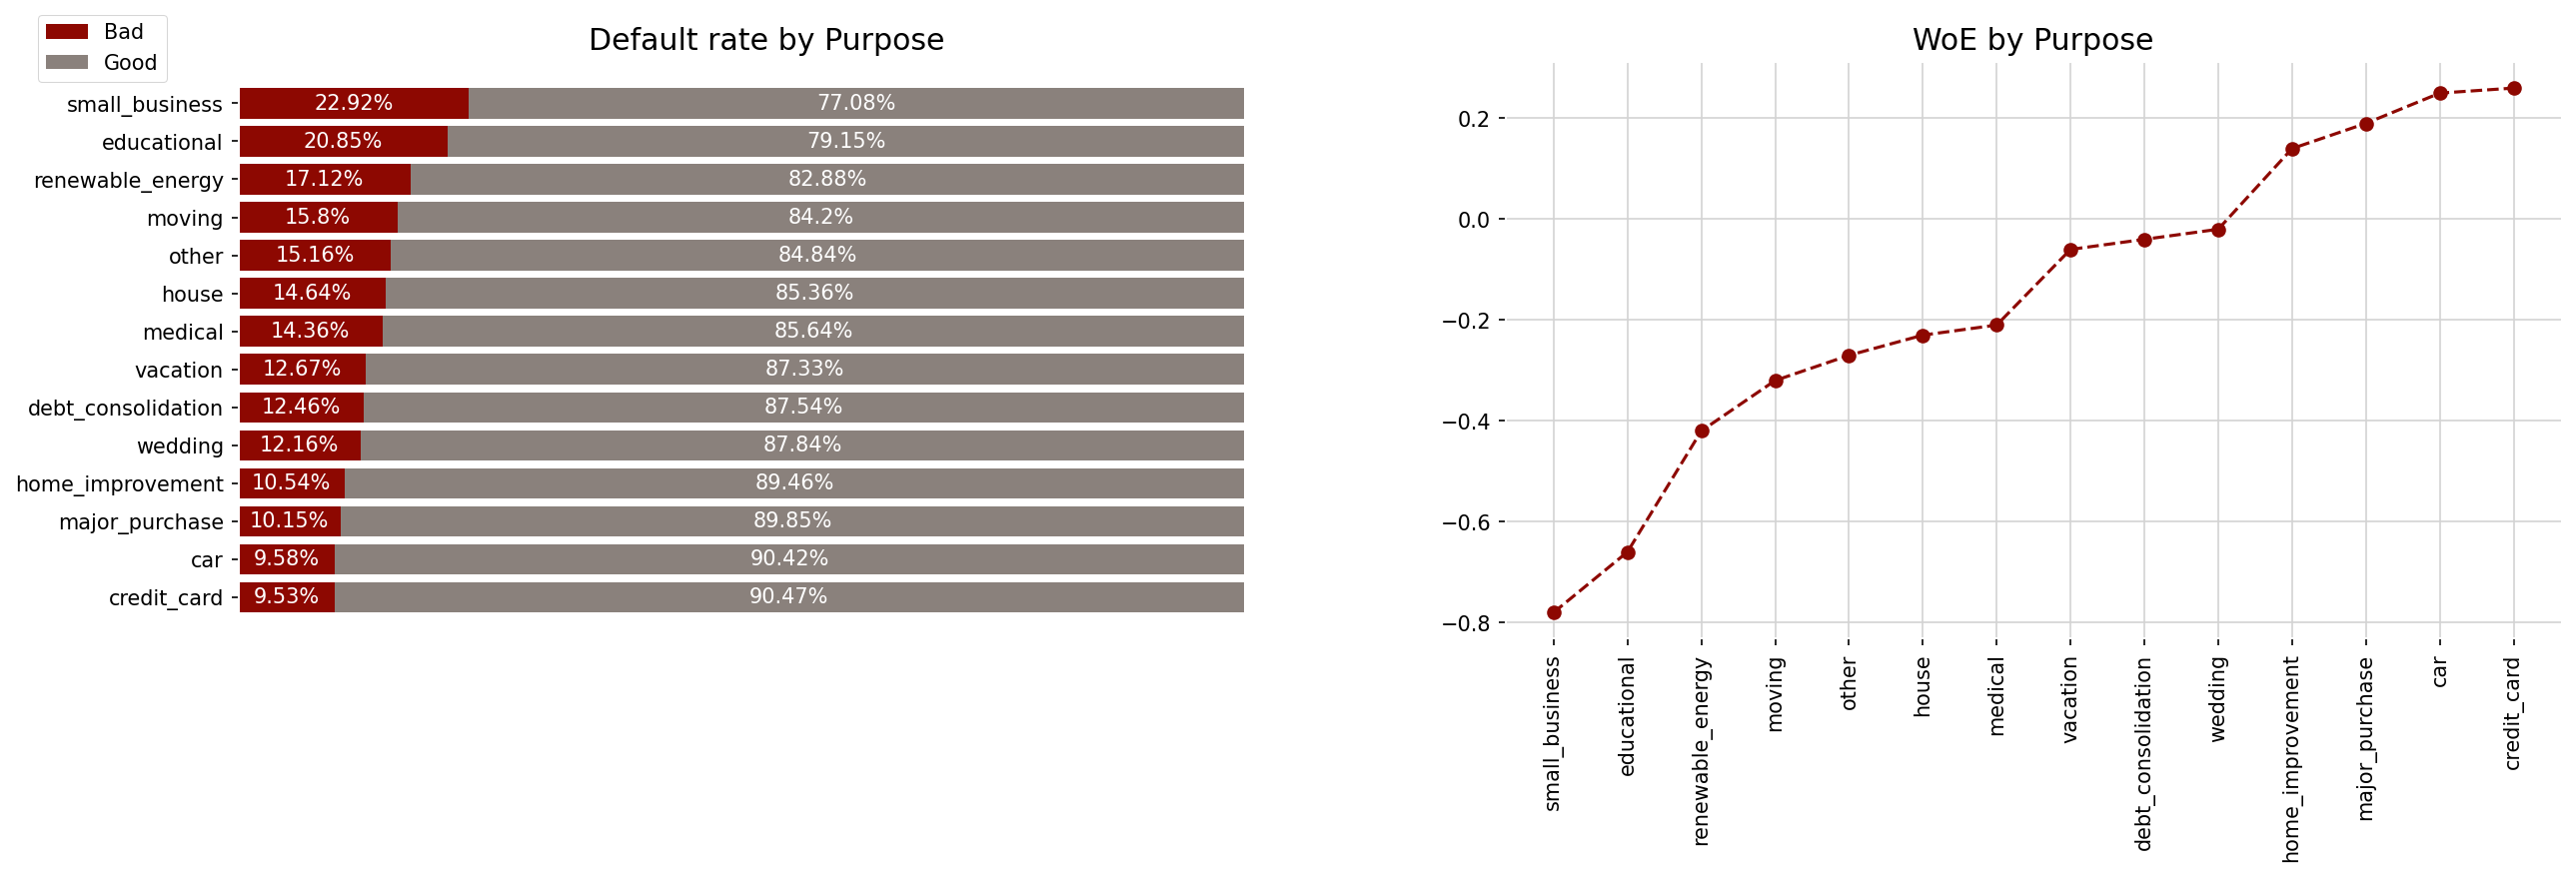

In [113]:
plot_woe_bad_rate_by_variable(purpose_df, 'Purpose', rotation=90)

In [115]:
addr_state_df = default_analysis(train['addr_state'], 'addr_state', train, continuous=False, not_ordered=True)
#addr_state_df

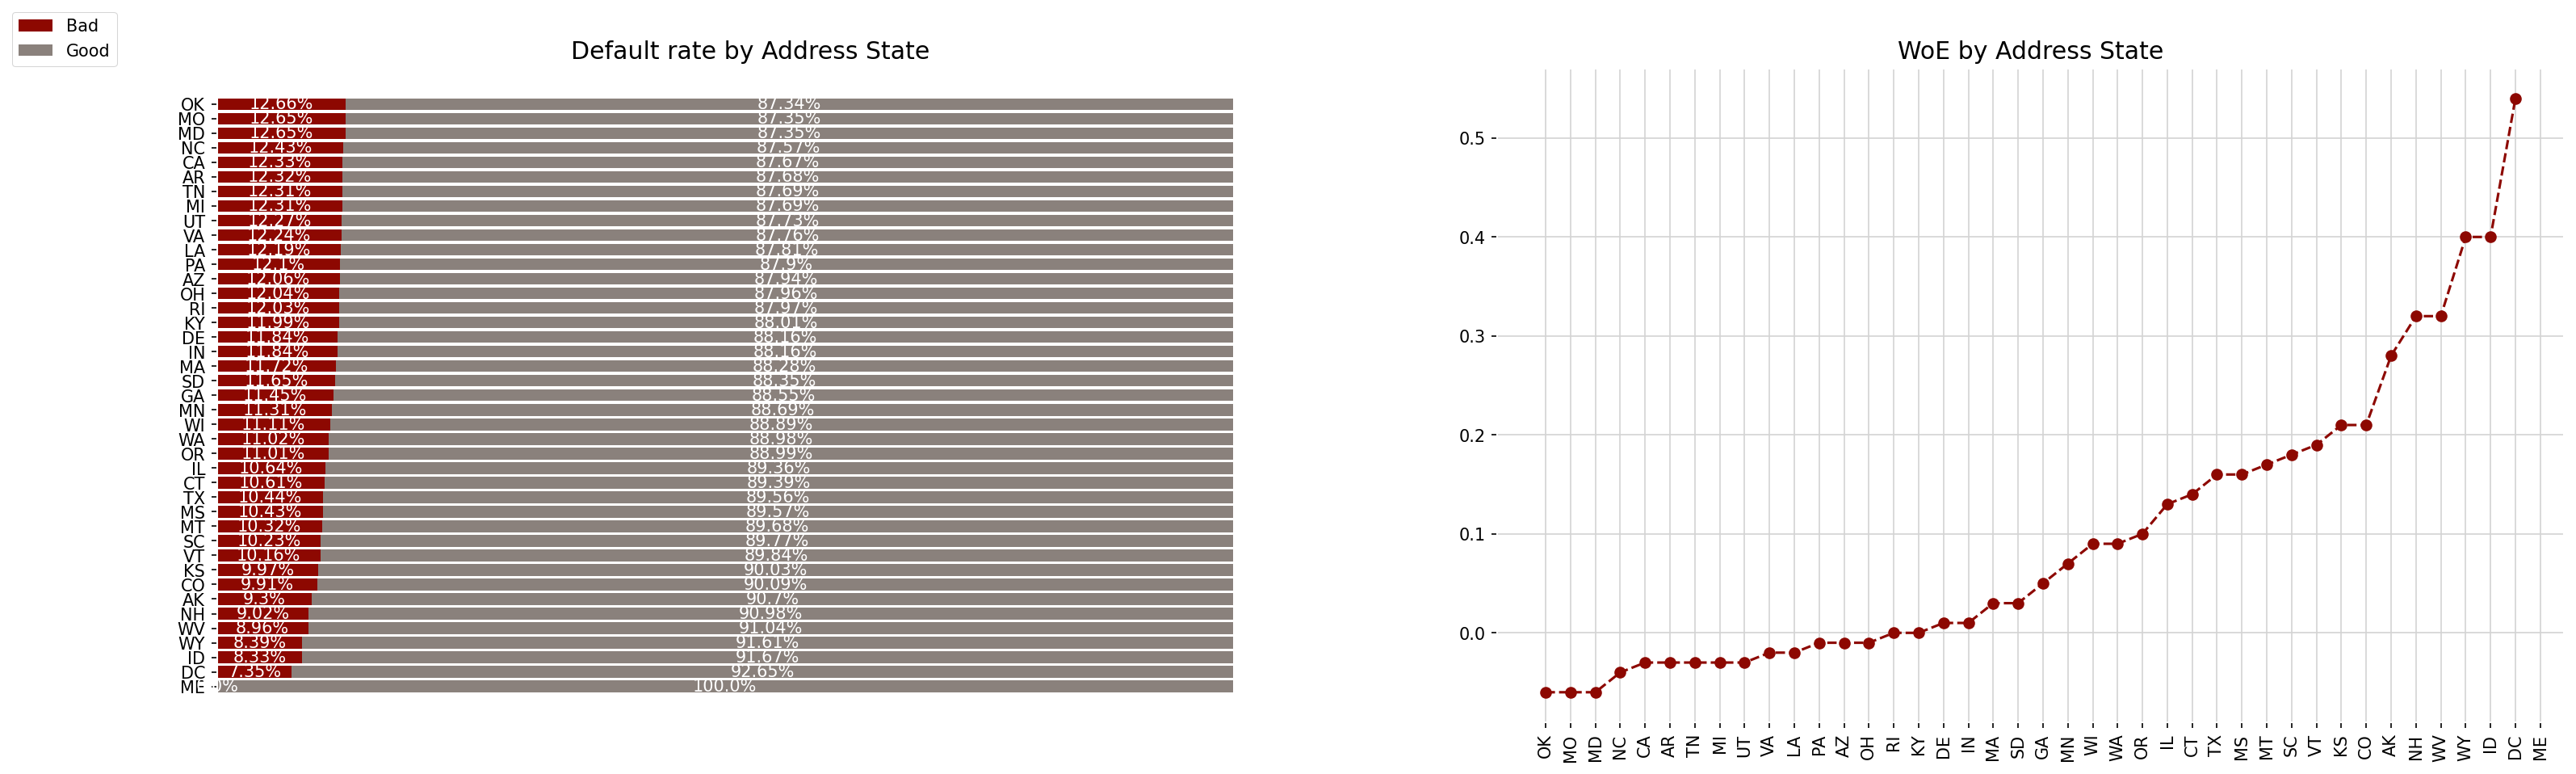

In [117]:
plot_woe_bad_rate_by_variable(addr_state_df.iloc[9:, :], 'Address State', figsize=(25, 7), rotation=90)

In [119]:
initial_list_status_df = default_analysis(train['initial_list_status'], 'initial_list_status', train, continuous=False, not_ordered=True)
initial_list_status_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
initial_list_status_cat                                                                                                                       
f                        260617               69.87         87.14        12.86  227094.0  33523.0         69.17        74.99  6.77 -0.08  0.00
w                        112387               30.13         90.05         9.95  101206.0  11181.0         30.83        25.01  9.05  0.21  0.01
total                    373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.01

In [121]:
verification_status_df = default_analysis(train['verification_status'], 'verification_status', train, continuous=False, not_ordered=True)
verification_status_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
verification_status_cat                                                                                                                       
Verified                 142081               38.09         86.44        13.56  122821.0  19260.0         37.41        43.08  6.38 -0.14  0.01
Source Verified          111264               29.83         88.41        11.59   98368.0  12896.0         29.96        28.85  7.63  0.04  0.00
Not Verified             119659               32.08         89.51        10.49  107111.0  12548.0         32.63        28.07  8.54  0.15  0.01
total                    373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.02

In [123]:
sub_grade_df = default_analysis(train['sub_grade'], 'sub_grade', train, continuous=False, not_ordered=True)
#sub_grade_df

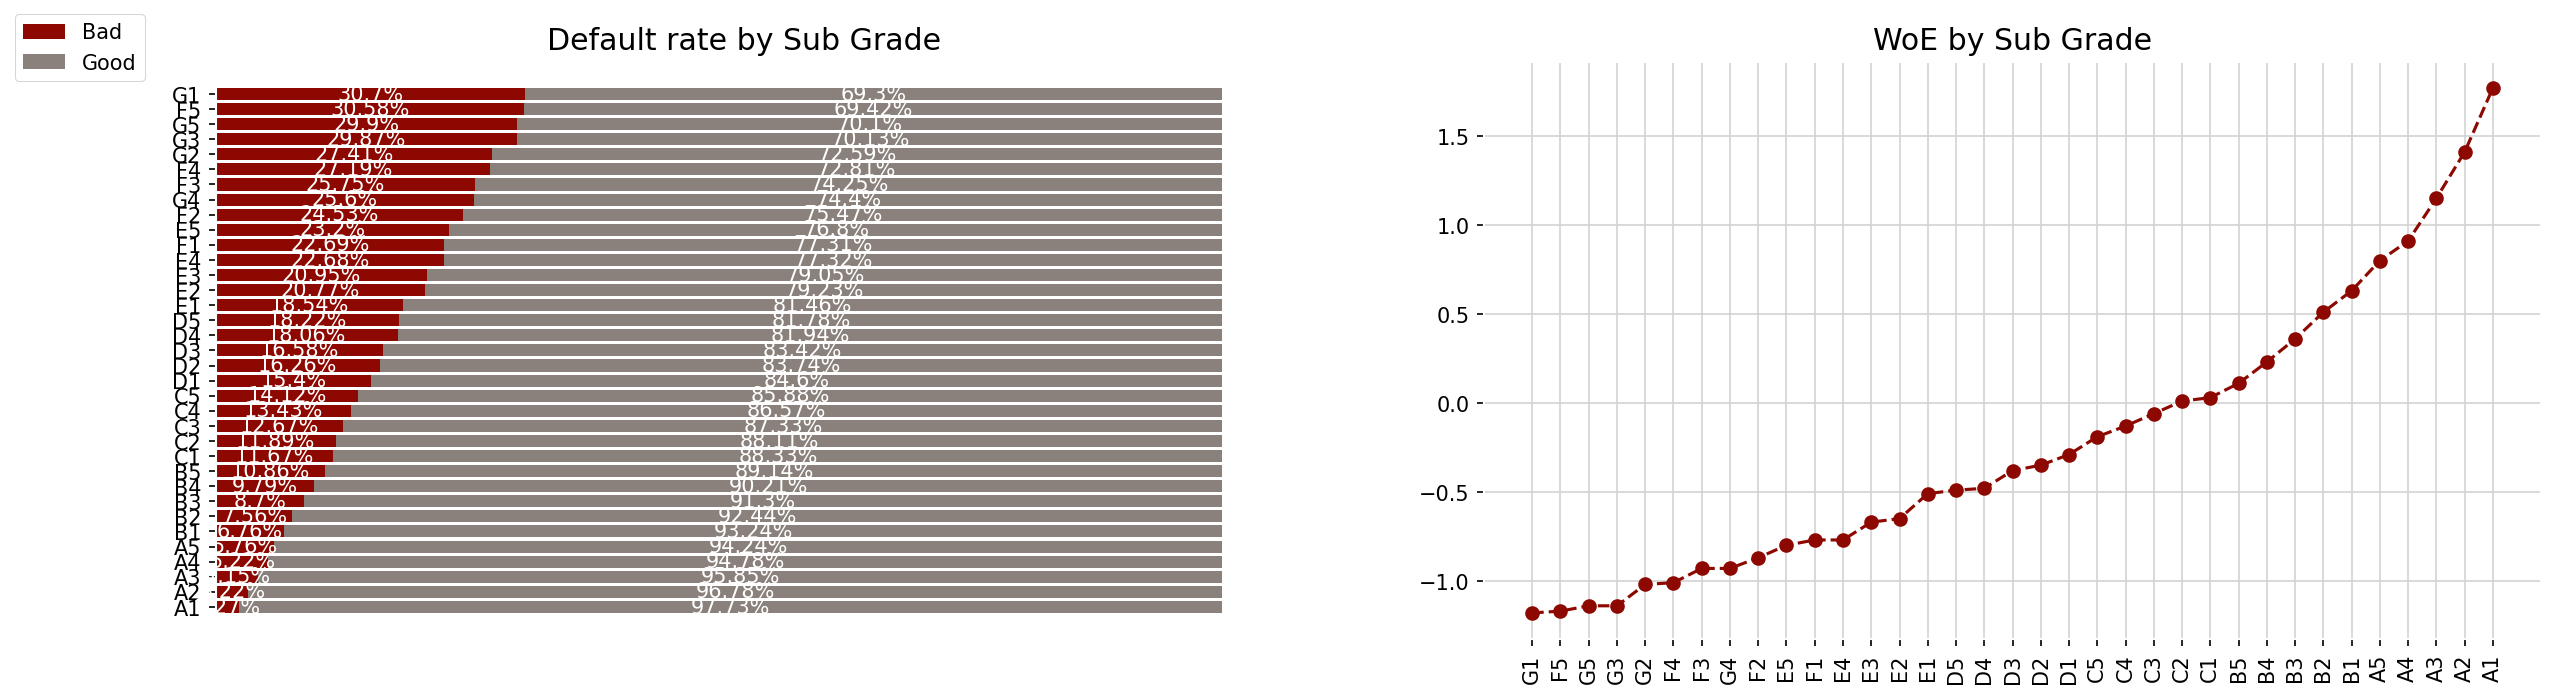

In [125]:
plot_woe_bad_rate_by_variable(sub_grade_df, 'Sub Grade', rotation=90)

In [127]:
term_df = default_analysis(train['term'], 'term', train, continuous=False, not_ordered=True)
term_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
term_cat                                                                                                                       
60         98782               26.48         84.04        15.96   83014.0  15768.0         25.29        35.27  5.26 -0.33  0.03
36        274222               73.52         89.45        10.55  245286.0  28936.0         74.71        64.73  8.48  0.14  0.01
total     373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.04

In [129]:
emp_len_df = default_analysis(train['emp_length'], 'emp_length', train, continuous=False, not_ordered=False)
emp_len_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
emp_length_cat                                                                                                                      
0                44830               12.02         86.50        13.50   38779.0   6051.0         11.81        13.54  6.41 -0.14  0.0
1                23816                6.38         87.86        12.14   20925.0   2891.0          6.37         6.47  7.24 -0.01  0.0
2                33148                8.89         87.94        12.06   29152.0   3996.0          8.88         8.94   7.3 -0.01  0.0
3                29331                7.86         87.96        12.04   25800.0   3531.0          7.86         7.90  7.31 -0.01  0.0
4                22456                6.02         87.91        12.09   19742.0   2714.0          6.01         6.07  7.27 -0.01  0.0
5                25890                6.94         87.59        12.41   22678.0   3212.0          6.91         7.19  7.06 -0.04  0.0
6                21746                5.83         87.28        12.72   18980.0   2766.0          5.78         6.19  6.86 -0.07  0.0
7                21239                5.69         87.79        12.21   18646.0   2593.0          5.68         5.80  7.19 -0.02  0.0
8                17752                4.76         87.86        12.14   15597.0   2155.0          4.75         4.82  7.24 -0.01  0.0
9                14138                3.79         87.65        12.35   12392.0   1746.0          3.77         3.91   7.1 -0.03  0.0
10              118658               31.81         89.00        11.00  105609.0  13049.0         32.17        29.19  8.09   0.1  0.0
total           373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.0

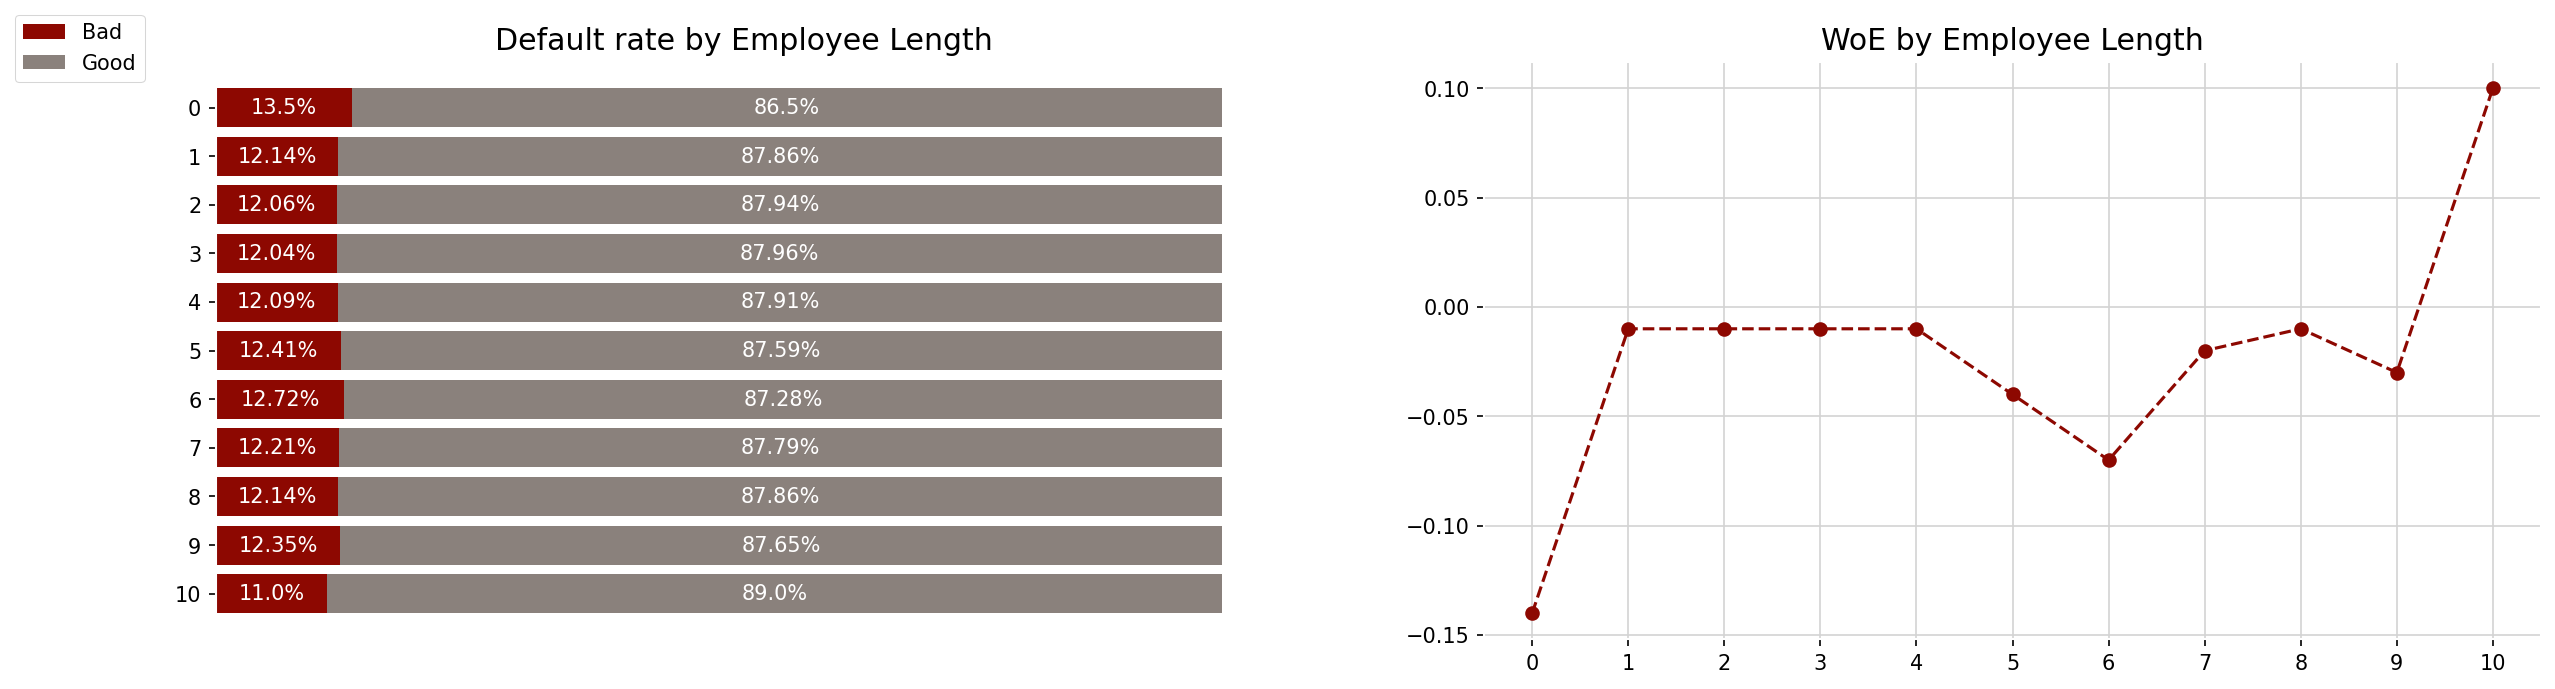

In [131]:
plot_woe_bad_rate_by_variable(emp_len_df, 'Employee Length')

In [133]:
int_rate_df = default_analysis(pd.cut(train['int_rate'], 10), 'int_rate', train, continuous=True, not_ordered=False)
int_rate_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)    g/b   woe    iv
int_rate_cat                                                                                                                        
5-7            19492                5.23         97.02         2.98   18911.0    581.0          5.76         1.30  32.55  1.49  0.07
7-10           42064               11.28         94.81         5.19   39880.0   2184.0         12.15         4.89  18.26  0.91  0.07
10-12          49071               13.16         92.13         7.87   45209.0   3862.0         13.77         8.64  11.71  0.47  0.02
12-14          73302               19.65         90.07         9.93   66023.0   7279.0         20.11        16.28   9.07  0.21  0.01
14-16          70651               18.94         87.79        12.21   62028.0   8623.0         18.89        19.29   7.19 -0.02  0.00
16-18          50869               13.64         83.83        16.17   42646.0   8223.0         12.99        18.39   5.19 -0.35  0.02
18-20          31693                8.50         81.35        18.65   25783.0   5910.0          7.85        13.22   4.36 -0.52  0.03
20-22          16967                4.55         79.47        20.53   13484.0   3483.0          4.11         7.79   3.87 -0.64  0.02
22-24          12318                3.30         75.96        24.04    9357.0   2961.0          2.85         6.62   3.16 -0.84  0.03
24-26           6577                1.76         75.70        24.30    4979.0   1598.0          1.52         3.57   3.12 -0.86  0.02
total         373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00      -     -  0.29

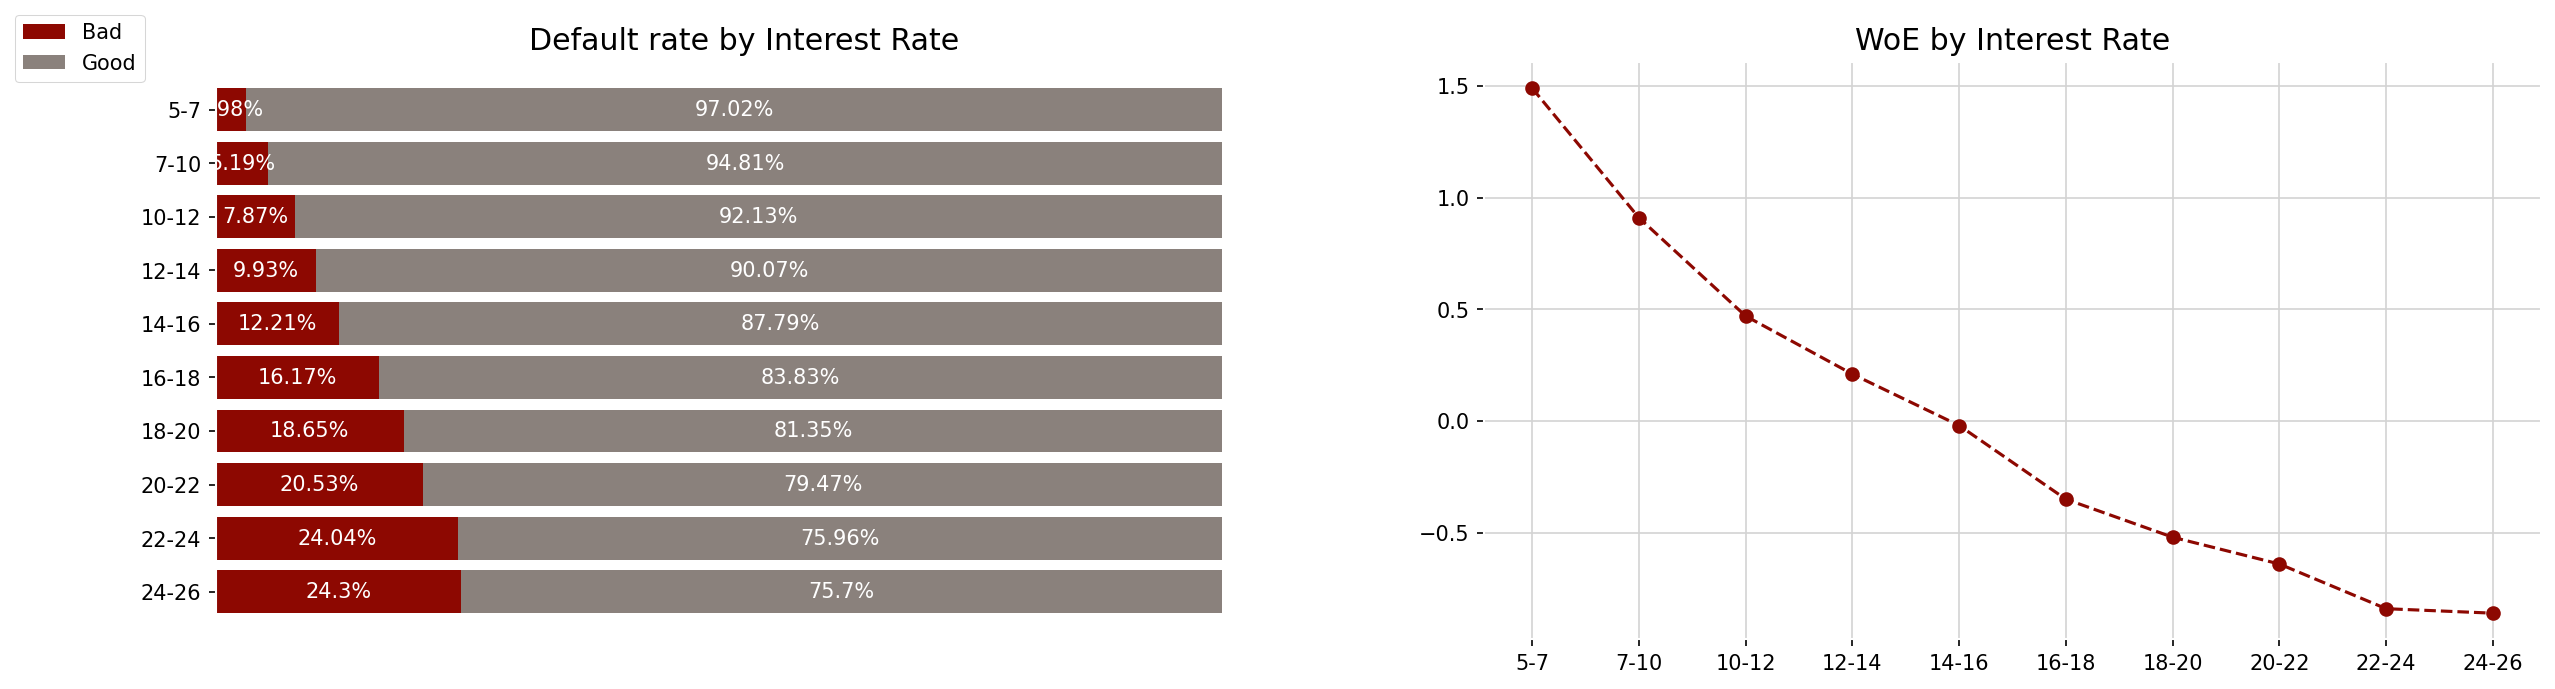

In [135]:
plot_woe_bad_rate_by_variable(int_rate_df, 'Interest Rate')

In [137]:
loan_amnt_df = default_analysis(pd.cut(train['loan_amnt'], 10), 'loan_amnt', train, continuous=True, not_ordered=False)
loan_amnt_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
loan_amnt_cat                                                                                                                      
466-3950        22765                6.10         88.33        11.67   20109.0   2656.0          6.13         5.94  7.57  0.03  0.0
3950-7400       61364               16.45         88.78        11.22   54479.0   6885.0         16.59        15.40  7.91  0.07  0.0
7400-10850      74362               19.94         88.11        11.89   65522.0   8840.0         19.96        19.77  7.41  0.01  0.0
10850-14300     52014               13.94         88.58        11.42   46075.0   5939.0         14.03        13.29  7.76  0.05  0.0
14300-17750     48429               12.98         87.73        12.27   42489.0   5940.0         12.94        13.29  7.15 -0.03  0.0
17750-21200     46326               12.42         87.72        12.28   40636.0   5690.0         12.38        12.73  7.14 -0.03  0.0
21200-24650     20216                5.42         87.57        12.43   17704.0   2512.0          5.39         5.62  7.05 -0.04  0.0
24650-28100     20543                5.51         87.22        12.78   17918.0   2625.0          5.46         5.87  6.83 -0.07  0.0
28100-31550     10570                2.83         86.21        13.79    9112.0   1458.0          2.78         3.26  6.25 -0.16  0.0
31550-35000     16415                4.40         86.85        13.15   14256.0   2159.0          4.34         4.83   6.6 -0.11  0.0
total          373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.0

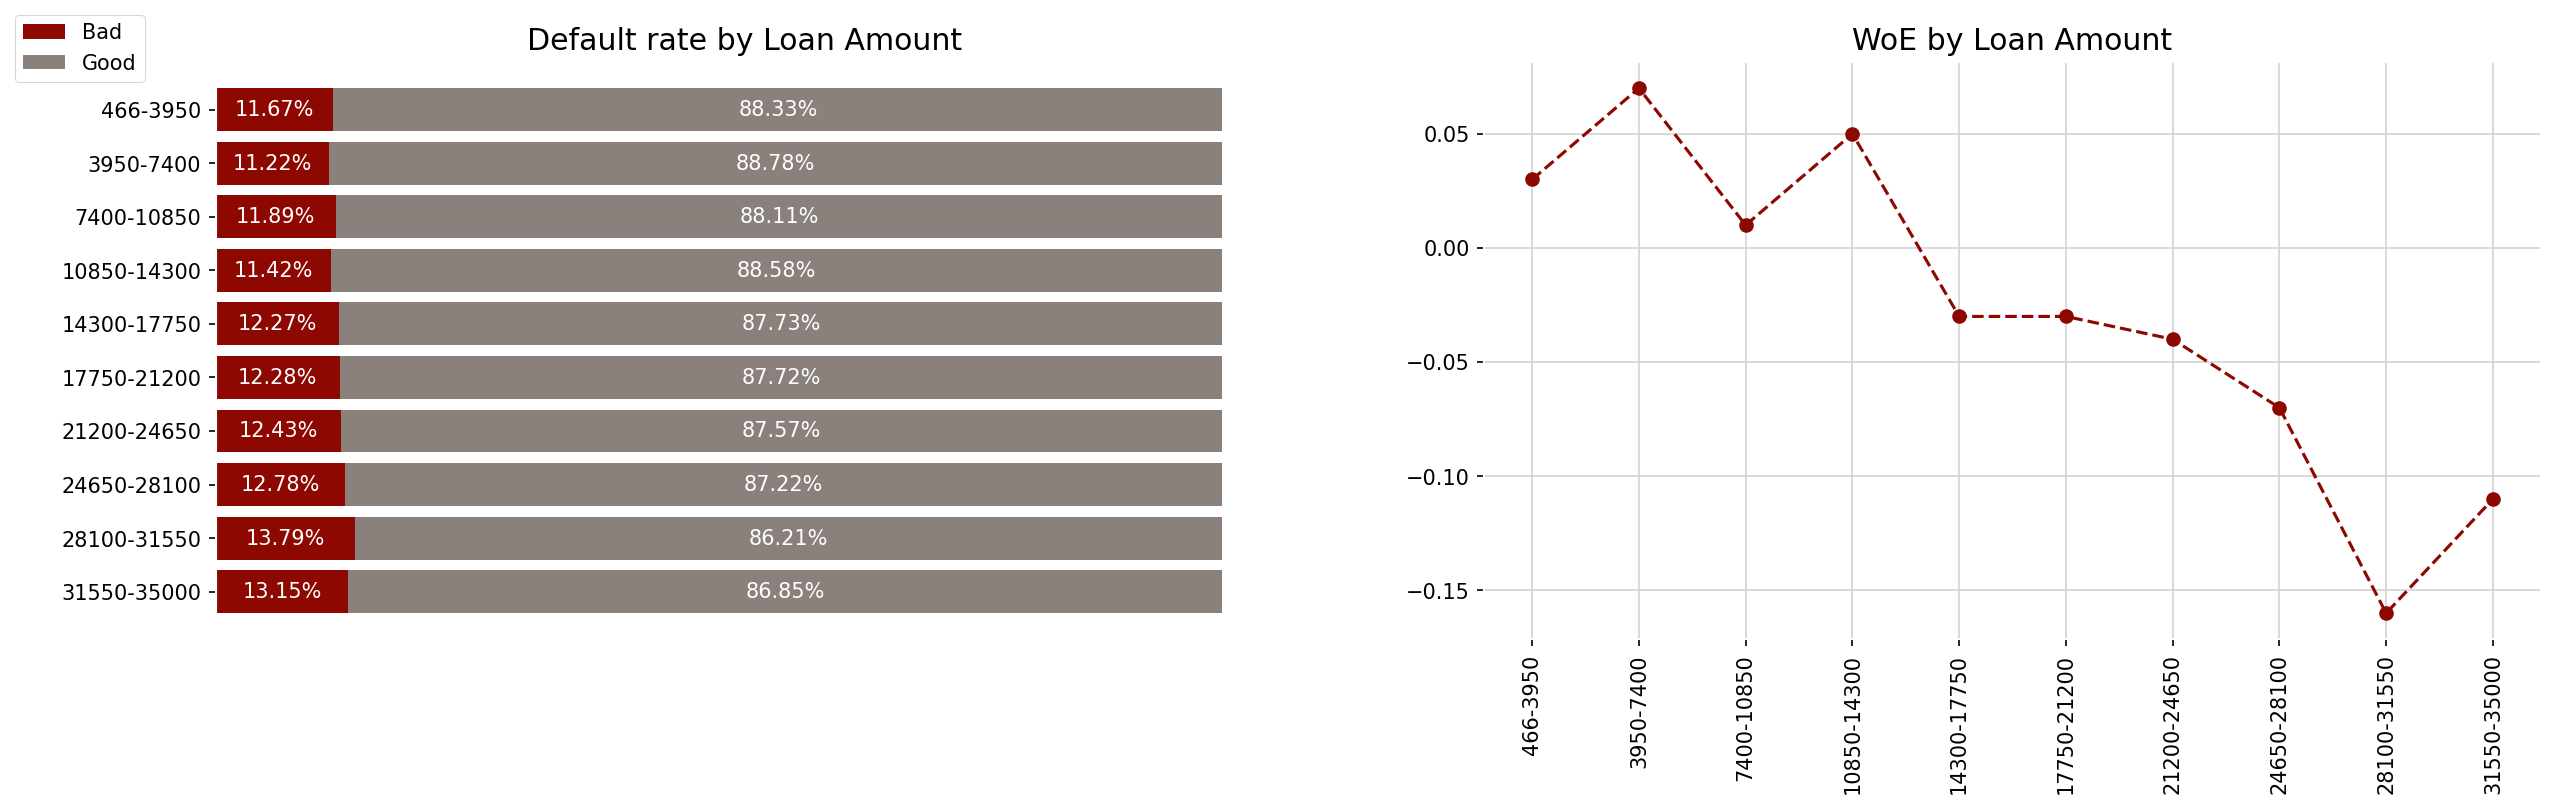

In [139]:
plot_woe_bad_rate_by_variable(loan_amnt_df, 'Loan Amount', rotation=90)

In [141]:
dti_df = default_analysis(pd.cut(train['dti'], 10), 'dti', train, continuous=True, not_ordered=False)
dti_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
dti_cat                                                                                                                       
0-4       14277                3.83         89.82        10.18   12823.0   1454.0          3.91         3.25  8.82  0.18  0.00
4-8       35629                9.55         90.55         9.45   32263.0   3366.0          9.83         7.53  9.58  0.27  0.01
8-12      56854               15.24         89.74        10.26   51022.0   5832.0         15.54        13.05  8.75  0.18  0.00
12-16     69800               18.71         89.04        10.96   62151.0   7649.0         18.93        17.11  8.13   0.1  0.00
16-20     68046               18.24         87.76        12.24   59717.0   8329.0         18.19        18.63  7.17 -0.02  0.00
20-24     57297               15.36         86.46        13.54   49541.0   7756.0         15.09        17.35  6.39 -0.14  0.00
24-28     39242               10.52         85.79        14.21   33665.0   5577.0         10.25        12.48  6.04  -0.2  0.00
28-32     22799                6.11         85.26        14.74   19438.0   3361.0          5.92         7.52  5.78 -0.24  0.00
32-36      8899                2.39         84.74        15.26    7541.0   1358.0          2.30         3.04  5.55 -0.28  0.00
36-40       161                0.04         86.34        13.66     139.0     22.0          0.04         0.05  6.32 -0.15  0.00
total    373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00     -     -  0.01

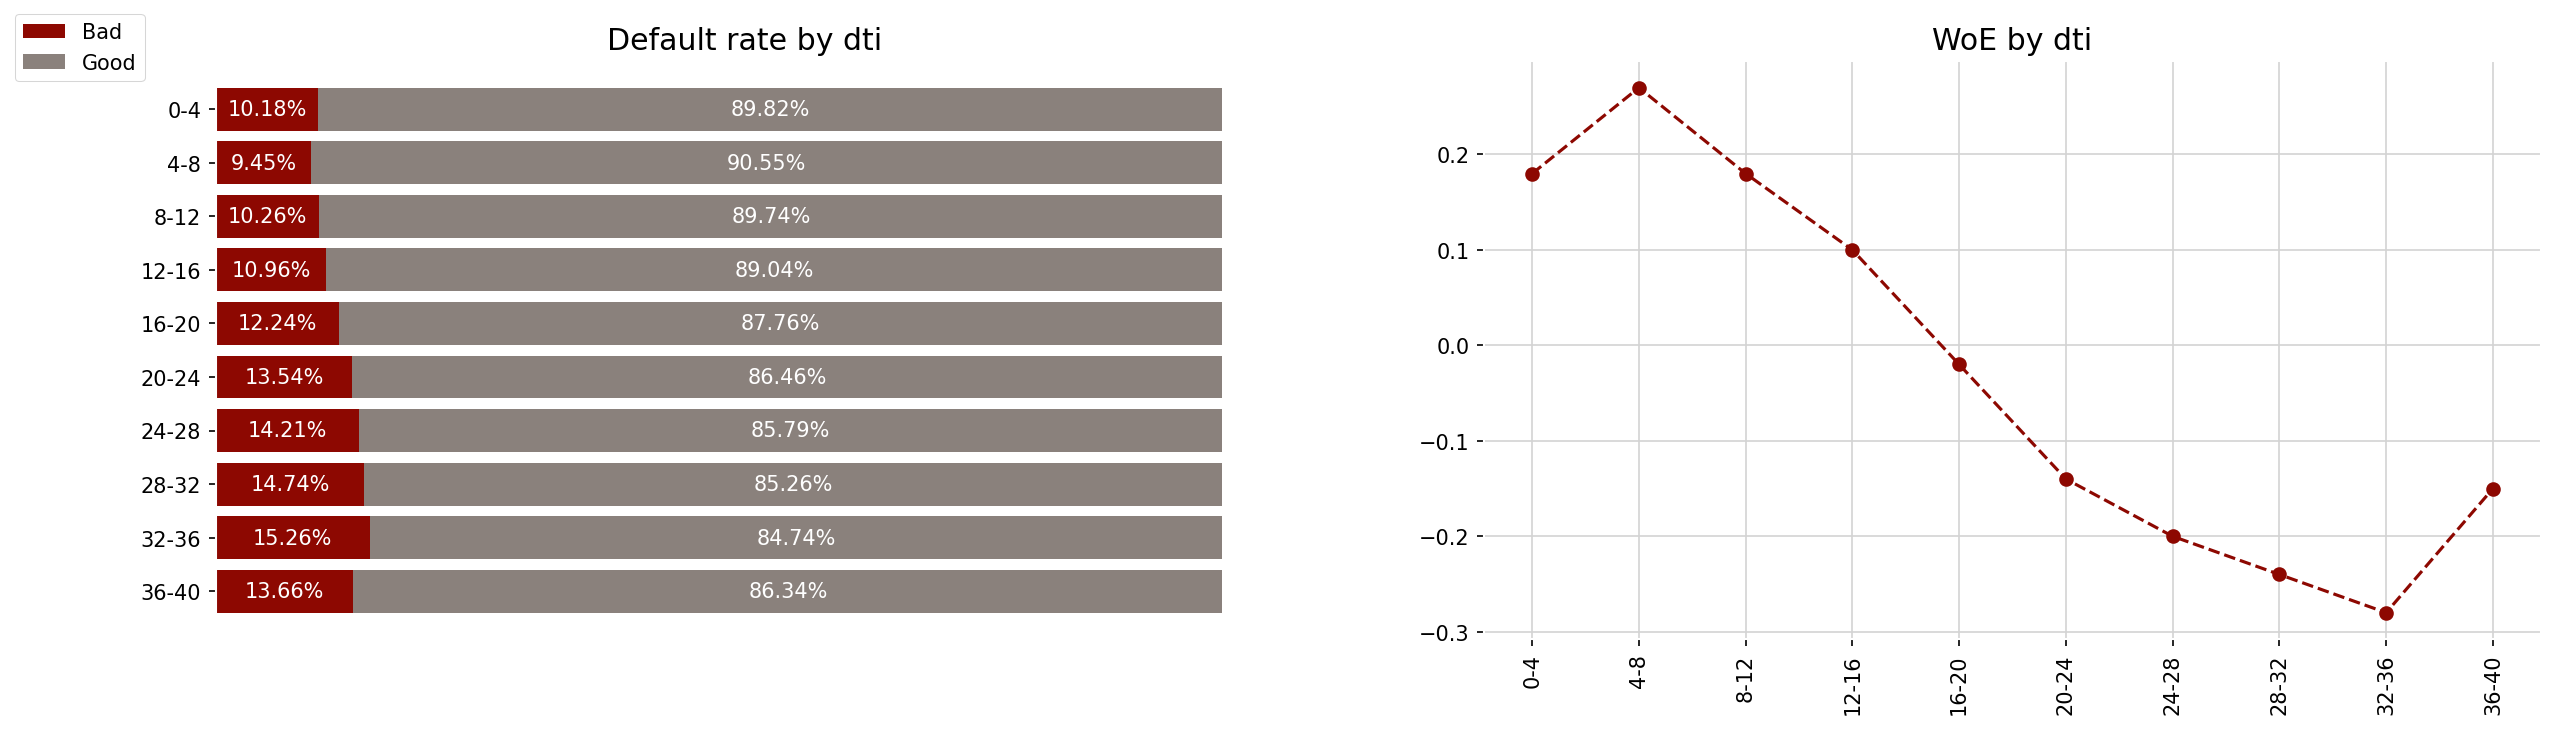

In [143]:
plot_woe_bad_rate_by_variable(dti_df, 'dti', rotation=90)

In [145]:
annual_inc_lower_150 = train.loc[train['annual_inc'] < 150_000]
annual_inc_df = default_analysis(pd.cut(annual_inc_lower_150['annual_inc'], 20), 'annual_inc', annual_inc_lower_150, continuous=True, not_ordered=False)
#annual_inc_df

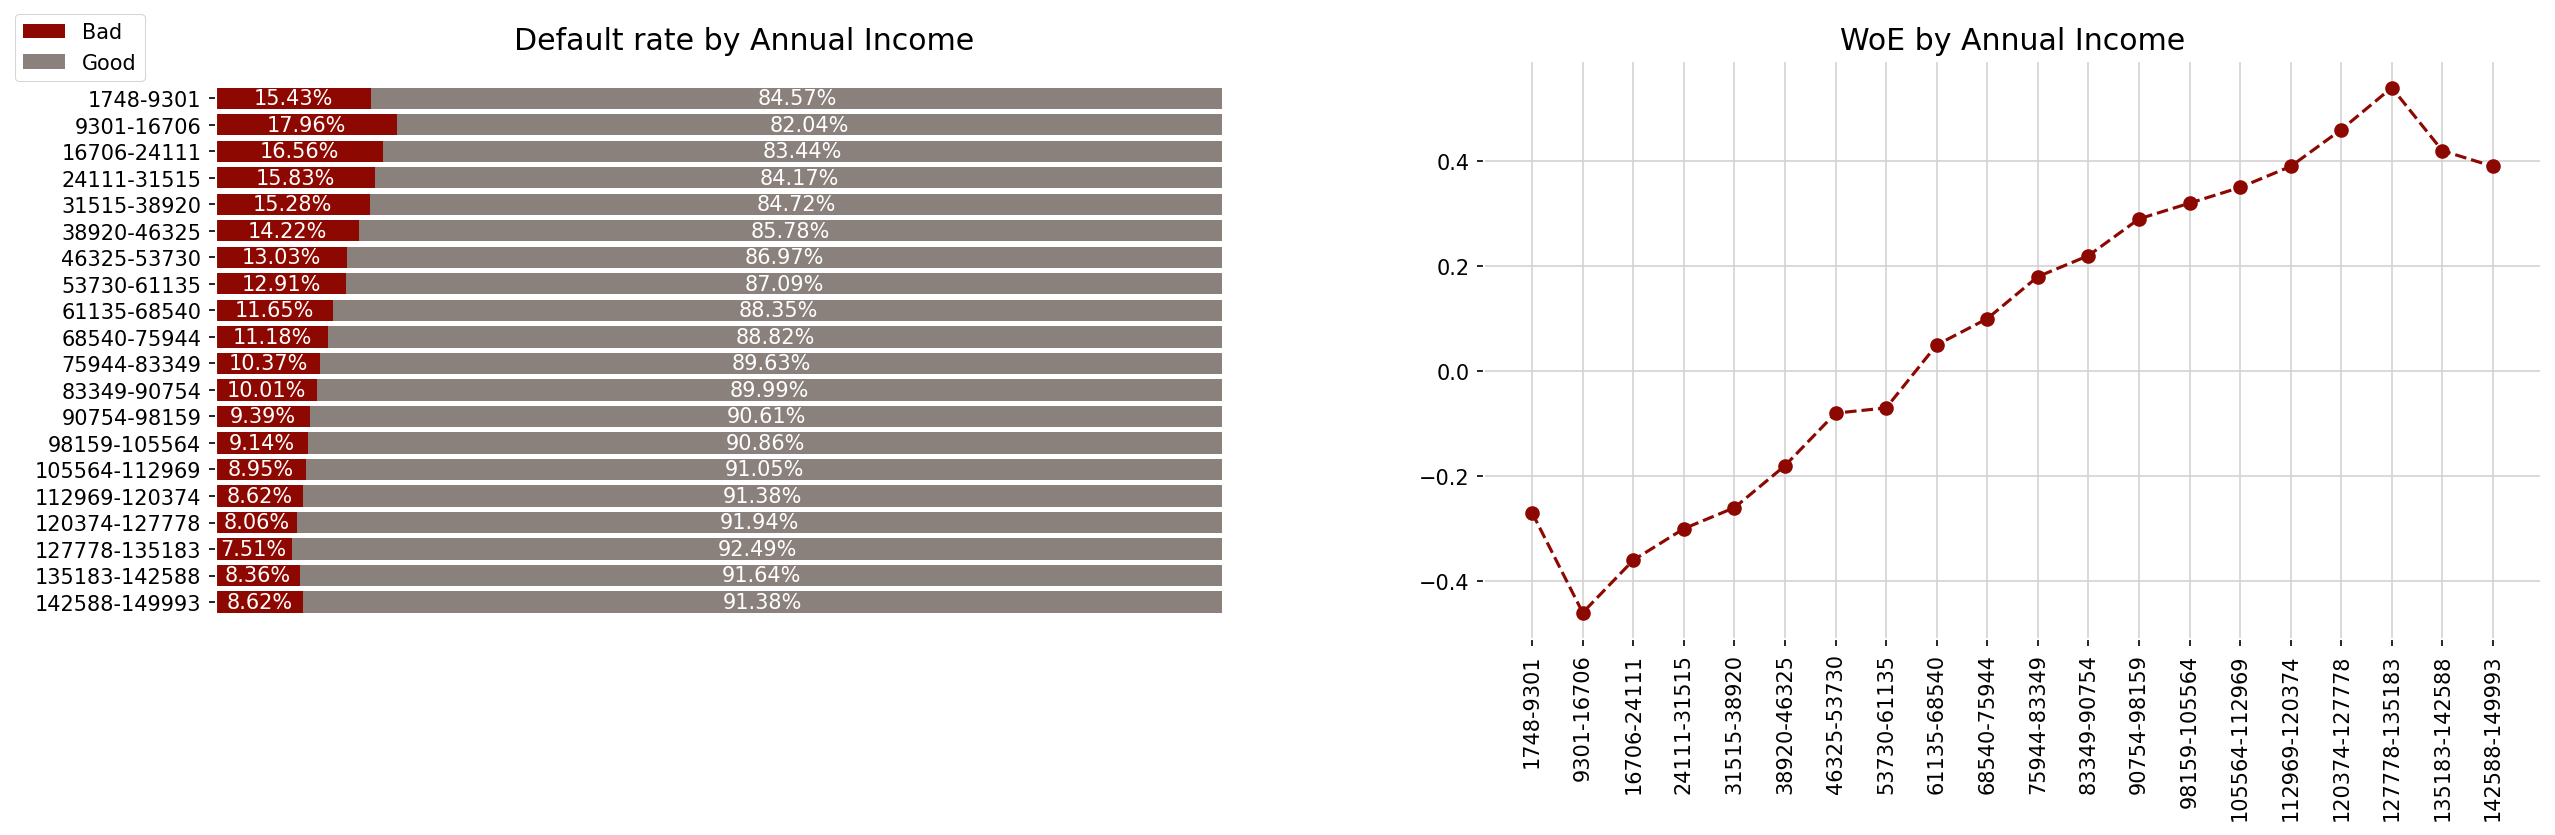

In [147]:
plot_woe_bad_rate_by_variable(annual_inc_df, 'Annual Income', rotation=90)

In [149]:
mths_since_earliest_cr_line_df = default_analysis(pd.cut(train['mths_since_earliest_cr_line'], 20), 'mths_since_earliest_cr_line', train, continuous=True, not_ordered=False)
#mths_since_earliest_cr_line_df

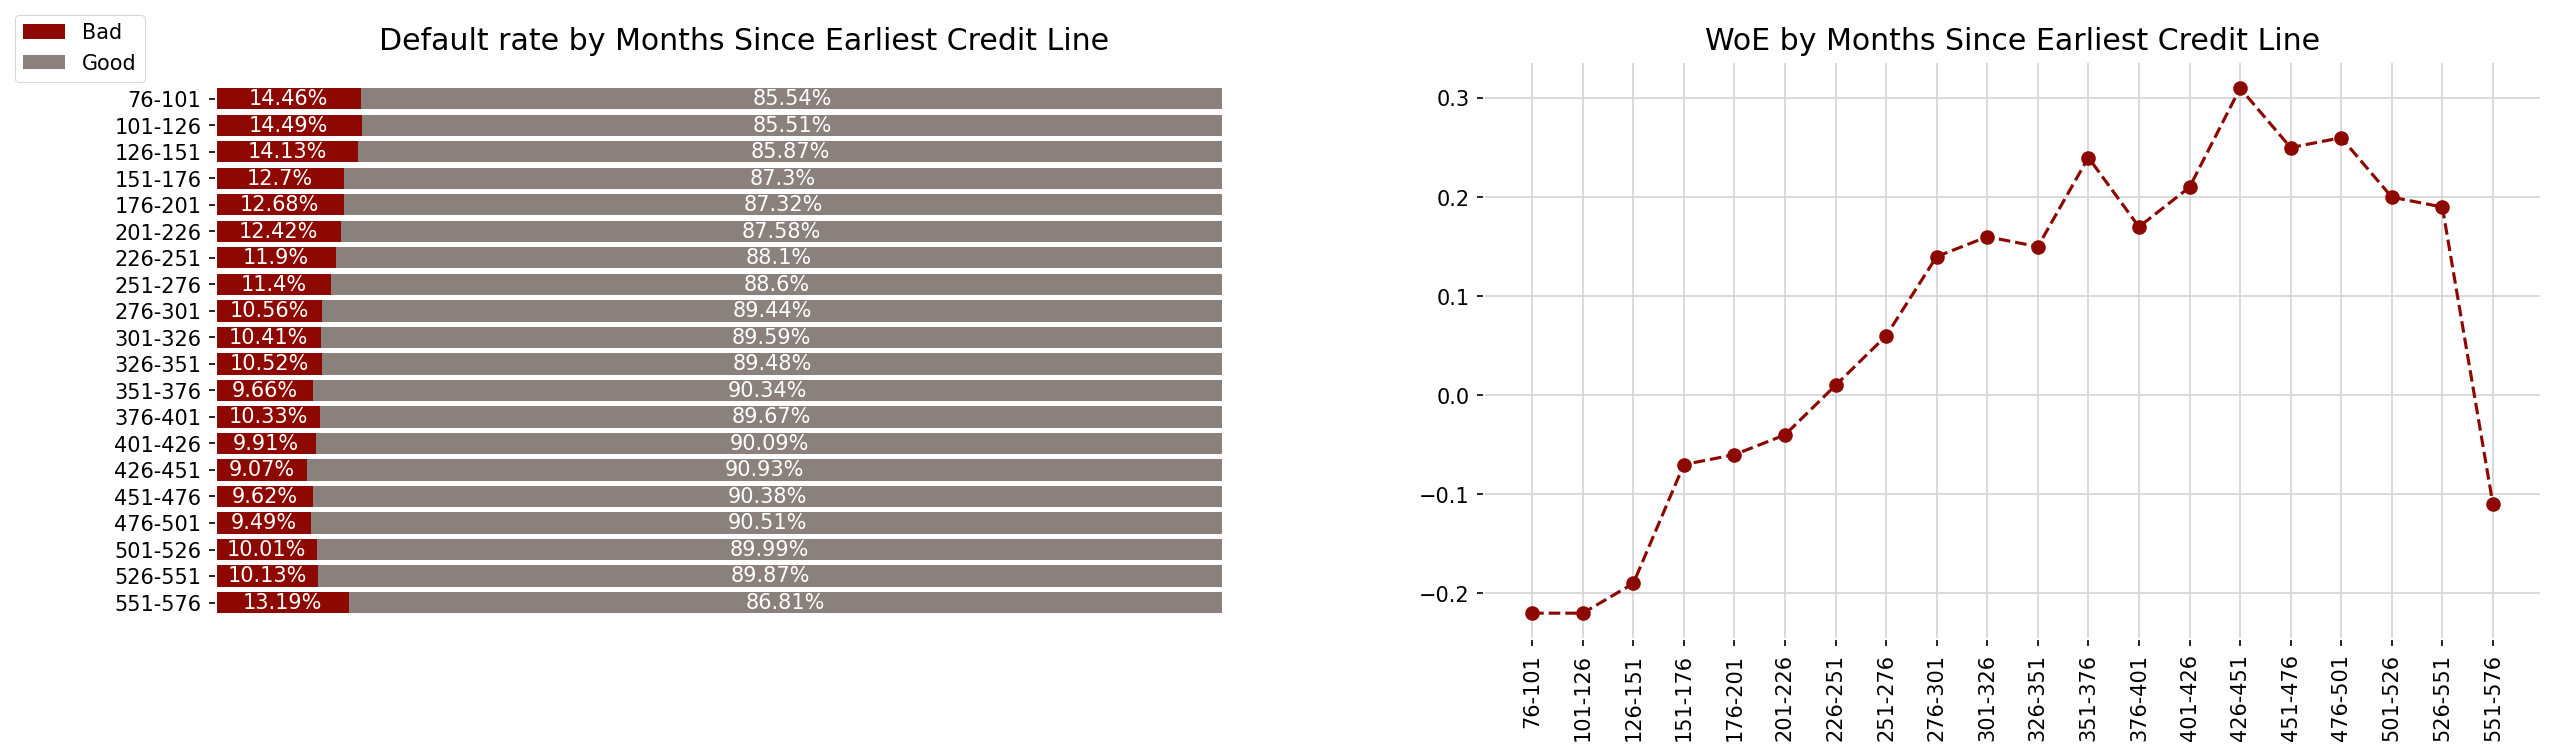

In [151]:
plot_woe_bad_rate_by_variable(mths_since_earliest_cr_line_df, 'Months Since Earliest Credit Line', rotation=90)

In [153]:
revol_bal_lower_40 = train.loc[train['revol_bal'] < 40_000]
revol_bal_df = default_analysis(pd.cut(revol_bal_lower_40['revol_bal'], 20), 'revol_bal', revol_bal_lower_40, continuous=True, not_ordered=False)
#revol_bal_df

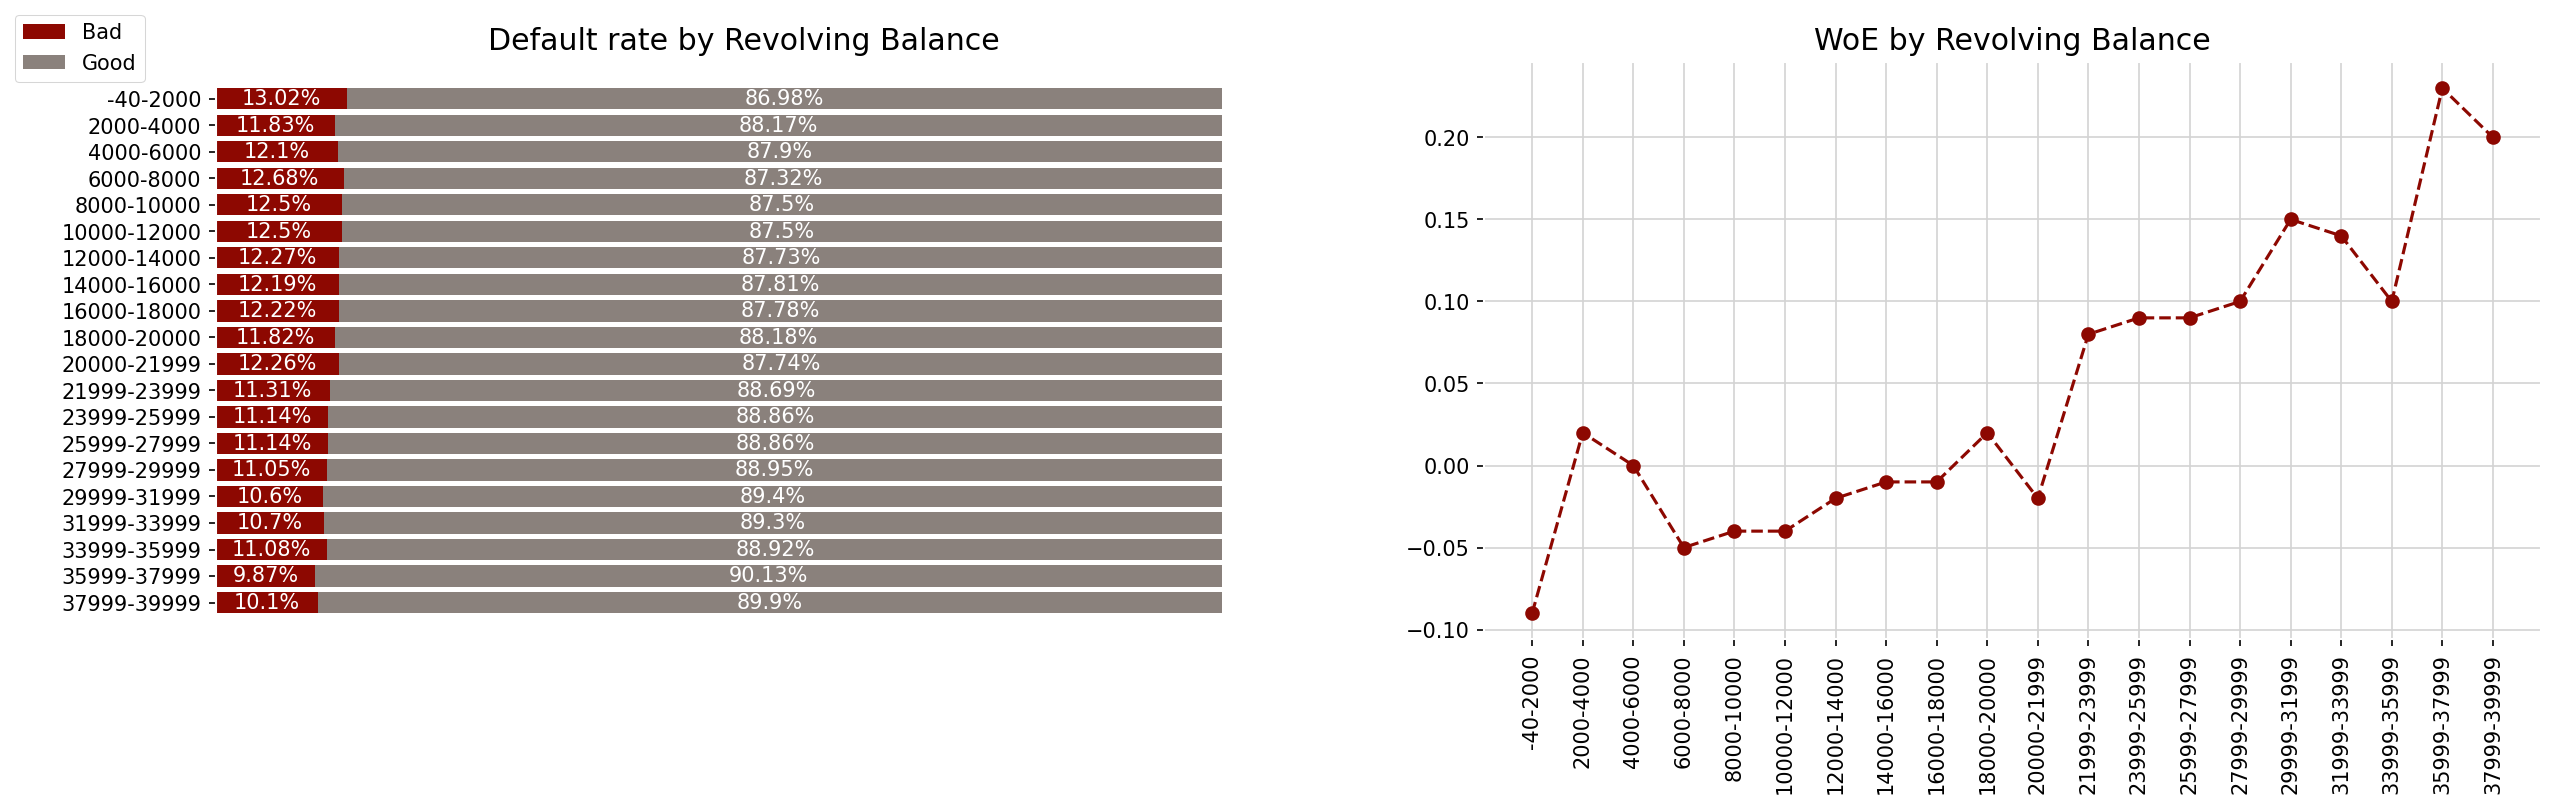

In [155]:
plot_woe_bad_rate_by_variable(revol_bal_df, 'Revolving Balance', rotation=90)

In [157]:
tot_cur_bal_lower_400 = train.loc[train['tot_cur_bal'] < 400_000]
tot_cur_bal_df = default_analysis(pd.cut(tot_cur_bal_lower_400['tot_cur_bal'], 20), 'tot_cur_bal', tot_cur_bal_lower_400, continuous=True, not_ordered=False)
#tot_cur_bal_df

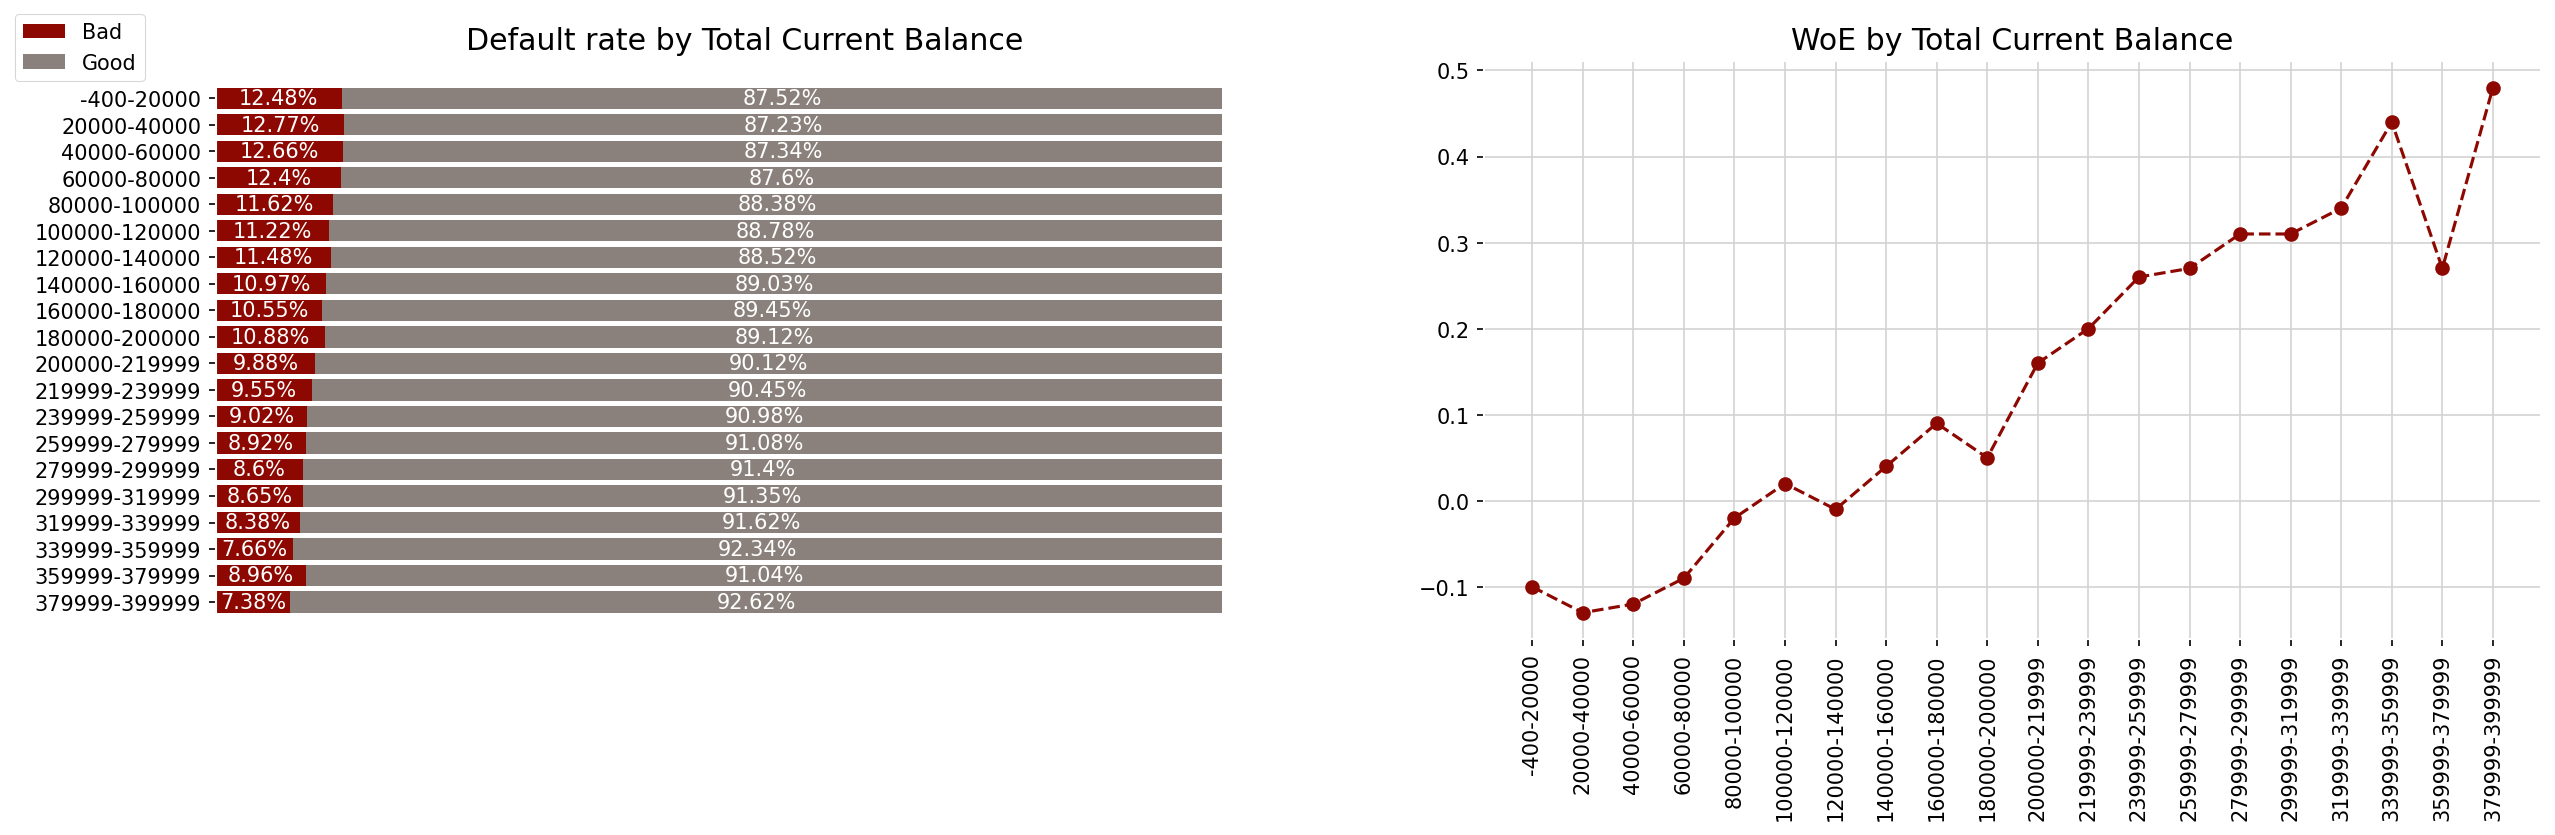

In [159]:
plot_woe_bad_rate_by_variable(tot_cur_bal_df, 'Total Current Balance', rotation=90)

In [161]:
mths_since_last_delinq_less_75 = train.loc[train['mths_since_last_delinq'] < 75]
mths_since_last_delinq_df = default_analysis(pd.cut(mths_since_last_delinq_less_75['mths_since_last_delinq'], 20), 'mths_since_last_delinq', mths_since_last_delinq_less_75, continuous=True, not_ordered=False)
mths_since_last_delinq_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
mths_since_last_delinq_cat                                                                                                                      
0-4                           4984                3.13         85.15        14.85    4244.0    740.0          3.02         3.89  5.74 -0.25  0.0
4-7                          10491                6.58         87.68        12.32    9198.0   1293.0          6.55         6.80  7.11 -0.04  0.0
7-11                         12838                8.05         88.08        11.92   11308.0   1530.0          8.05         8.04  7.39   0.0  0.0
11-15                         9741                6.11         87.88        12.12    8560.0   1181.0          6.10         6.21  7.25 -0.02  0.0
15-18                        12514                7.85         88.16        11.84   11032.0   1482.0          7.86         7.79  7.44  0.01  0.0
18-22                        11052                6.93         88.17        11.83    9744.0   1308.0          6.94         6.87  7.45  0.01  0.0
22-26                         7774                4.88         88.55        11.45    6884.0    890.0          4.90         4.68  7.73  0.05  0.0
26-30                        10479                6.57         88.35        11.65    9258.0   1221.0          6.59         6.42  7.58  0.03  0.0
30-33                         9860                6.18         88.80        11.20    8756.0   1104.0          6.24         5.80  7.93  0.07  0.0
33-37                         9486                5.95         88.92        11.08    8435.0   1051.0          6.01         5.52  8.03  0.08  0.0
37-41                         7047                4.42         87.81        12.19    6188.0    859.0          4.41         4.51   7.2 -0.02  0.0
41-44                         9009                5.65         88.26        11.74    7951.0   1058.0          5.66         5.56  7.52  0.02  0.0
44-48                         8670                5.44         88.44        11.56    7668.0   1002.0          5.46         5.27  7.65  0.04  0.0
48-52                         4840                3.04         87.50        12.50    4235.0    605.0          3.02         3.18   7.0 -0.05  0.0
52-56                         5894                3.70         87.82        12.18    5176.0    718.0          3.69         3.77  7.21 -0.02  0.0
56-59                         5590                3.51         88.44        11.56    4944.0    646.0          3.52         3.40  7.65  0.04  0.0
59-63                         3996                2.51         88.16        11.84    3523.0    473.0          2.51         2.49  7.45  0.01  0.0
63-67                         5146                3.23         87.74        12.26    4515.0    631.0          3.22         3.32  7.16 -0.03  0.0
67-70                         5099                3.20         87.76        12.24    4475.0    624.0          3.19         3.28  7.17 -0.03  0.0
70-74                         4943                3.10         87.64        12.36    4332.0    611.0          3.08         3.21  7.09 -0.04  0.0
total                       159453              100.00         88.07        11.93  140426.0  19027.0        100.00       100.00     -     -  0.0

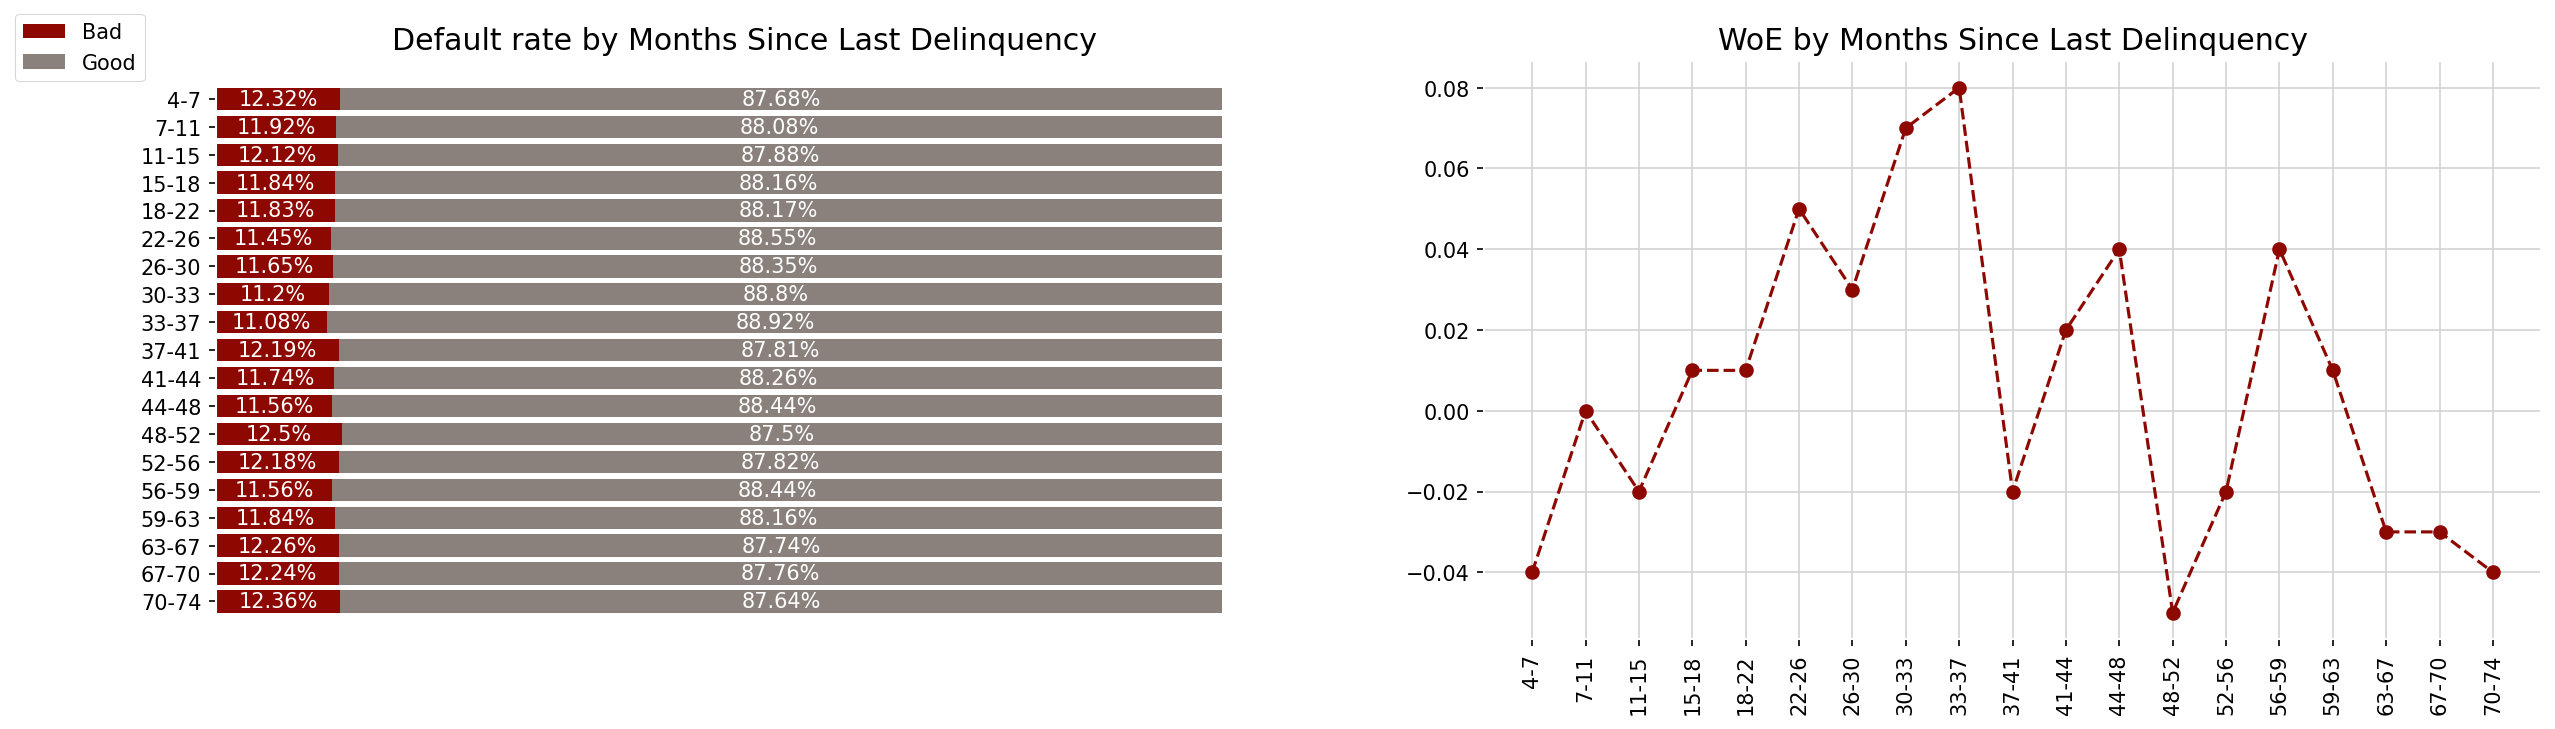

In [163]:
plot_woe_bad_rate_by_variable(mths_since_last_delinq_df.iloc[1:, :], 'Months Since Last Delinquency', rotation=90)

In [165]:
delinq_2yrs_df = default_analysis(train['delinq_2yrs'], 'delinq_2yrs', train, continuous=False, not_ordered=False)
delinq_2yrs_df.head(10)

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)    g/b   woe   iv
delinq_2yrs_cat                                                                                                                       
0                308999               82.84         88.02        11.98  271982.0  37017.0         82.85        82.80   7.35   0.0  0.0
1                 43638               11.70         88.16        11.84   38472.0   5166.0         11.72        11.56   7.45  0.01  0.0
2                 12457                3.34         87.72        12.28   10927.0   1530.0          3.33         3.42   7.14 -0.03  0.0
3                  4246                1.14         87.28        12.72    3706.0    540.0          1.13         1.21   6.86 -0.07  0.0
4                  1723                0.46         87.81        12.19    1513.0    210.0          0.46         0.47    7.2 -0.02  0.0
5                   897                0.24         87.85        12.15     788.0    109.0          0.24         0.24   7.23 -0.02  0.0
6                   460                0.12         88.26        11.74     406.0     54.0          0.12         0.12   7.52  0.02  0.0
7                   243                0.07         86.83        13.17     211.0     32.0          0.06         0.07   6.59 -0.11  0.0
8                   131                0.04         88.55        11.45     116.0     15.0          0.04         0.03   7.73  0.05  0.0
9                    68                0.02         91.18         8.82      62.0      6.0          0.02         0.01  10.33  0.34  0.0

In [167]:
acc_now_delinq_df = default_analysis(train['acc_now_delinq'], 'acc_now_delinq', train, continuous=False, not_ordered=False)
acc_now_delinq_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)    g/b   woe   iv
acc_now_delinq_cat                                                                                                                       
0                   371819               99.68         88.02        11.98  327257.0  44562.0         99.68        99.68   7.34  -0.0  0.0
1                     1118                0.30         87.92        12.08     983.0    135.0          0.30         0.30   7.28 -0.01  0.0
2                       55                0.01         92.73         7.27      51.0      4.0          0.02         0.01  12.75  0.55  0.0
3                        7                0.00         71.43        28.57       5.0      2.0          0.00         0.00    2.5 -1.08  0.0
4                        3                0.00        100.00         0.00       3.0      0.0          0.00         0.00    inf   inf  inf
5                        2                0.00         50.00        50.00       1.0      1.0          0.00         0.00    1.0 -1.99  0.0
total               373004              100.00         88.02        11.98  328300.0  44704.0        100.00       100.00      -     -  inf

In [169]:
inq_last_6mths_df = default_analysis(train['inq_last_6mths'], 'inq_last_6mths', train, continuous=False, not_ordered=False)
inq_last_6mths_df.head(10)

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe    iv
inq_last_6mths_cat                                                                                                                       
0                   186636               50.04         89.89        10.11  167762.0  18874.0         51.10        42.22  8.89  0.19  0.02
1                   104578               28.04         87.37        12.63   91368.0  13210.0         27.83        29.55  6.92 -0.06  0.00
2                    49098               13.16         85.52        14.48   41987.0   7111.0         12.79        15.91   5.9 -0.22  0.01
3                    22257                5.97         83.57        16.43   18600.0   3657.0          5.67         8.18  5.09 -0.37  0.01
4                     6398                1.72         84.39        15.61    5399.0    999.0          1.64         2.23   5.4 -0.31  0.00
5                     2468                0.66         82.09        17.91    2026.0    442.0          0.62         0.99  4.58 -0.47  0.00
6                     1107                0.30         77.60        22.40     859.0    248.0          0.26         0.55  3.46 -0.75  0.00
7                      195                0.05         65.13        34.87     127.0     68.0          0.04         0.15  1.87 -1.37  0.00
8                      122                0.03         62.30        37.70      76.0     46.0          0.02         0.10  1.65 -1.49  0.00
9                       50                0.01         64.00        36.00      32.0     18.0          0.01         0.04  1.78 -1.42  0.00

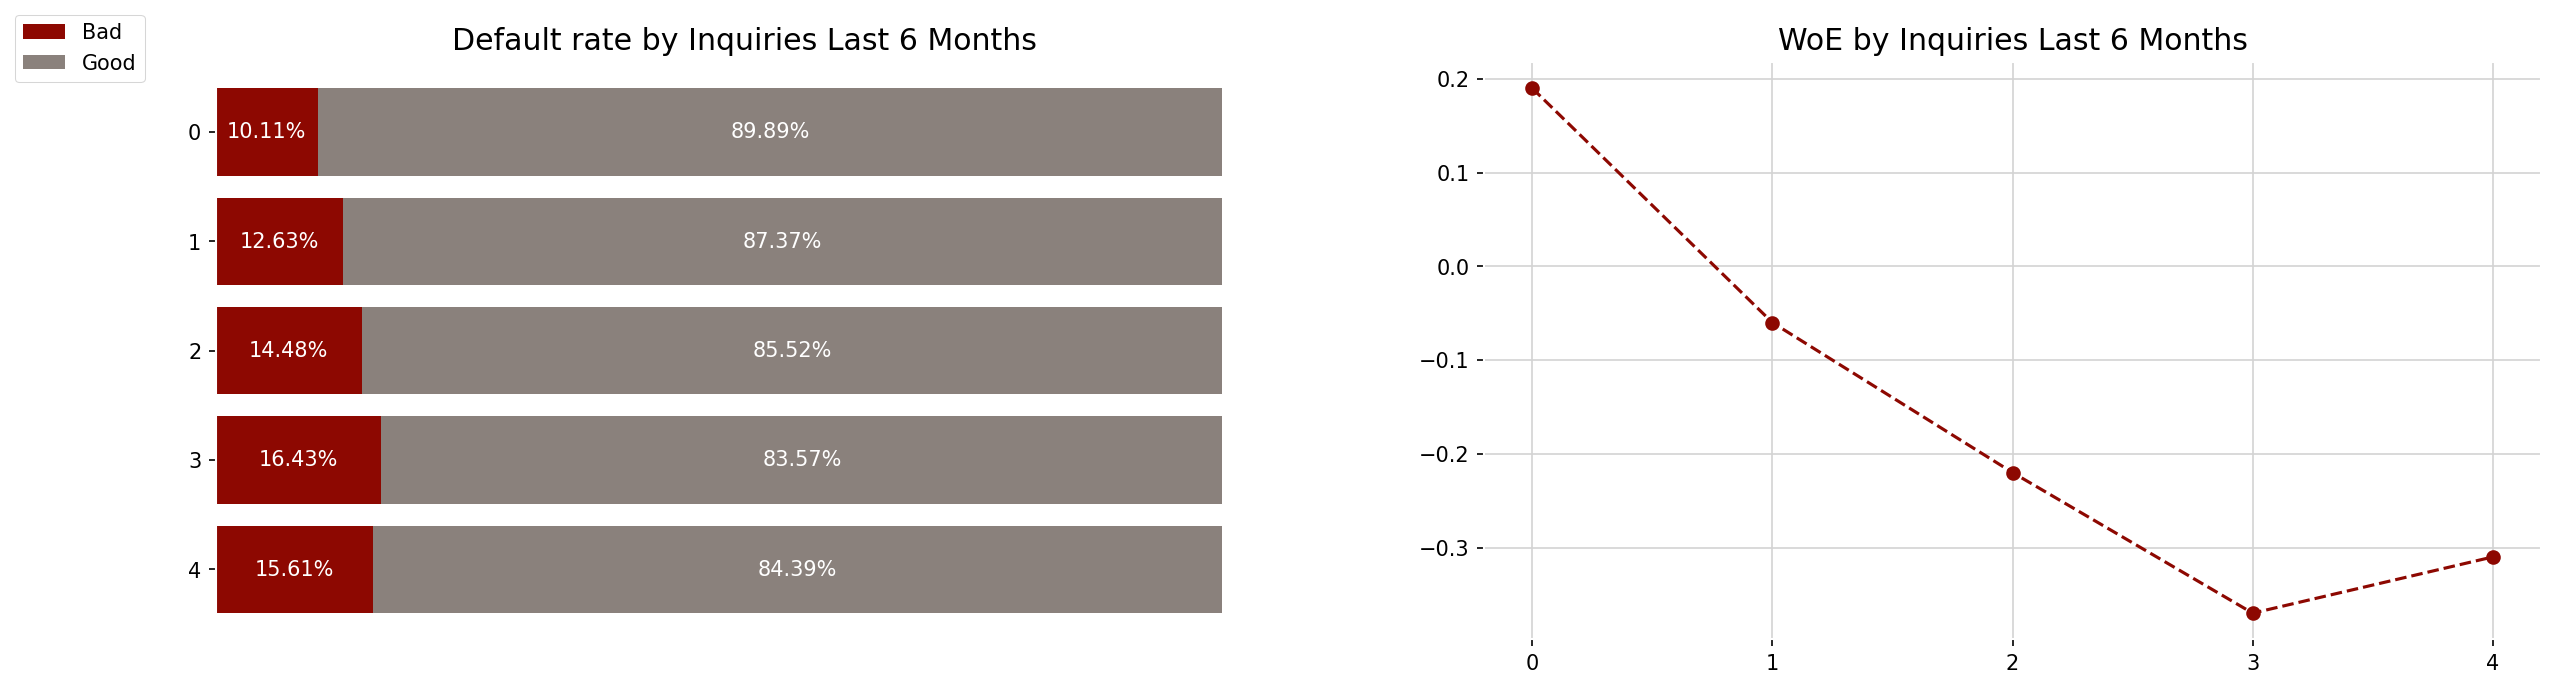

In [171]:
plot_woe_bad_rate_by_variable(inq_last_6mths_df.iloc[:6, :], 'Inquiries Last 6 Months')

In [173]:
pub_rec_df = default_analysis(train['pub_rec'], 'pub_rec', train, continuous=False, not_ordered=False)
#pub_rec_df

In [175]:
open_acc_less_31 = train.loc[train['open_acc'] < 31]
open_acc_df = default_analysis(pd.cut(open_acc_less_31['open_acc'], 10), 'open_acc', open_acc_less_31, continuous=True, not_ordered=False)
open_acc_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
open_acc_cat                                                                                                                      
0-3             6311                1.70         84.99        15.01    5364.0    947.0          1.64         2.13  5.66 -0.26  0.0
3-6            53018               14.26         88.13        11.87   46726.0   6292.0         14.28        14.12  7.43  0.01  0.0
6-9           100814               27.11         88.04        11.96   88755.0  12059.0         27.12        27.06  7.36   0.0  0.0
9-12           93772               25.22         87.84        12.16   82369.0  11403.0         25.17        25.59  7.22 -0.02  0.0
12-15          59204               15.92         88.21        11.79   52224.0   6980.0         15.96        15.66  7.48  0.02  0.0
15-18          31933                8.59         88.28        11.72   28192.0   3741.0          8.61         8.39  7.54  0.03  0.0
18-21          15512                4.17         88.26        11.74   13691.0   1821.0          4.18         4.09  7.52  0.02  0.0
21-24           7149                1.92         88.59        11.41    6333.0    816.0          1.93         1.83  7.76  0.06  0.0
24-27           2952                0.79         87.47        12.53    2582.0    370.0          0.79         0.83  6.98 -0.05  0.0
27-30           1209                0.33         88.83        11.17    1074.0    135.0          0.33         0.30  7.96  0.08  0.0
total         371874              100.00         88.02        11.98  327310.0  44564.0        100.00       100.00     -     -  0.0

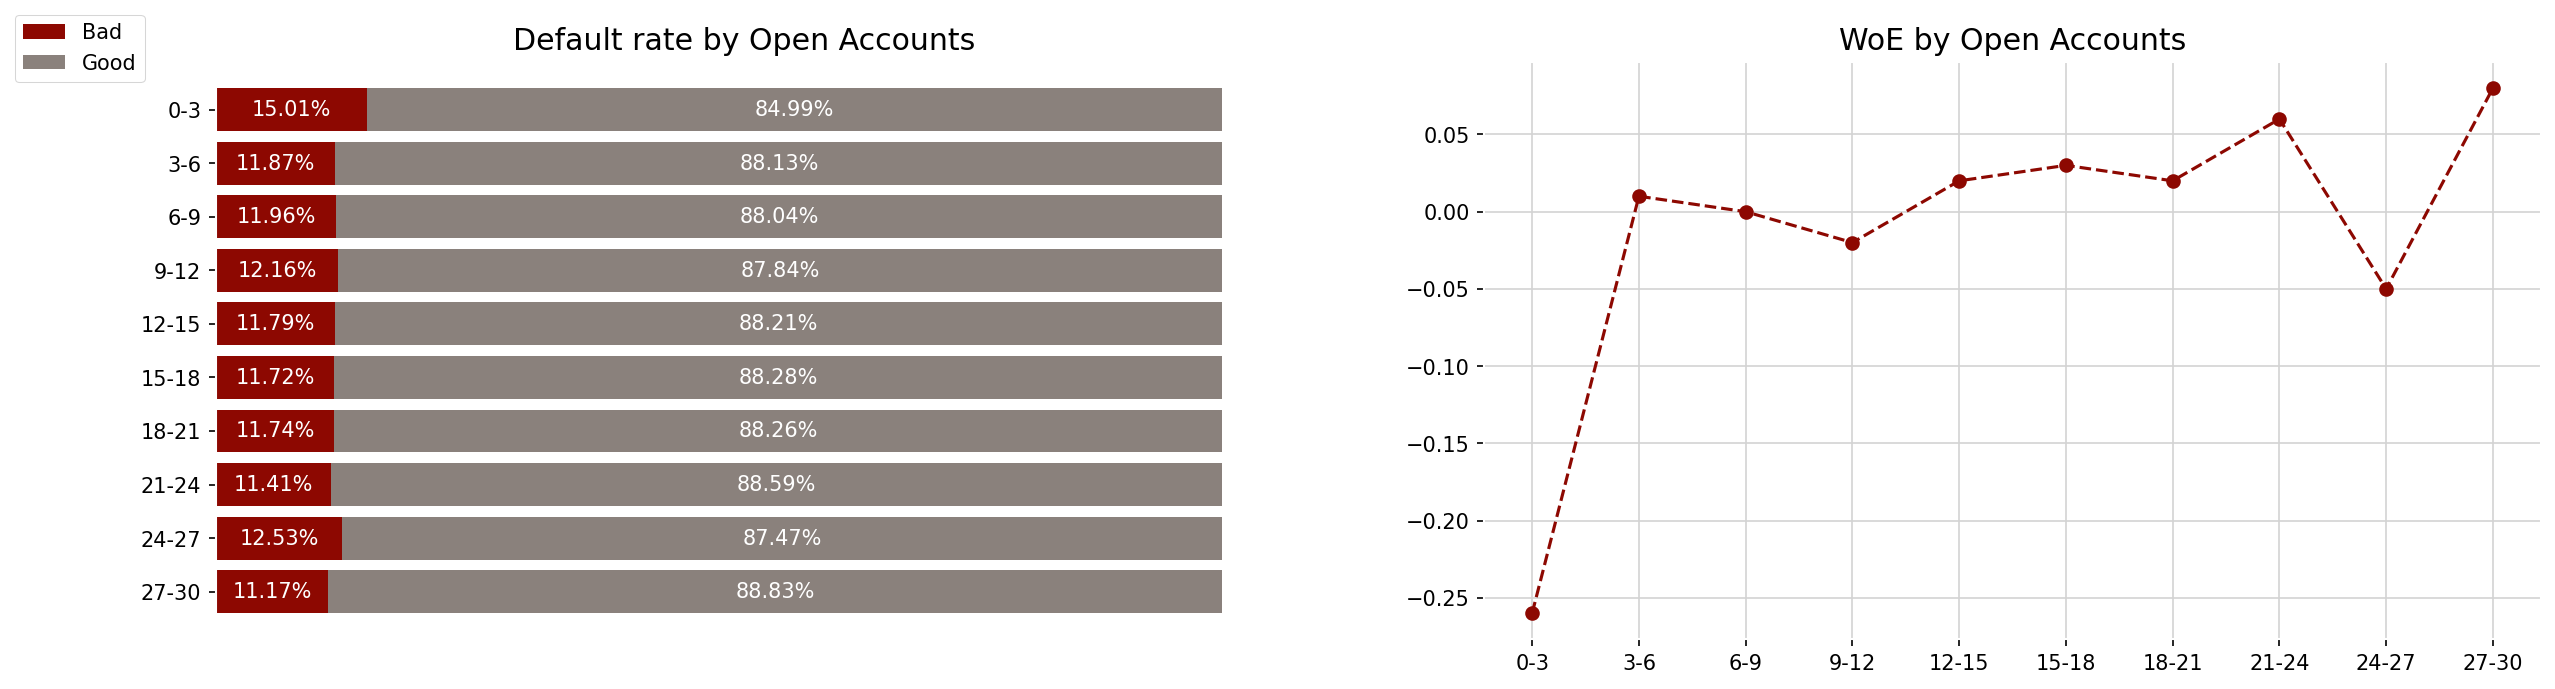

In [177]:
plot_woe_bad_rate_by_variable(open_acc_df, 'Open Accounts')

In [179]:
total_acc_less_49 = train.loc[train['total_acc'] < 49]
total_acc_df = default_analysis(pd.cut(total_acc_less_49['total_acc'], 20), 'total_acc', total_acc_less_49, continuous=True, not_ordered=False)
total_acc_df

n_obs  obs_proportion (%)  good_row (%)  bad_row (%)    n_good    n_bad  good_col (%)  bad_col (%)   g/b   woe   iv
total_acc_cat                                                                                                                      
1-3               553                0.15         79.75        20.25     441.0    112.0          0.14         0.26  3.94 -0.62  0.0
3-6              3150                0.88         84.29        15.71    2655.0    495.0          0.84         1.15  5.36 -0.31  0.0
6-8             12044                3.35         85.80        14.20   10334.0   1710.0          3.27         3.96  6.04 -0.19  0.0
8-10            13756                3.83         86.52        13.48   11902.0   1854.0          3.77         4.29  6.42 -0.13  0.0
10-13           18025                5.02         86.92        13.08   15667.0   2358.0          4.96         5.46  6.64  -0.1  0.0
13-15           34102                9.50         87.13        12.87   29714.0   4388.0          9.40        10.16  6.77 -0.08  0.0
15-17           25933                7.22         87.49        12.51   22688.0   3245.0          7.18         7.51  6.99 -0.04  0.0
17-20           26826                7.47         87.83        12.17   23560.0   3266.0          7.46         7.56  7.21 -0.01  0.0
20-22           41521               11.56         88.07        11.93   36566.0   4955.0         11.57        11.47  7.38  0.01  0.0
22-24           26666                7.42         88.05        11.95   23480.0   3186.0          7.43         7.37  7.37  0.01  0.0
24-27           24817                6.91         88.59        11.41   21985.0   2832.0          6.96         6.55  7.76  0.06  0.0
27-29           33049                9.20         88.66        11.34   29302.0   3747.0          9.27         8.67  7.82  0.07  0.0
29-32           19149                5.33         88.62        11.38   16969.0   2180.0          5.37         5.05  7.78  0.06  0.0
32-34           16634                4.63         88.61        11.39   14740.0   1894.0          4.67         4.38  7.78  0.06  0.0
34-36           20380                5.67         88.86        11.14   18110.0   2270.0          5.73         5.25  7.98  0.09  0.0
36-39           10802                3.01         89.47        10.53    9665.0   1137.0          3.06         2.63   8.5  0.15  0.0
39-41            9135                2.54         88.92        11.08    8123.0   1012.0          2.57         2.34  8.03  0.09  0.0
41-43           10827                3.01         88.73        11.27    9607.0   1220.0          3.04         2.82  7.87  0.07  0.0
43-46            5521                1.54         88.79        11.21    4902.0    619.0          1.55         1.43  7.92  0.08  0.0
46-48            6265                1.74         88.44        11.56    5541.0    724.0          1.75         1.68  7.65  0.05  0.0
total          359155              100.00         87.97        12.03  315951.0  43204.0        100.00       100.00     -     -  0.0

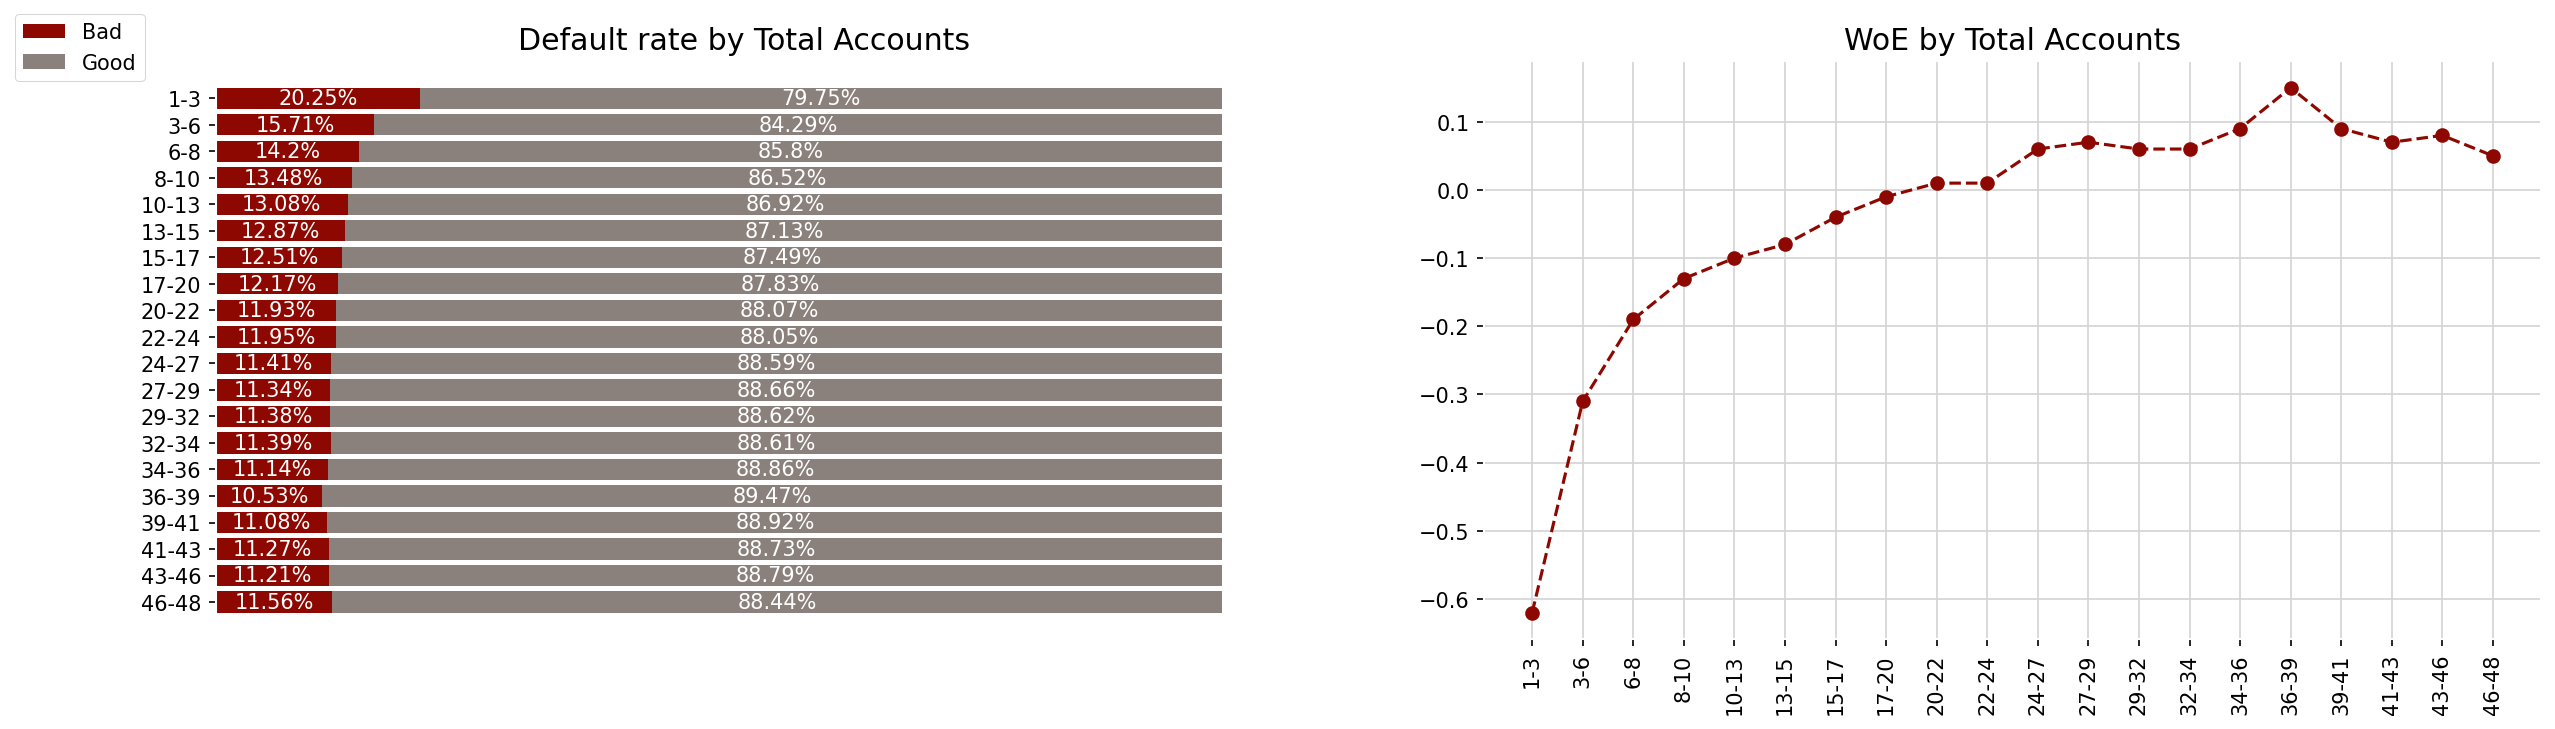

In [181]:
plot_woe_bad_rate_by_variable(total_acc_df, 'Total Accounts', rotation=90)